In [1]:
import pandas as pd
df = pd.read_excel('DatabankWide.xlsx')

In [2]:
sea_countries = ['Philippines', 'Thailand', 'Singapore', 'Cambodia', 'Vietnam', 'Indonesia', 'Malaysia']
# Filter DataFrame to include only these countries
sea_df = df[df['Country name'].isin(sea_countries)]

In [3]:
print("Missing values in the dataset:")
print(sea_df.isnull().sum())

# Drop any unnecessary columns if present
# Keep only numeric columns and 'Country Name'
numeric_cols = sea_df.select_dtypes(include=['float64', 'int64']).columns
selected_cols = ['Country name'] + list(numeric_cols)
sea_df_clean = sea_df[selected_cols]

# Reset the index for clean presentation
sea_df_clean = sea_df_clean.reset_index(drop=True)

# Display the first few rows of our cleaned dataset
print("\nFirst few rows of cleaned dataset:")
print(sea_df_clean.head())

# Get basic statistics of the numeric columns
print("\nBasic statistics of the dataset:")
print(sea_df_clean.describe())

Missing values in the dataset:
Country name                                                                                   0
Country code                                                                                   0
Year                                                                                           0
Adult populaiton                                                                               0
Region                                                                                         0
                                                                                              ..
Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)    21
Used a mobile phone or the internet to access an account, rural (% age 15+)                   28
Used a mobile phone or the internet to access an account, urban (% age 15+)                   28
Used a mobile phone or the internet to access an account, out of labor force (% age 15+)      21

In [5]:
mobile_banking_cols = [
    'Country name', 
    'Year', 
    'Adult populaiton',
    'Account (% age 15+)',
    'Financial institution account (% age 15+)',
    'Mobile money account (% age 15+)',
    'Used a mobile phone or the internet to access an account (% age 15+)',
    'Used a mobile phone or the internet to access an account, young (% ages 15-24)',
    'Used a mobile phone or the internet to access an account, older (% age 25+)',
    'Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)',
    'Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)',
    'Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)',
    'Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)',
    'Used a mobile phone or the internet to access an account, rural (% age 15+)',
    'Used a mobile phone or the internet to access an account, urban (% age 15+)',
    'Used a mobile phone or the internet to access an account, out of labor force (% age 15+)',
    'Used a mobile phone or the internet to access an account, in labor force (% age 15+)',
    'Used a mobile phone or the internet to check account balance (% age 15+)'
]

# Create focused dataset
mobile_banking_df = sea_df_clean[mobile_banking_cols]

In [6]:
# Read the mobile data cost CSV
data_cost_df = pd.read_csv('Cost of 1GB of Data.csv')

# Merge with our existing dataset
mobile_banking_df = mobile_banking_df.merge(
    data_cost_df, 
    left_on='Country name', 
    right_on='Country',
    how='left'
)

# Display the merged dataset to verify
print("Dataset with added mobile data costs:")
print(mobile_banking_df.head())

Dataset with added mobile data costs:
  Country name  Year  Adult populaiton  Account (% age 15+)  \
0     Cambodia  2011         9542433.0             0.036597   
1     Cambodia  2014        10201258.0             0.221653   
2     Cambodia  2017        10817360.0             0.216718   
3     Cambodia  2021        11548637.0             0.333950   
4    Indonesia  2011       172118016.0             0.195820   

   Financial institution account (% age 15+)  \
0                                   0.036597   
1                                   0.125565   
2                                   0.178022   
3                                   0.325966   
4                                   0.195820   

   Mobile money account (% age 15+)  \
0                               NaN   
1                          0.132946   
2                          0.056595   
3                          0.065982   
4                               NaN   

   Used a mobile phone or the internet to access an account

In [7]:
# Drop index and Rank columns
mobile_banking_df = mobile_banking_df.drop(['index', 'Rank'], axis=1)

# Also drop the redundant 'Country' column since we already have 'Country name'
mobile_banking_df = mobile_banking_df.drop('Country', axis=1)

print("Dataset with cleaned columns:")
print(mobile_banking_df.head())

Dataset with cleaned columns:
  Country name  Year  Adult populaiton  Account (% age 15+)  \
0     Cambodia  2011         9542433.0             0.036597   
1     Cambodia  2014        10201258.0             0.221653   
2     Cambodia  2017        10817360.0             0.216718   
3     Cambodia  2021        11548637.0             0.333950   
4    Indonesia  2011       172118016.0             0.195820   

   Financial institution account (% age 15+)  \
0                                   0.036597   
1                                   0.125565   
2                                   0.178022   
3                                   0.325966   
4                                   0.195820   

   Mobile money account (% age 15+)  \
0                               NaN   
1                          0.132946   
2                          0.056595   
3                          0.065982   
4                               NaN   

   Used a mobile phone or the internet to access an account (% age 

In [8]:
mobile_banking_absolute = mobile_banking_df.copy()

# Get all columns that contain '%' in their name, excluding the data cost column
percentage_columns = [col for col in mobile_banking_df.columns if '%' in col]

# Convert percentages to absolute numbers
for col in percentage_columns:
    mobile_banking_absolute[col] = mobile_banking_absolute[col] * mobile_banking_absolute['Adult populaiton']

print("Dataset with absolute population numbers and original data cost:")
print(mobile_banking_absolute.head())

Dataset with absolute population numbers and original data cost:
  Country name  Year  Adult populaiton  Account (% age 15+)  \
0     Cambodia  2011         9542433.0         3.492255e+05   
1     Cambodia  2014        10201258.0         2.261136e+06   
2     Cambodia  2017        10817360.0         2.344315e+06   
3     Cambodia  2021        11548637.0         3.856666e+06   
4    Indonesia  2011       172118016.0         3.370414e+07   

   Financial institution account (% age 15+)  \
0                               3.492255e+05   
1                               1.280920e+06   
2                               1.925725e+06   
3                               3.764467e+06   
4                               3.370414e+07   

   Mobile money account (% age 15+)  \
0                               NaN   
1                      1.356212e+06   
2                      6.122094e+05   
3                      7.620060e+05   
4                               NaN   

   Used a mobile phone or the in

In [9]:
# NaN values we have in each column
print("Number of NaN values per column:")
print(mobile_banking_absolute.isnull().sum())

# Fill NaN values with 0 since missing values likely indicate no adoption/usage in that year
mobile_banking_clean = mobile_banking_absolute.fillna(0)

# Verify our cleaning worked
print("\nRemaining NaN values after cleaning:")
print(mobile_banking_clean.isnull().sum())

# Display first few rows of clean dataset
print("\nCleaned dataset preview:")
print(mobile_banking_clean.head())

Number of NaN values per column:
Country name                                                                                           0
Year                                                                                                   0
Adult populaiton                                                                                       0
Account (% age 15+)                                                                                    0
Financial institution account (% age 15+)                                                              0
Mobile money account (% age 15+)                                                                       7
Used a mobile phone or the internet to access an account (% age 15+)                                  21
Used a mobile phone or the internet to access an account, young (% ages 15-24)                        21
Used a mobile phone or the internet to access an account, older (% age 25+)                           21
Used a mobile phone or

In [10]:
# Set Country name and Year as index
mobile_banking_clean = mobile_banking_clean.set_index(['Country name', 'Year'])

# Sort the index
mobile_banking_clean = mobile_banking_clean.sort_index()

print("Cleaned dataset with Country and Year index:")
print(mobile_banking_clean.head())

Cleaned dataset with Country and Year index:
                   Adult populaiton  Account (% age 15+)  \
Country name Year                                          
Cambodia     2011         9542433.0         3.492255e+05   
             2014        10201258.0         2.261136e+06   
             2017        10817360.0         2.344315e+06   
             2021        11548637.0         3.856666e+06   
Indonesia    2011       172118016.0         3.370414e+07   

                   Financial institution account (% age 15+)  \
Country name Year                                              
Cambodia     2011                               3.492255e+05   
             2014                               1.280920e+06   
             2017                               1.925725e+06   
             2021                               3.764467e+06   
Indonesia    2011                               3.370414e+07   

                   Mobile money account (% age 15+)  \
Country name Year             

In [11]:
# Read Instagram users data
instagram_df = pd.read_csv('instagram-users-by-country-2024.csv')

# Display the first few rows to see what we're working with
print("Instagram users data preview:")
print(instagram_df.head())

Instagram users data preview:
         country  InstagramUsers_2024  InstagramUsers_PctFemale_2024  \
0          India          392465000.0                           33.1   
1  United States          172606200.0                           55.4   
2      Indonesia           90183200.0                           54.2   
3       Pakistan           18593301.0                           35.1   
4        Nigeria           12635900.0                           46.5   

   InstagramUsers_PctMale_2024  InstagramUsers2023  
0                         66.9           229600000  
1                         44.6           143400000  
2                         45.8            89150000  
3                         64.9            12950000  
4                         53.5             7100000  


In [12]:
# List of our 7 countries
sea_countries = ['Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand', 'Vietnam']

# Filter Instagram data for just our countries
instagram_sea = instagram_df[instagram_df['country'].isin(sea_countries)]

print("Instagram data for Southeast Asian countries:")
print(instagram_sea)

Instagram data for Southeast Asian countries:
        country  InstagramUsers_2024  InstagramUsers_PctFemale_2024  \
2     Indonesia           90183200.0                           54.2   
11  Philippines           22161100.0                           61.8   
13      Vietnam                  NaN                            NaN   
16     Thailand           19086000.0                           60.6   
23      Myanmar            1418900.0                           55.4   
39     Malaysia           15676300.0                           55.6   
66     Cambodia            1786600.0                           55.1   

    InstagramUsers_PctMale_2024  InstagramUsers2023  
2                          45.8            89150000  
11                         38.2            17550000  
13                          NaN            10350000  
16                         39.4            17350000  
23                         44.6             1400000  
39                         44.4            13900000  
66     

In [13]:
# Fill Vietnam's 2024 data using 2023 value
instagram_sea.loc[instagram_sea['country'] == 'Vietnam', 'InstagramUsers_2024'] = instagram_sea.loc[instagram_sea['country'] == 'Vietnam', 'InstagramUsers2023'].values[0]

# Calculate gender percentages for Vietnam based on regional averages
female_avg = instagram_sea['InstagramUsers_PctFemale_2024'].mean()
male_avg = instagram_sea['InstagramUsers_PctMale_2024'].mean()
instagram_sea.loc[instagram_sea['country'] == 'Vietnam', 'InstagramUsers_PctFemale_2024'] = female_avg
instagram_sea.loc[instagram_sea['country'] == 'Vietnam', 'InstagramUsers_PctMale_2024'] = male_avg

print("Cleaned Instagram data:")
print(instagram_sea)

Cleaned Instagram data:
        country  InstagramUsers_2024  InstagramUsers_PctFemale_2024  \
2     Indonesia           90183200.0                      54.200000   
11  Philippines           22161100.0                      61.800000   
13      Vietnam           10350000.0                      57.116667   
16     Thailand           19086000.0                      60.600000   
23      Myanmar            1418900.0                      55.400000   
39     Malaysia           15676300.0                      55.600000   
66     Cambodia            1786600.0                      55.100000   

    InstagramUsers_PctMale_2024  InstagramUsers2023  
2                     45.800000            89150000  
11                    38.200000            17550000  
13                    42.883333            10350000  
16                    39.400000            17350000  
23                    44.600000             1400000  
39                    44.400000            13900000  
66                    44.9000

In [14]:
# Reset index to remove the numbered indices
instagram_sea = instagram_sea.reset_index(drop=True)

# Set country as index for better readability
instagram_sea = instagram_sea.set_index('country')

print("Instagram data with clean country alignment:")
print(instagram_sea)

# Now let's merge this with our mobile banking dataset
# First reset our mobile banking index to get Country name as a column
mobile_banking_clean = mobile_banking_clean.reset_index()

# Merge the datasets
merged_df = mobile_banking_clean.merge(
    instagram_sea,
    left_on='Country name',
    right_index=True,
    how='left'
)

# Set back the index to Country name and Year
merged_df = merged_df.set_index(['Country name', 'Year'])

print("\nMerged dataset preview:")
print(merged_df.head())

Instagram data with clean country alignment:
             InstagramUsers_2024  InstagramUsers_PctFemale_2024  \
country                                                           
Indonesia             90183200.0                      54.200000   
Philippines           22161100.0                      61.800000   
Vietnam               10350000.0                      57.116667   
Thailand              19086000.0                      60.600000   
Myanmar                1418900.0                      55.400000   
Malaysia              15676300.0                      55.600000   
Cambodia               1786600.0                      55.100000   

             InstagramUsers_PctMale_2024  InstagramUsers2023  
country                                                       
Indonesia                      45.800000            89150000  
Philippines                    38.200000            17550000  
Vietnam                        42.883333            10350000  
Thailand                       39.40

In [15]:
# Convert percentages to actual numbers
merged_df['InstagramUsers_Female_2024'] = (merged_df['InstagramUsers_2024'] * merged_df['InstagramUsers_PctFemale_2024'] / 100).round(0)
merged_df['InstagramUsers_Male_2024'] = (merged_df['InstagramUsers_2024'] * merged_df['InstagramUsers_PctMale_2024'] / 100).round(0)

# Drop the percentage columns
merged_df = merged_df.drop(['InstagramUsers_PctFemale_2024', 'InstagramUsers_PctMale_2024'], axis=1)

print("Dataset with Instagram users by gender in absolute numbers:")
print(merged_df.head())

Dataset with Instagram users by gender in absolute numbers:
                   Adult populaiton  Account (% age 15+)  \
Country name Year                                          
Cambodia     2011         9542433.0         3.492255e+05   
             2014        10201258.0         2.261136e+06   
             2017        10817360.0         2.344315e+06   
             2021        11548637.0         3.856666e+06   
Indonesia    2011       172118016.0         3.370414e+07   

                   Financial institution account (% age 15+)  \
Country name Year                                              
Cambodia     2011                               3.492255e+05   
             2014                               1.280920e+06   
             2017                               1.925725e+06   
             2021                               3.764467e+06   
Indonesia    2011                               3.370414e+07   

                   Mobile money account (% age 15+)  \
Country name Ye

In [17]:
# Set Country name and Year as index
mobile_banking_clean = mobile_banking_df.set_index(['Country name', 'Year'])

print("Mobile banking dataset restored:")
print(mobile_banking_clean.head())

Mobile banking dataset restored:
                   Adult populaiton  Account (% age 15+)  \
Country name Year                                          
Cambodia     2011         9542433.0             0.036597   
             2014        10201258.0             0.221653   
             2017        10817360.0             0.216718   
             2021        11548637.0             0.333950   
Indonesia    2011       172118016.0             0.195820   

                   Financial institution account (% age 15+)  \
Country name Year                                              
Cambodia     2011                                   0.036597   
             2014                                   0.125565   
             2017                                   0.178022   
             2021                                   0.325966   
Indonesia    2011                                   0.195820   

                   Mobile money account (% age 15+)  \
Country name Year                         

In [19]:
# Import numpy
import numpy as np

# Set data cost to NaN for all years except 2021
mobile_banking_clean.loc[mobile_banking_clean.index.get_level_values('Year') != 2021, 'Avg Price of 1GB (USD)'] = np.nan

print("Mobile banking dataset with corrected data costs:")
print(mobile_banking_clean.head())

Mobile banking dataset with corrected data costs:
                   Adult populaiton  Account (% age 15+)  \
Country name Year                                          
Cambodia     2011         9542433.0             0.036597   
             2014        10201258.0             0.221653   
             2017        10817360.0             0.216718   
             2021        11548637.0             0.333950   
Indonesia    2011       172118016.0             0.195820   

                   Financial institution account (% age 15+)  \
Country name Year                                              
Cambodia     2011                                   0.036597   
             2014                                   0.125565   
             2017                                   0.178022   
             2021                                   0.325966   
Indonesia    2011                                   0.195820   

                   Mobile money account (% age 15+)  \
Country name Year        

In [22]:
mobile_banking_clean = mobile_banking_clean.reset_index()
mobile_banking_clean.loc[mobile_banking_clean['Year'] == 2022, 'Year'] = 2021
mobile_banking_clean = mobile_banking_clean.set_index(['Country name', 'Year'])
print("Updated years for each country:")
print(mobile_banking_clean.reset_index().groupby('Country name')['Year'].unique())

Updated years for each country:
Country name
Cambodia       [2011, 2014, 2017, 2021]
Indonesia      [2011, 2014, 2017, 2021]
Malaysia       [2011, 2014, 2017, 2021]
Philippines    [2011, 2014, 2017, 2021]
Singapore      [2011, 2014, 2017, 2021]
Thailand       [2011, 2014, 2017, 2021]
Vietnam        [2011, 2014, 2017, 2021]
Name: Year, dtype: object


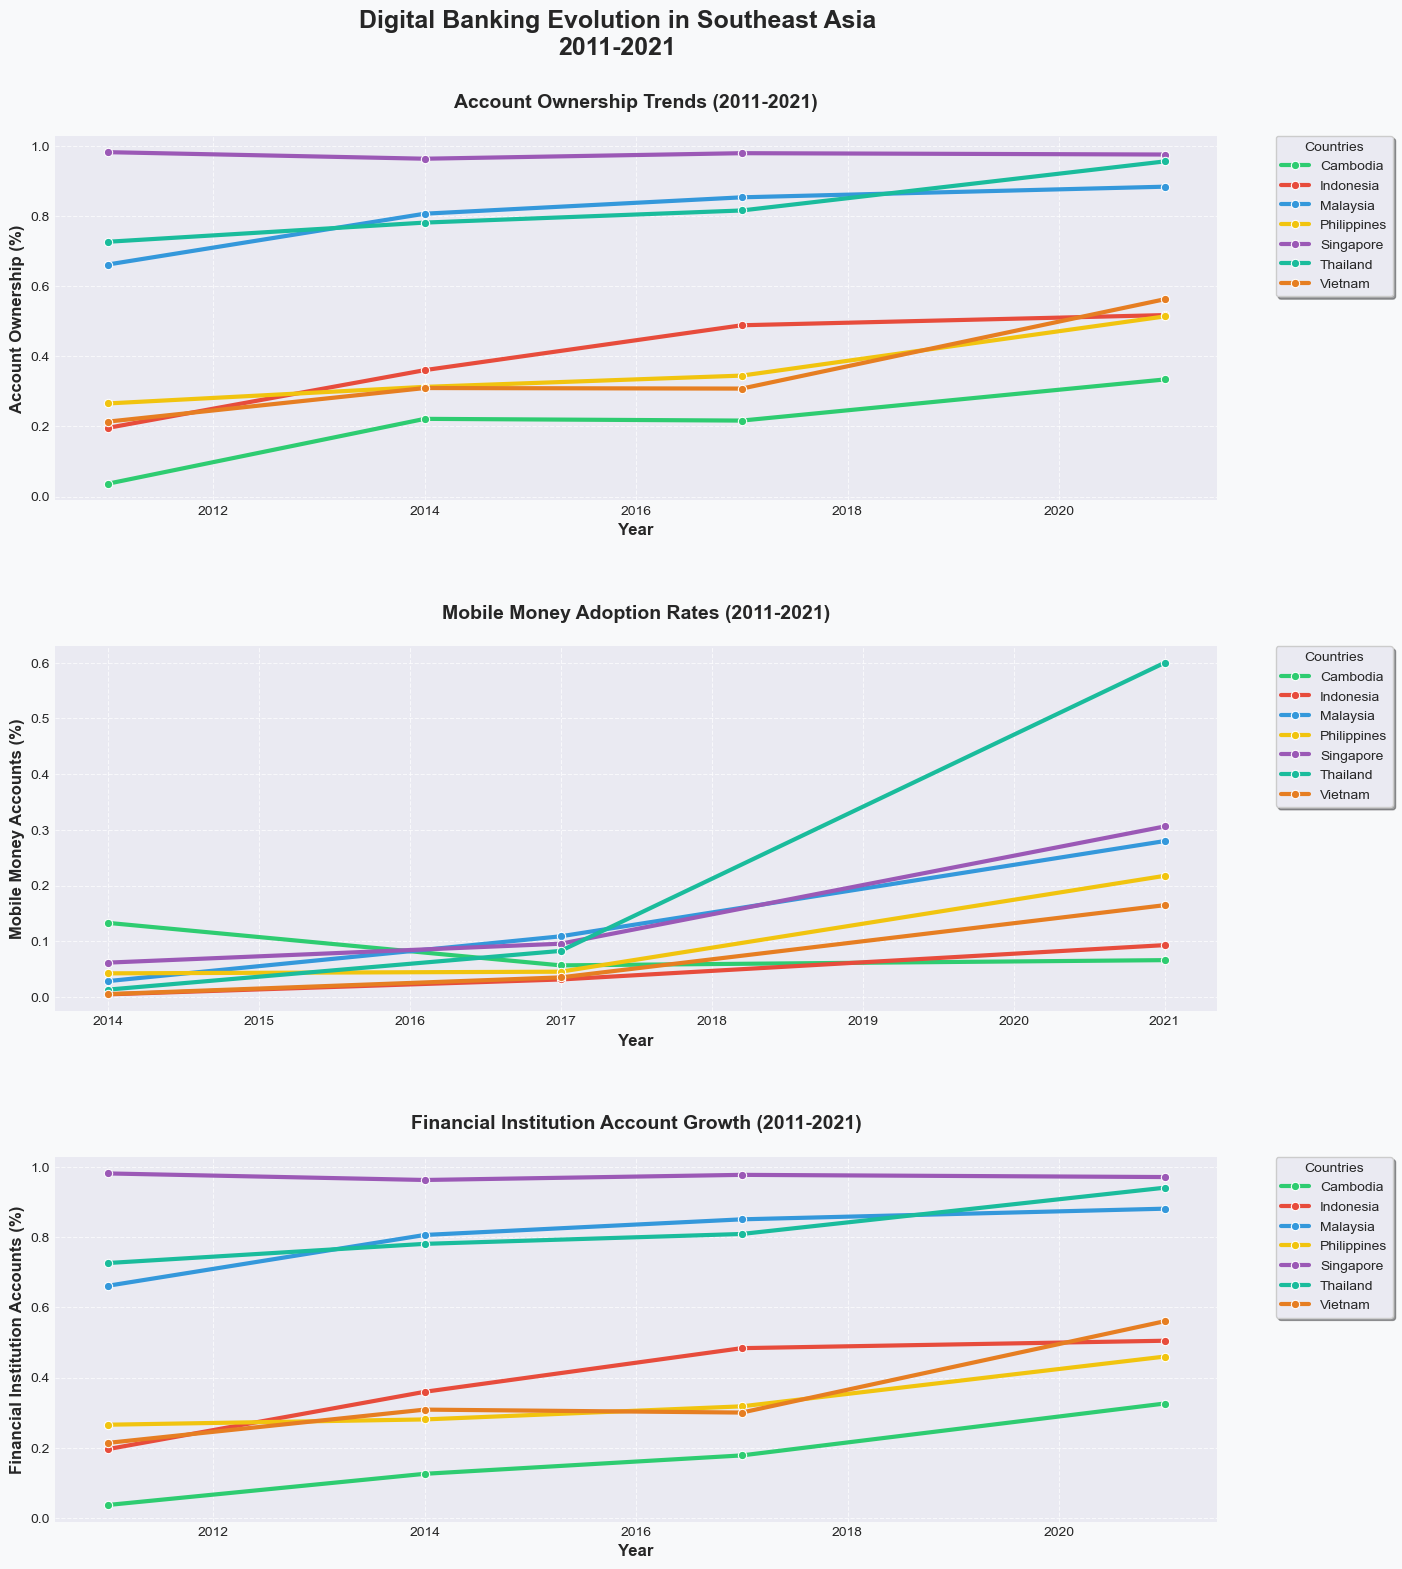

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style parameters
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f1c40f', '#9b59b6', '#1abc9c', '#e67e22']

# Create figure and subplots with enhanced spacing
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))
plt.subplots_adjust(hspace=0.4)

# Enhanced styling function
def style_axis(ax, title, ylabel):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', 
             borderaxespad=0., frameon=True, fancybox=True, shadow=True)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
# Plot 1: Account ownership with enhanced styling
sns.lineplot(data=mobile_banking_clean.reset_index(), 
            x='Year', y='Account (% age 15+)', 
            hue='Country name', palette=colors, 
            linewidth=3, marker='o', ax=ax1)
style_axis(ax1, 'Account Ownership Trends (2011-2021)', 'Account Ownership (%)')

# Plot 2: Mobile money adoption with enhanced styling
sns.lineplot(data=mobile_banking_clean.reset_index(), 
            x='Year', y='Mobile money account (% age 15+)', 
            hue='Country name', palette=colors, 
            linewidth=3, marker='o', ax=ax2)
style_axis(ax2, 'Mobile Money Adoption Rates (2011-2021)', 'Mobile Money Accounts (%)')

# Plot 3: Financial institution accounts with enhanced styling
sns.lineplot(data=mobile_banking_clean.reset_index(), 
            x='Year', y='Financial institution account (% age 15+)', 
            hue='Country name', palette=colors, 
            linewidth=3, marker='o', ax=ax3)
style_axis(ax3, 'Financial Institution Account Growth (2011-2021)', 'Financial Institution Accounts (%)')

# Add main title with enhanced styling
fig.suptitle('Digital Banking Evolution in Southeast Asia\n2011-2021', 
            fontsize=18, fontweight='bold', y=0.95)

# Add subtle background color
fig.patch.set_facecolor('#f8f9fa')
plt.show()

In [24]:
# Create a copy of the dataframe
mobile_banking_numbers = mobile_banking_clean.copy()

# List of columns to convert (excluding the 1GB price column)
columns_to_convert = [col for col in mobile_banking_numbers.columns 
                     if col not in ['Adult populaiton', 'Avg Price of 1GB (USD)']]

# Convert percentages to actual numbers
for col in columns_to_convert:
    mobile_banking_numbers[col] = (mobile_banking_numbers[col] * mobile_banking_numbers['Adult populaiton']).round(0)

print("First few rows of the converted dataset:")
print(mobile_banking_numbers.head())

First few rows of the converted dataset:
                   Adult populaiton  Account (% age 15+)  \
Country name Year                                          
Cambodia     2011         9542433.0             349226.0   
             2014        10201258.0            2261136.0   
             2017        10817360.0            2344315.0   
             2021        11548637.0            3856666.0   
Indonesia    2011       172118016.0           33704135.0   

                   Financial institution account (% age 15+)  \
Country name Year                                              
Cambodia     2011                                   349226.0   
             2014                                  1280920.0   
             2017                                  1925725.0   
             2021                                  3764467.0   
Indonesia    2011                                 33704135.0   

                   Mobile money account (% age 15+)  \
Country name Year                 

In [25]:
# Create a dictionary for column name mapping
new_names = {
    'Account (% age 15+)': 'Total Account Holders',
    'Financial institution account (% age 15+)': 'Financial Institution Account Holders',
    'Mobile money account (% age 15+)': 'Mobile Money Account Users',
    'Used a mobile phone or the internet to access an account (% age 15+)': 'Digital Account Access Users',
    'Used a mobile phone or the internet to access an account, young (% ages 15-24)': 'Young Digital Users (15-24)',
    'Used a mobile phone or the internet to access an account, older (% age 25+)': 'Adult Digital Users (25+)',
    'Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)': 'Digital Users with Primary Education',
    'Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)': 'Digital Users with Secondary Education',
    'Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)': 'Digital Users from Lower Income',
    'Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)': 'Digital Users from Higher Income',
    'Used a mobile phone or the internet to access an account, rural (% age 15+)': 'Rural Digital Users',
    'Used a mobile phone or the internet to access an account, urban (% age 15+)': 'Urban Digital Users',
    'Used a mobile phone or the internet to access an account, out of labor force (% age 15+)': 'Digital Users Outside Labor Force',
    'Used a mobile phone or the internet to access an account, in labor force (% age 15+)': 'Digital Users In Labor Force',
    'Used a mobile phone or the internet to check account balance (% age 15+)': 'Digital Balance Check Users'
}

# Rename the columns
mobile_banking_numbers = mobile_banking_numbers.rename(columns=new_names)

print("Dataset with updated column names:")
print(mobile_banking_numbers.head())

Dataset with updated column names:
                   Adult populaiton  Total Account Holders  \
Country name Year                                            
Cambodia     2011         9542433.0               349226.0   
             2014        10201258.0              2261136.0   
             2017        10817360.0              2344315.0   
             2021        11548637.0              3856666.0   
Indonesia    2011       172118016.0             33704135.0   

                   Financial Institution Account Holders  \
Country name Year                                          
Cambodia     2011                               349226.0   
             2014                              1280920.0   
             2017                              1925725.0   
             2021                              3764467.0   
Indonesia    2011                             33704135.0   

                   Mobile Money Account Users  Digital Account Access Users  \
Country name Year             

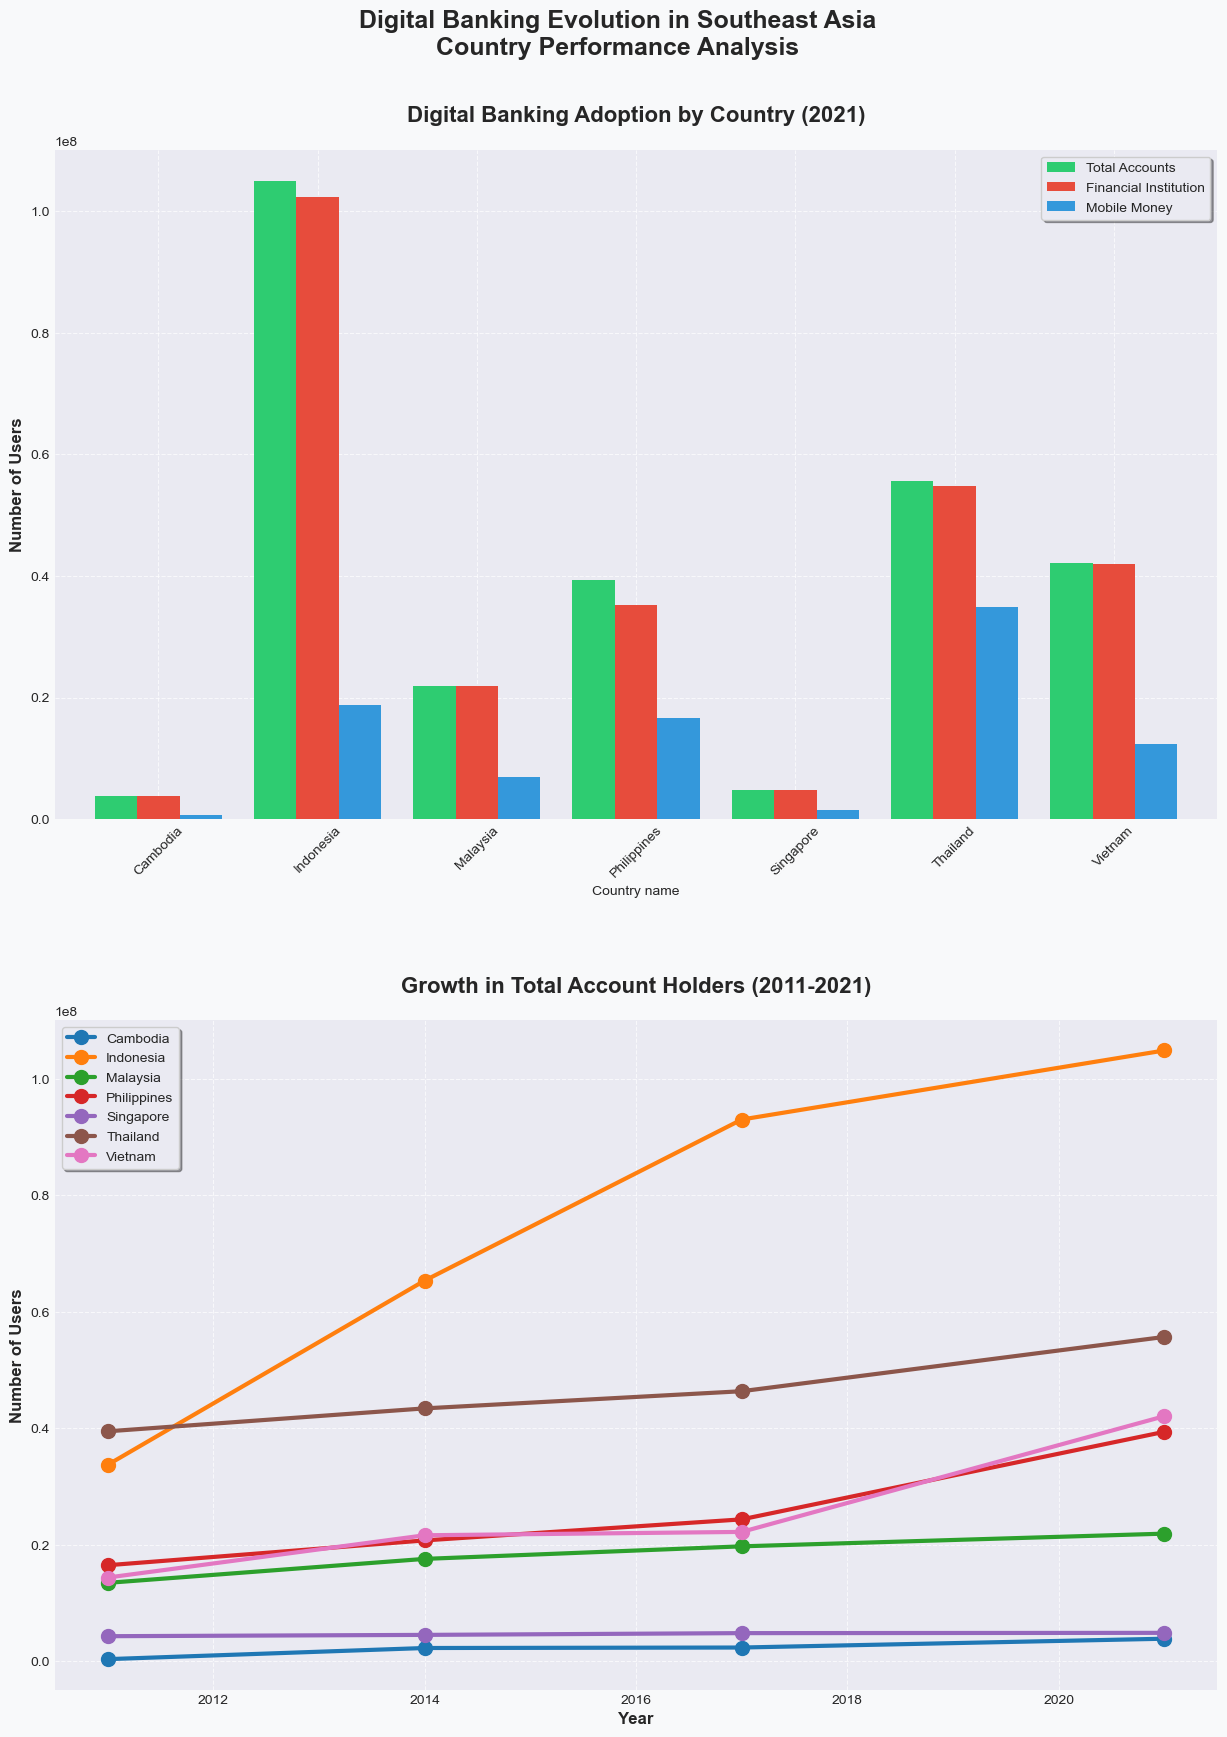

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f1c40f', '#9b59b6', '#1abc9c', '#e67e22']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)

# Plot 1: Country Comparison Bar Plot
data_2021 = mobile_banking_numbers.xs(2021, level='Year')
comparison_data = pd.DataFrame({
    'Total Accounts': data_2021['Total Account Holders'],
    'Financial Institution': data_2021['Financial Institution Account Holders'],
    'Mobile Money': data_2021['Mobile Money Account Users']
})

comparison_data.plot(kind='bar', ax=ax1, color=colors[:3], width=0.8)
ax1.set_title('Digital Banking Adoption by Country (2021)', pad=20, fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Users', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Year-over-Year Growth
years = [2011, 2014, 2017, 2021]
for country in mobile_banking_numbers.index.get_level_values('Country name').unique():
    country_data = mobile_banking_numbers.loc[country]['Total Account Holders']
    ax2.plot(years, country_data, marker='o', linewidth=3, markersize=10, label=country)

ax2.set_title('Growth in Total Account Holders (2011-2021)', pad=20, fontsize=16, fontweight='bold')
ax2.set_ylabel('Number of Users', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a main title
fig.suptitle('Digital Banking Evolution in Southeast Asia\nCountry Performance Analysis', 
            fontsize=18, fontweight='bold', y=0.95)

# Style enhancements
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='', frameon=True, fancybox=True, shadow=True)

# Add subtle background color
fig.patch.set_facecolor('#f8f9fa')
plt.show()

In [27]:
# Display Singapore's data
print("Singapore's data across years:")
print(mobile_banking_numbers.loc['Singapore'])

Singapore's data across years:
      Adult populaiton  Total Account Holders  \
Year                                            
2011         4366301.5              4288664.0   
2014         4685016.5              4514135.0   
2017         4918190.0              4816441.0   
2021         4986385.5              4864212.0   

      Financial Institution Account Holders  Mobile Money Account Users  \
Year                                                                      
2011                              4288664.0                         NaN   
2014                              4514135.0                    288103.0   
2017                              4810594.0                    469589.0   
2021                              4846243.0                   1526047.0   

      Digital Account Access Users  Young Digital Users (15-24)  \
Year                                                              
2011                           NaN                          NaN   
2014                  

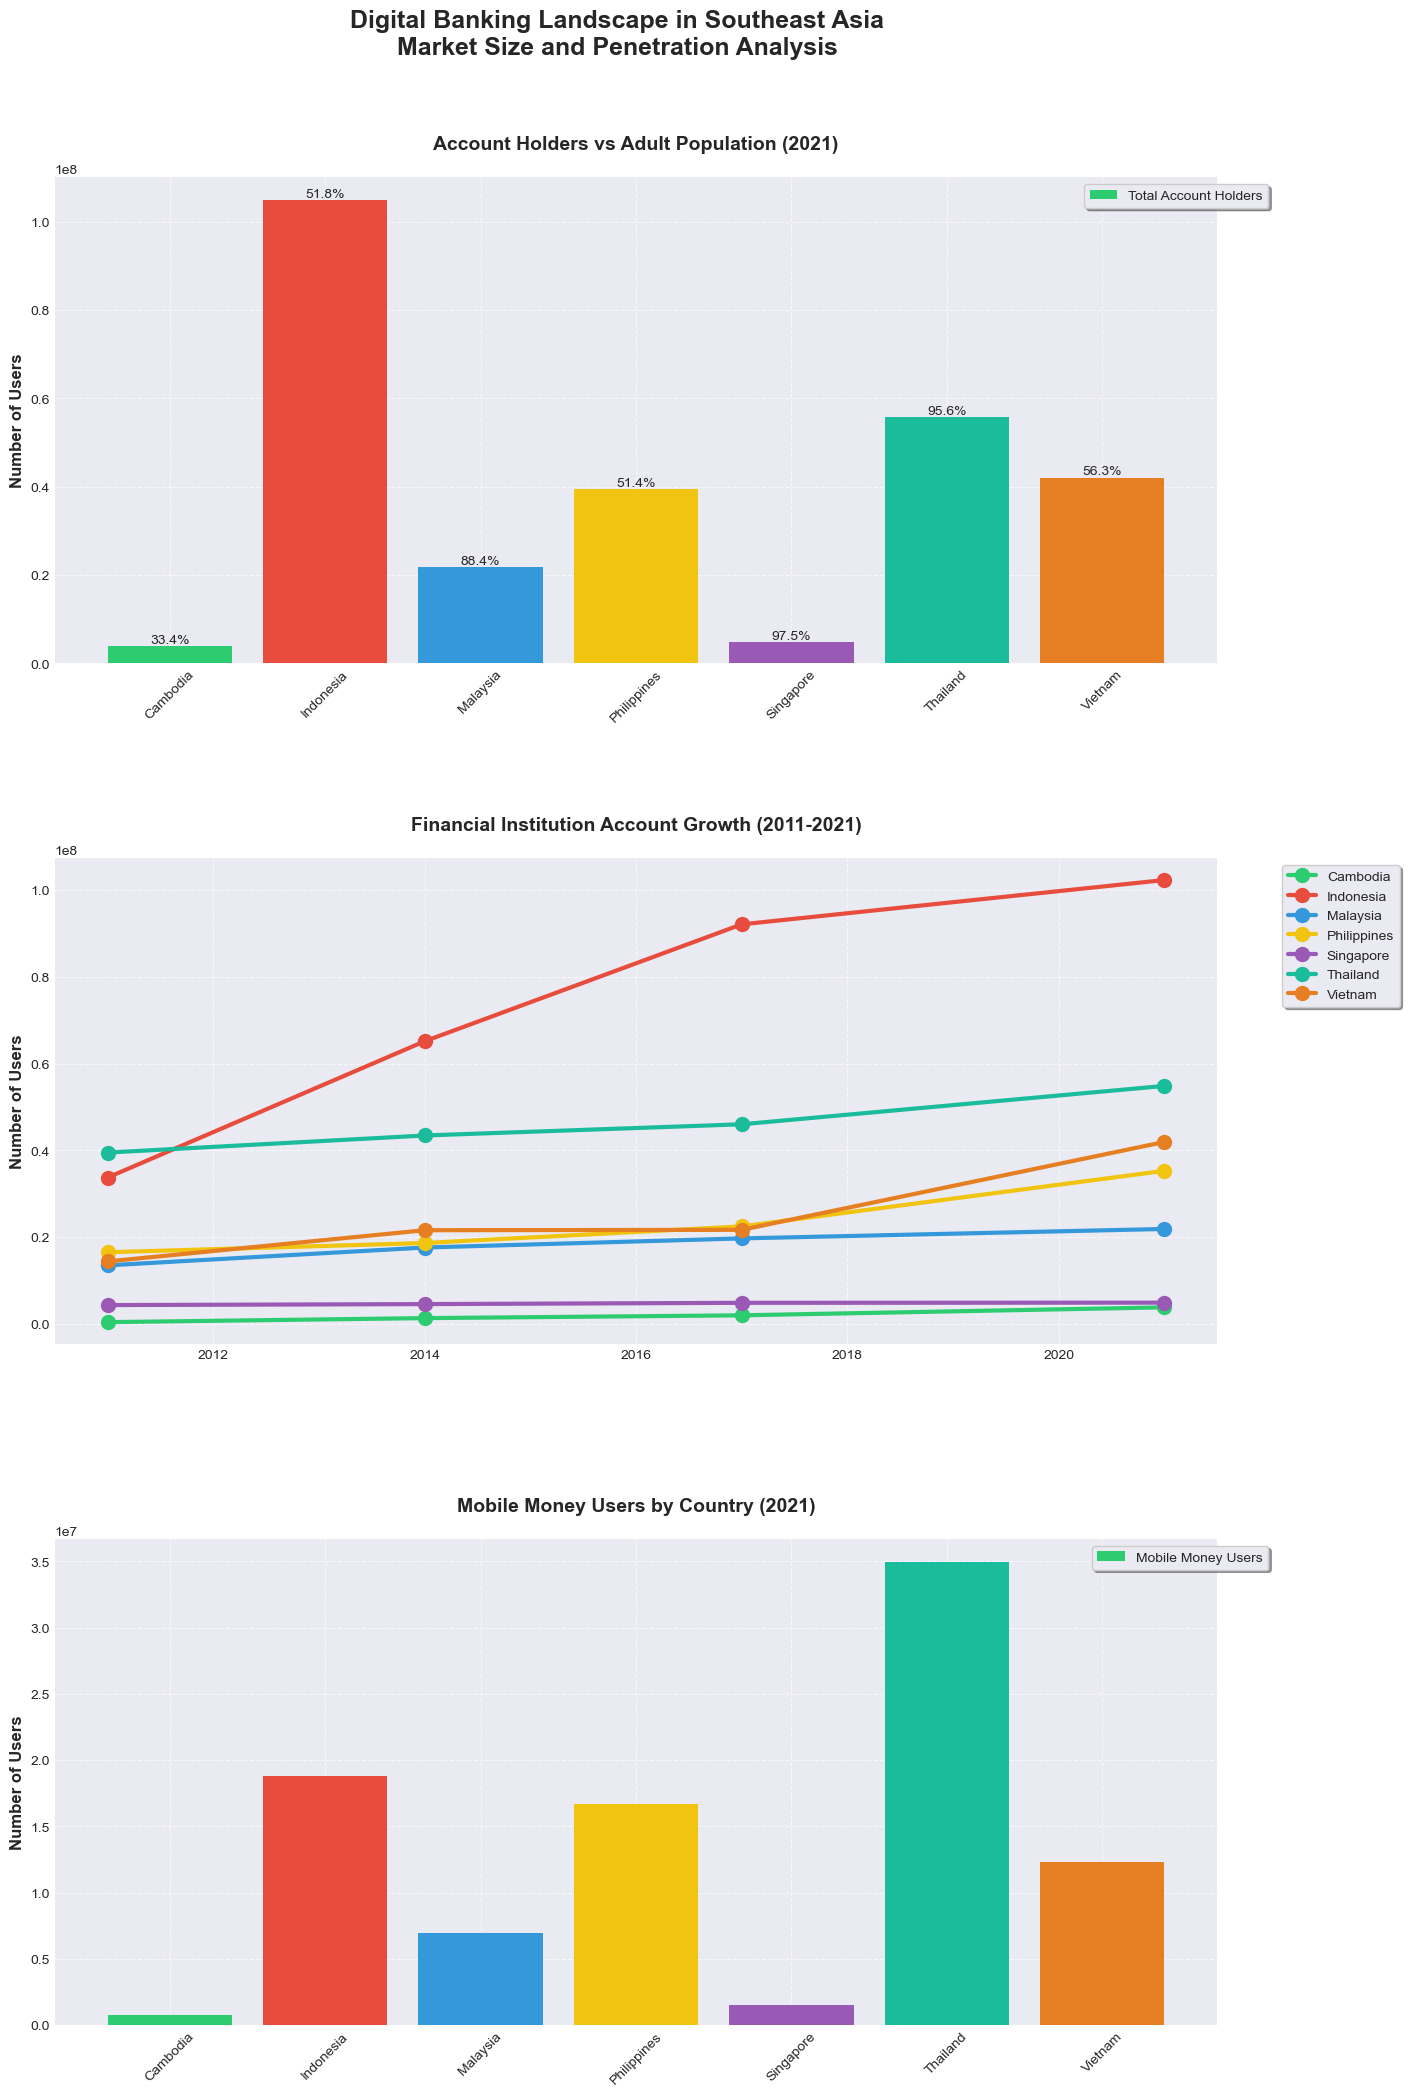

In [29]:
# Set up enhanced style parameters
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f1c40f', '#9b59b6', '#1abc9c', '#e67e22']

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 24))
plt.subplots_adjust(hspace=0.4)

# Plot 1: Total Account Holders vs Adult Population (2021)
data_2021 = mobile_banking_numbers.xs(2021, level='Year')
penetration = (data_2021['Total Account Holders'] / data_2021['Adult populaiton'] * 100).round(1)

bars = ax1.bar(range(len(data_2021.index)), data_2021['Total Account Holders'], color=colors, label='Total Account Holders')
ax1.set_xticks(range(len(data_2021.index)))
ax1.set_xticklabels(data_2021.index, rotation=45)
ax1.set_title('Account Holders vs Adult Population (2021)', pad=20, fontsize=14, fontweight='bold')

# Add penetration rate labels
for idx, (bar, rate) in enumerate(zip(bars, penetration)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{rate}%',
             ha='center', va='bottom')

# Plot 2: Digital Banking Evolution
for i, country in enumerate(mobile_banking_numbers.index.get_level_values('Country name').unique()):
    country_data = mobile_banking_numbers.loc[country]['Financial Institution Account Holders']
    ax2.plot(country_data.index, country_data, marker='o', linewidth=3, markersize=10, 
             label=country, color=colors[i])

ax2.set_title('Financial Institution Account Growth (2011-2021)', pad=20, fontsize=14, fontweight='bold')

# Plot 3: Mobile Money Adoption
mobile_data = mobile_banking_numbers.xs(2021, level='Year')['Mobile Money Account Users']
ax3.bar(range(len(mobile_data)), mobile_data, color=colors, label='Mobile Money Users')
ax3.set_xticks(range(len(mobile_data)))
ax3.set_xticklabels(mobile_data.index, rotation=45)
ax3.set_title('Mobile Money Users by Country (2021)', pad=20, fontsize=14, fontweight='bold')

# Style enhancements for all plots
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(1.05, 1))
    ax.set_ylabel('Number of Users', fontsize=12, fontweight='bold')

fig.suptitle('Digital Banking Landscape in Southeast Asia\nMarket Size and Penetration Analysis', 
            fontsize=18, fontweight='bold', y=0.95)

plt.show()

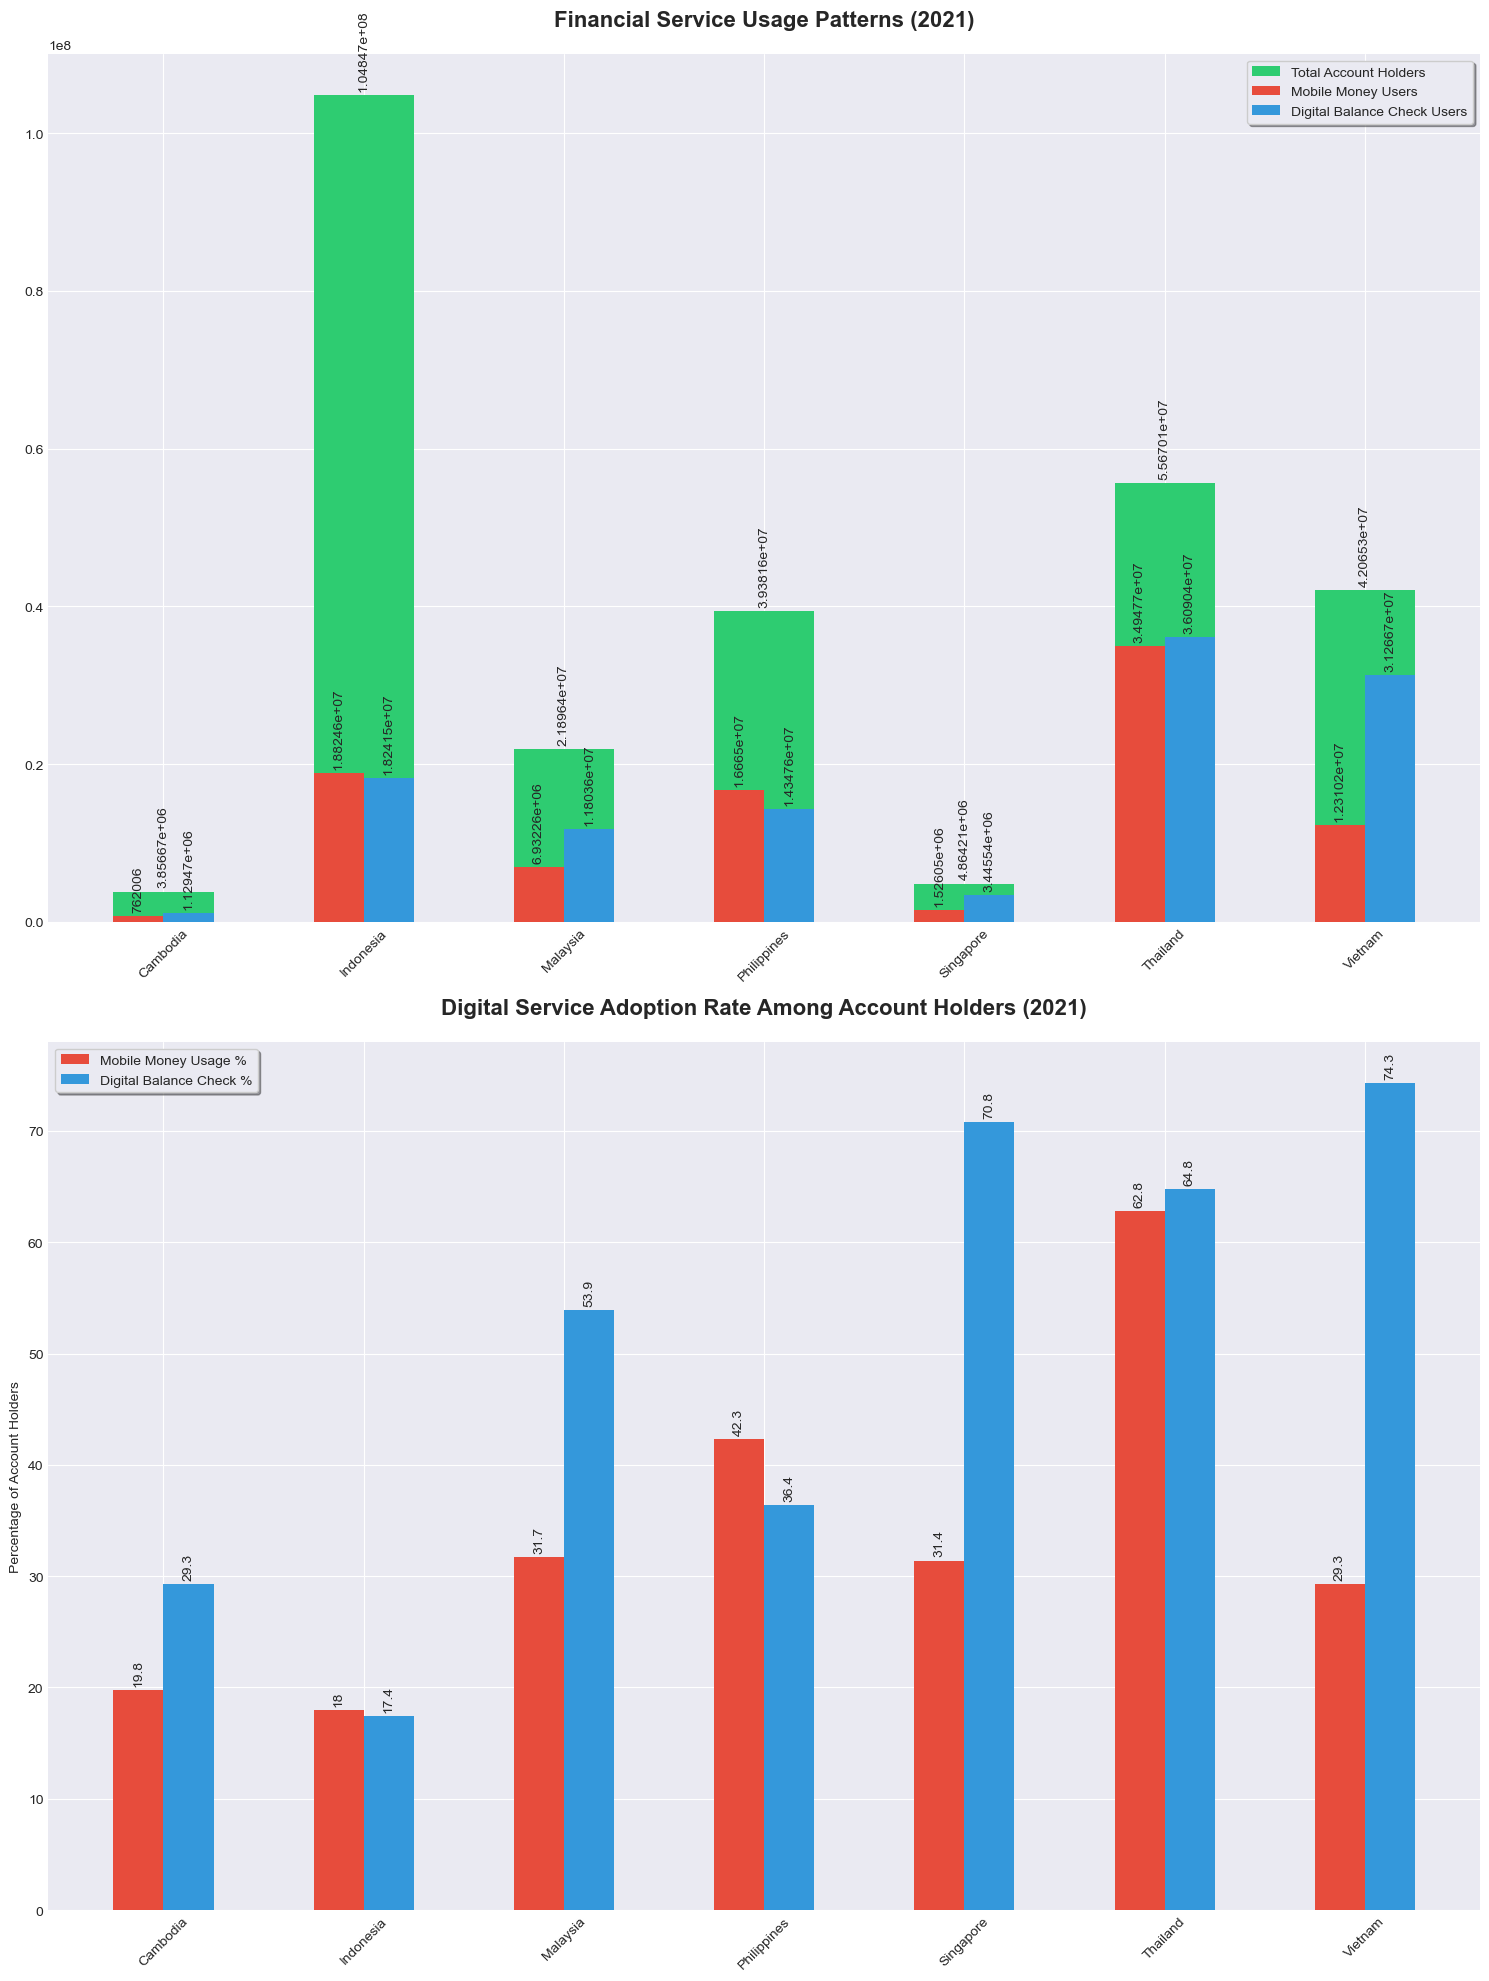

In [31]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2ecc71', '#e74c3c', '#3498db']

# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Get 2021 data for total accounts and service usage
data_2021 = mobile_banking_numbers.xs(2021, level='Year')

# Plot 1: Total Account Holders with Digital Service Usage
total_accounts = data_2021['Total Account Holders']
mobile_users = data_2021['Mobile Money Account Users']
digital_balance = data_2021['Digital Balance Check Users']

x = np.arange(len(data_2021.index))
width = 0.25

# Create grouped bars
ax1.bar(x, total_accounts, width*2, label='Total Account Holders', color=colors[0])
ax1.bar(x - width/2, mobile_users, width, label='Mobile Money Users', color=colors[1])
ax1.bar(x + width/2, digital_balance, width, label='Digital Balance Check Users', color=colors[2])

# Add labels and styling
ax1.set_title('Financial Service Usage Patterns (2021)', pad=20, fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(data_2021.index, rotation=45)
ax1.legend(frameon=True, fancybox=True, shadow=True)

# Plot 2: Service Usage as Percentage of Total Accounts
mobile_pct = (mobile_users / total_accounts * 100).round(1)
digital_pct = (digital_balance / total_accounts * 100).round(1)

ax2.bar(x - width/2, mobile_pct, width, label='Mobile Money Usage %', color=colors[1])
ax2.bar(x + width/2, digital_pct, width, label='Digital Balance Check %', color=colors[2])

ax2.set_title('Digital Service Adoption Rate Among Account Holders (2021)', pad=20, fontsize=16, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(data_2021.index, rotation=45)
ax2.set_ylabel('Percentage of Account Holders')
ax2.legend(frameon=True, fancybox=True, shadow=True)

# Add value labels
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, rotation=90, padding=3)
plt.tight_layout()
plt.show()

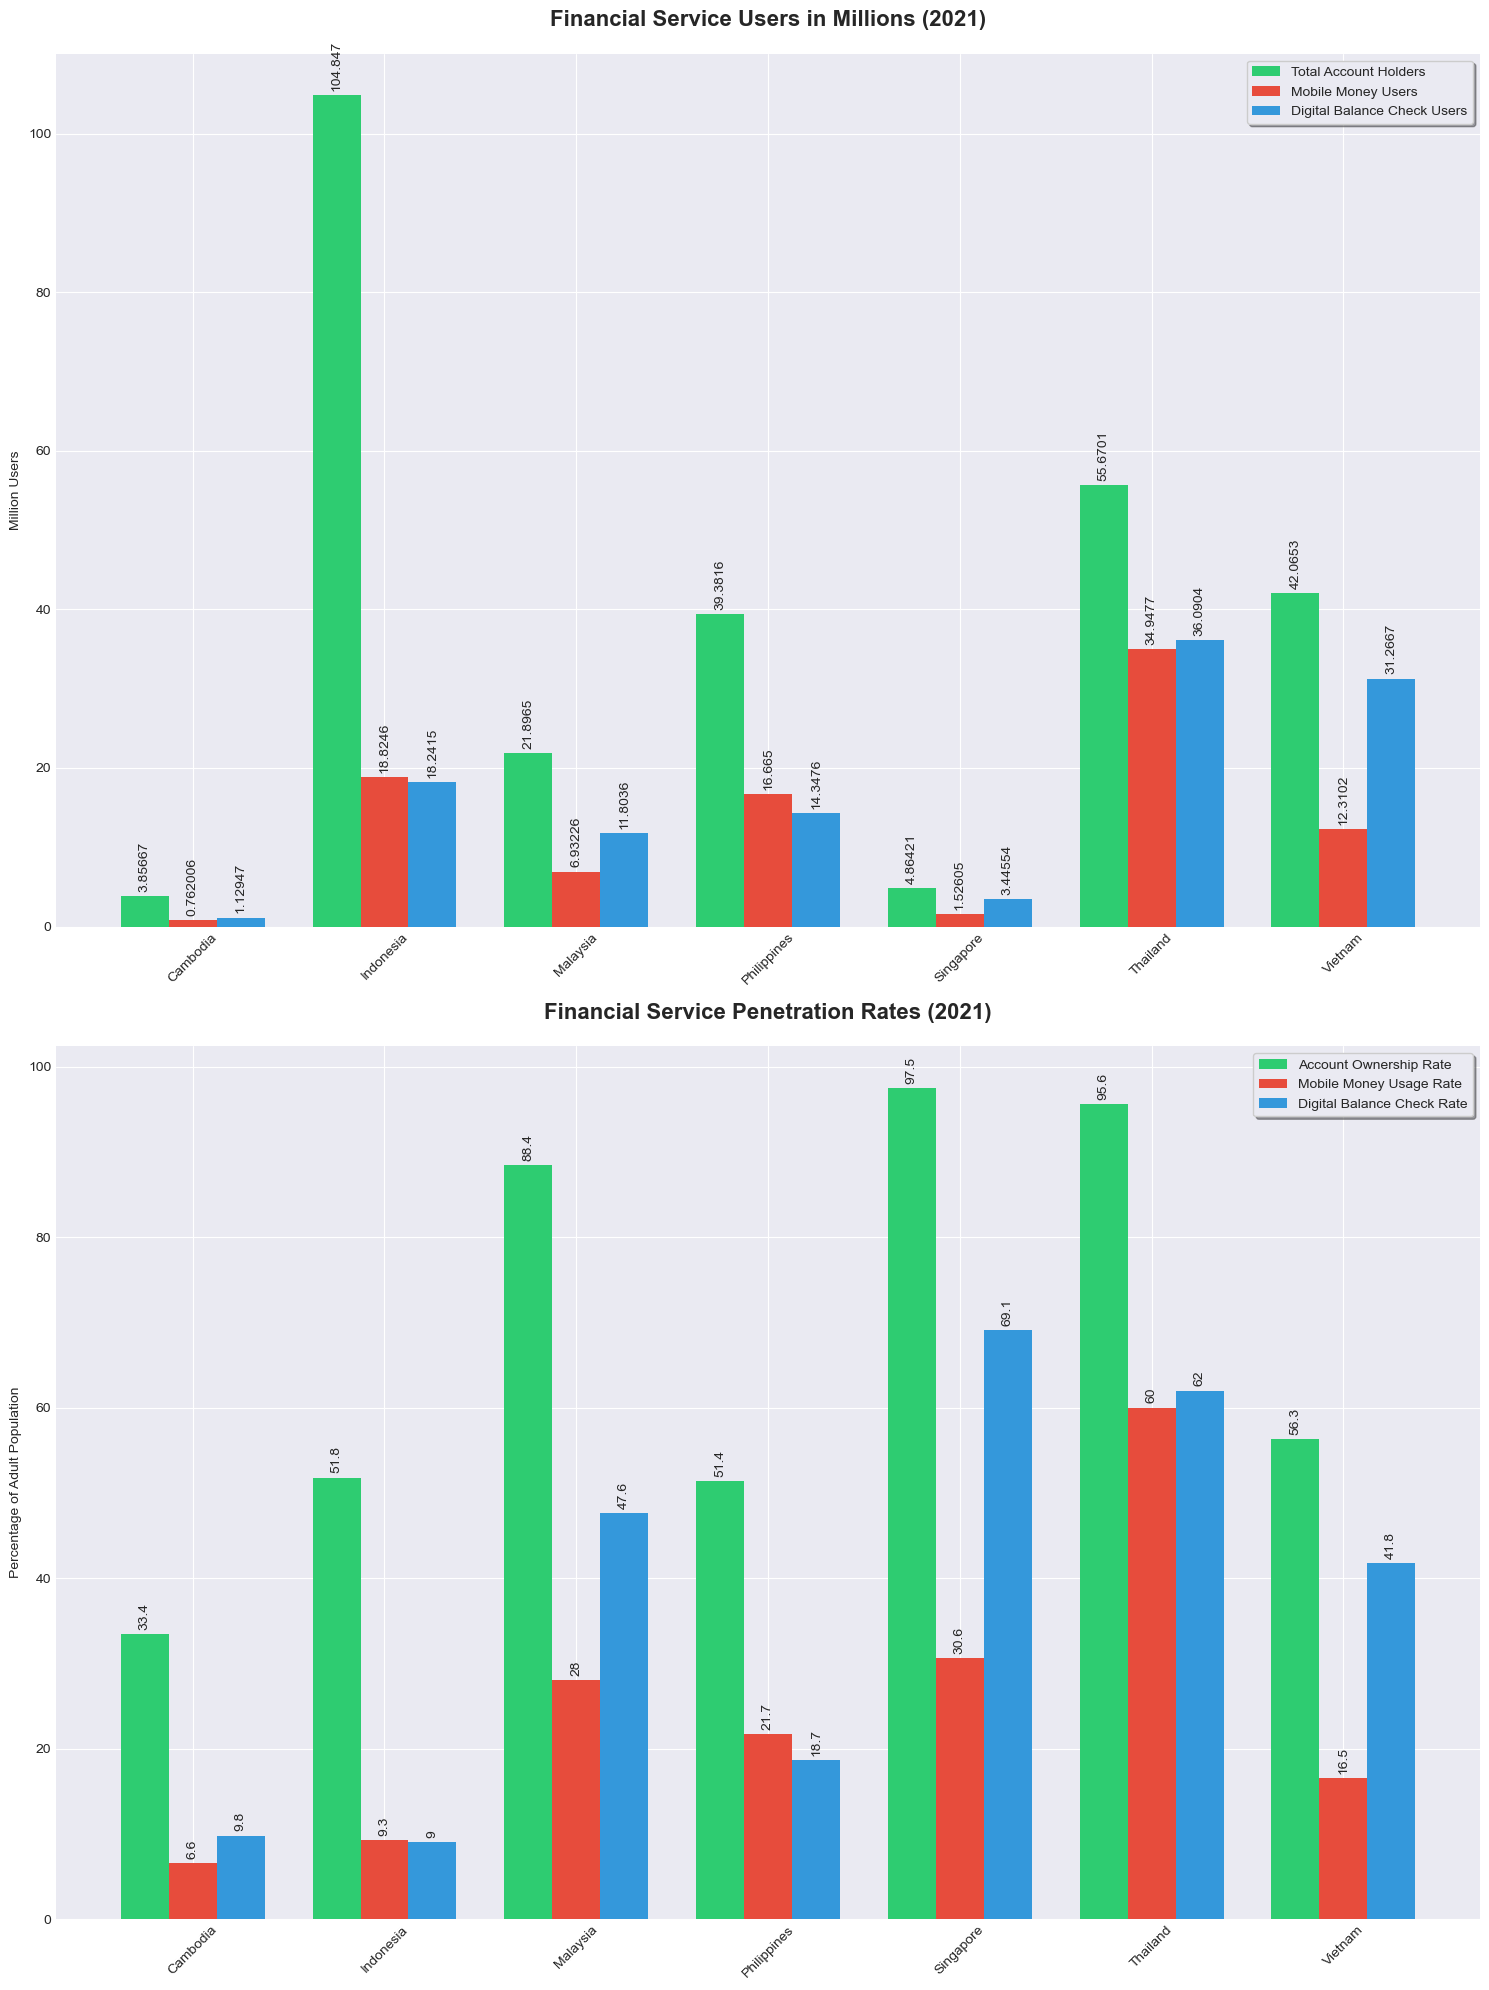

In [32]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2ecc71', '#e74c3c', '#3498db']

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Get 2021 data
data_2021 = mobile_banking_numbers.xs(2021, level='Year')

# Calculate penetration rates
account_rate = (data_2021['Total Account Holders'] / data_2021['Adult populaiton'] * 100).round(1)
mobile_rate = (data_2021['Mobile Money Account Users'] / data_2021['Adult populaiton'] * 100).round(1)
digital_rate = (data_2021['Digital Balance Check Users'] / data_2021['Adult populaiton'] * 100).round(1)

# Plot 1: Absolute Numbers (in millions for readability)
x = np.arange(len(data_2021.index))
width = 0.25

ax1.bar(x - width, data_2021['Total Account Holders']/1e6, width, label='Total Account Holders', color=colors[0])
ax1.bar(x, data_2021['Mobile Money Account Users']/1e6, width, label='Mobile Money Users', color=colors[1])
ax1.bar(x + width, data_2021['Digital Balance Check Users']/1e6, width, label='Digital Balance Check Users', color=colors[2])

ax1.set_title('Financial Service Users in Millions (2021)', pad=20, fontsize=16, fontweight='bold')
ax1.set_ylabel('Million Users')

# Plot 2: Penetration Rates
ax2.bar(x - width, account_rate, width, label='Account Ownership Rate', color=colors[0])
ax2.bar(x, mobile_rate, width, label='Mobile Money Usage Rate', color=colors[1])
ax2.bar(x + width, digital_rate, width, label='Digital Balance Check Rate', color=colors[2])

ax2.set_title('Financial Service Penetration Rates (2021)', pad=20, fontsize=16, fontweight='bold')
ax2.set_ylabel('Percentage of Adult Population')

# Styling for both plots
for ax in [ax1, ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(data_2021.index, rotation=45)
    ax.legend(frameon=True, fancybox=True, shadow=True)
    for container in ax.containers:
        ax.bar_label(container, rotation=90, padding=3)

plt.tight_layout()
plt.show()

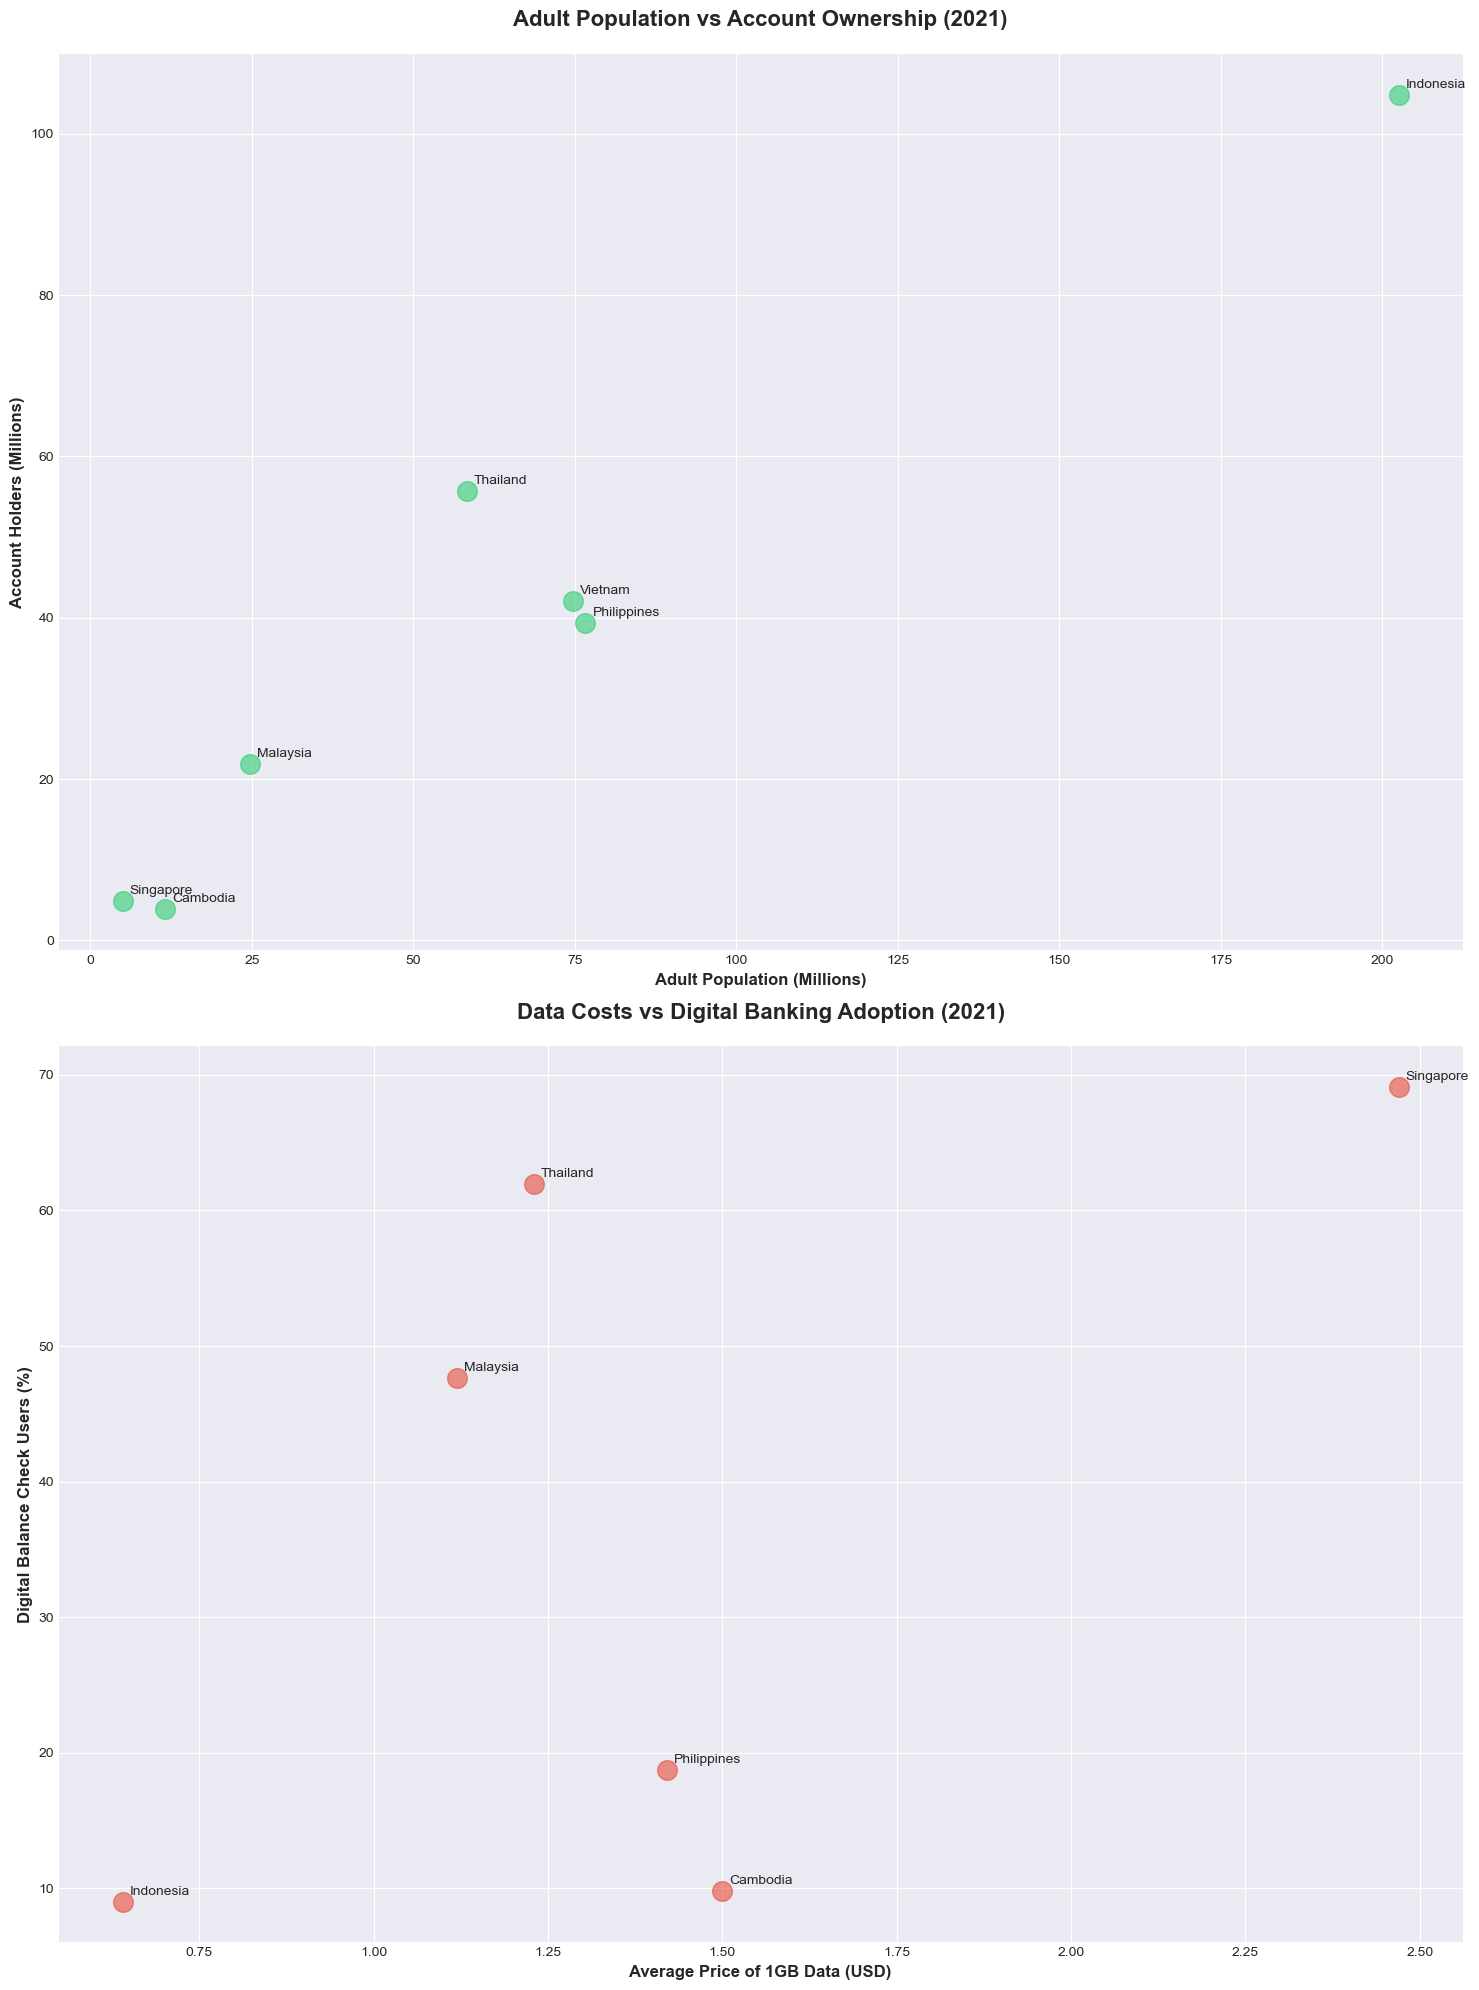

In [33]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2ecc71', '#e74c3c']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Get 2021 data
data_2021 = mobile_banking_numbers.xs(2021, level='Year')

# Plot 1: Adult Population vs Account Ownership
scatter1 = ax1.scatter(data_2021['Adult populaiton']/1e6, 
                      data_2021['Total Account Holders']/1e6,
                      s=200, alpha=0.6, c=colors[0])

# Add country labels
for idx, country in enumerate(data_2021.index):
    ax1.annotate(country, 
                (data_2021['Adult populaiton'].iloc[idx]/1e6, 
                 data_2021['Total Account Holders'].iloc[idx]/1e6),
                xytext=(5, 5), textcoords='offset points')

ax1.set_xlabel('Adult Population (Millions)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Account Holders (Millions)', fontsize=12, fontweight='bold')
ax1.set_title('Adult Population vs Account Ownership (2021)', pad=20, fontsize=16, fontweight='bold')

# Plot 2: Data Costs vs Digital Balance Check Users
scatter2 = ax2.scatter(data_2021['Avg Price of 1GB (USD)'],
                      data_2021['Digital Balance Check Users']/data_2021['Adult populaiton']*100,
                      s=200, alpha=0.6, c=colors[1])

# Add country labels
for idx, country in enumerate(data_2021.index):
    ax2.annotate(country,
                (data_2021['Avg Price of 1GB (USD)'].iloc[idx],
                 data_2021['Digital Balance Check Users'].iloc[idx]/data_2021['Adult populaiton'].iloc[idx]*100),
                xytext=(5, 5), textcoords='offset points')

ax2.set_xlabel('Average Price of 1GB Data (USD)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Digital Balance Check Users (%)', fontsize=12, fontweight='bold')
ax2.set_title('Data Costs vs Digital Banking Adoption (2021)', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

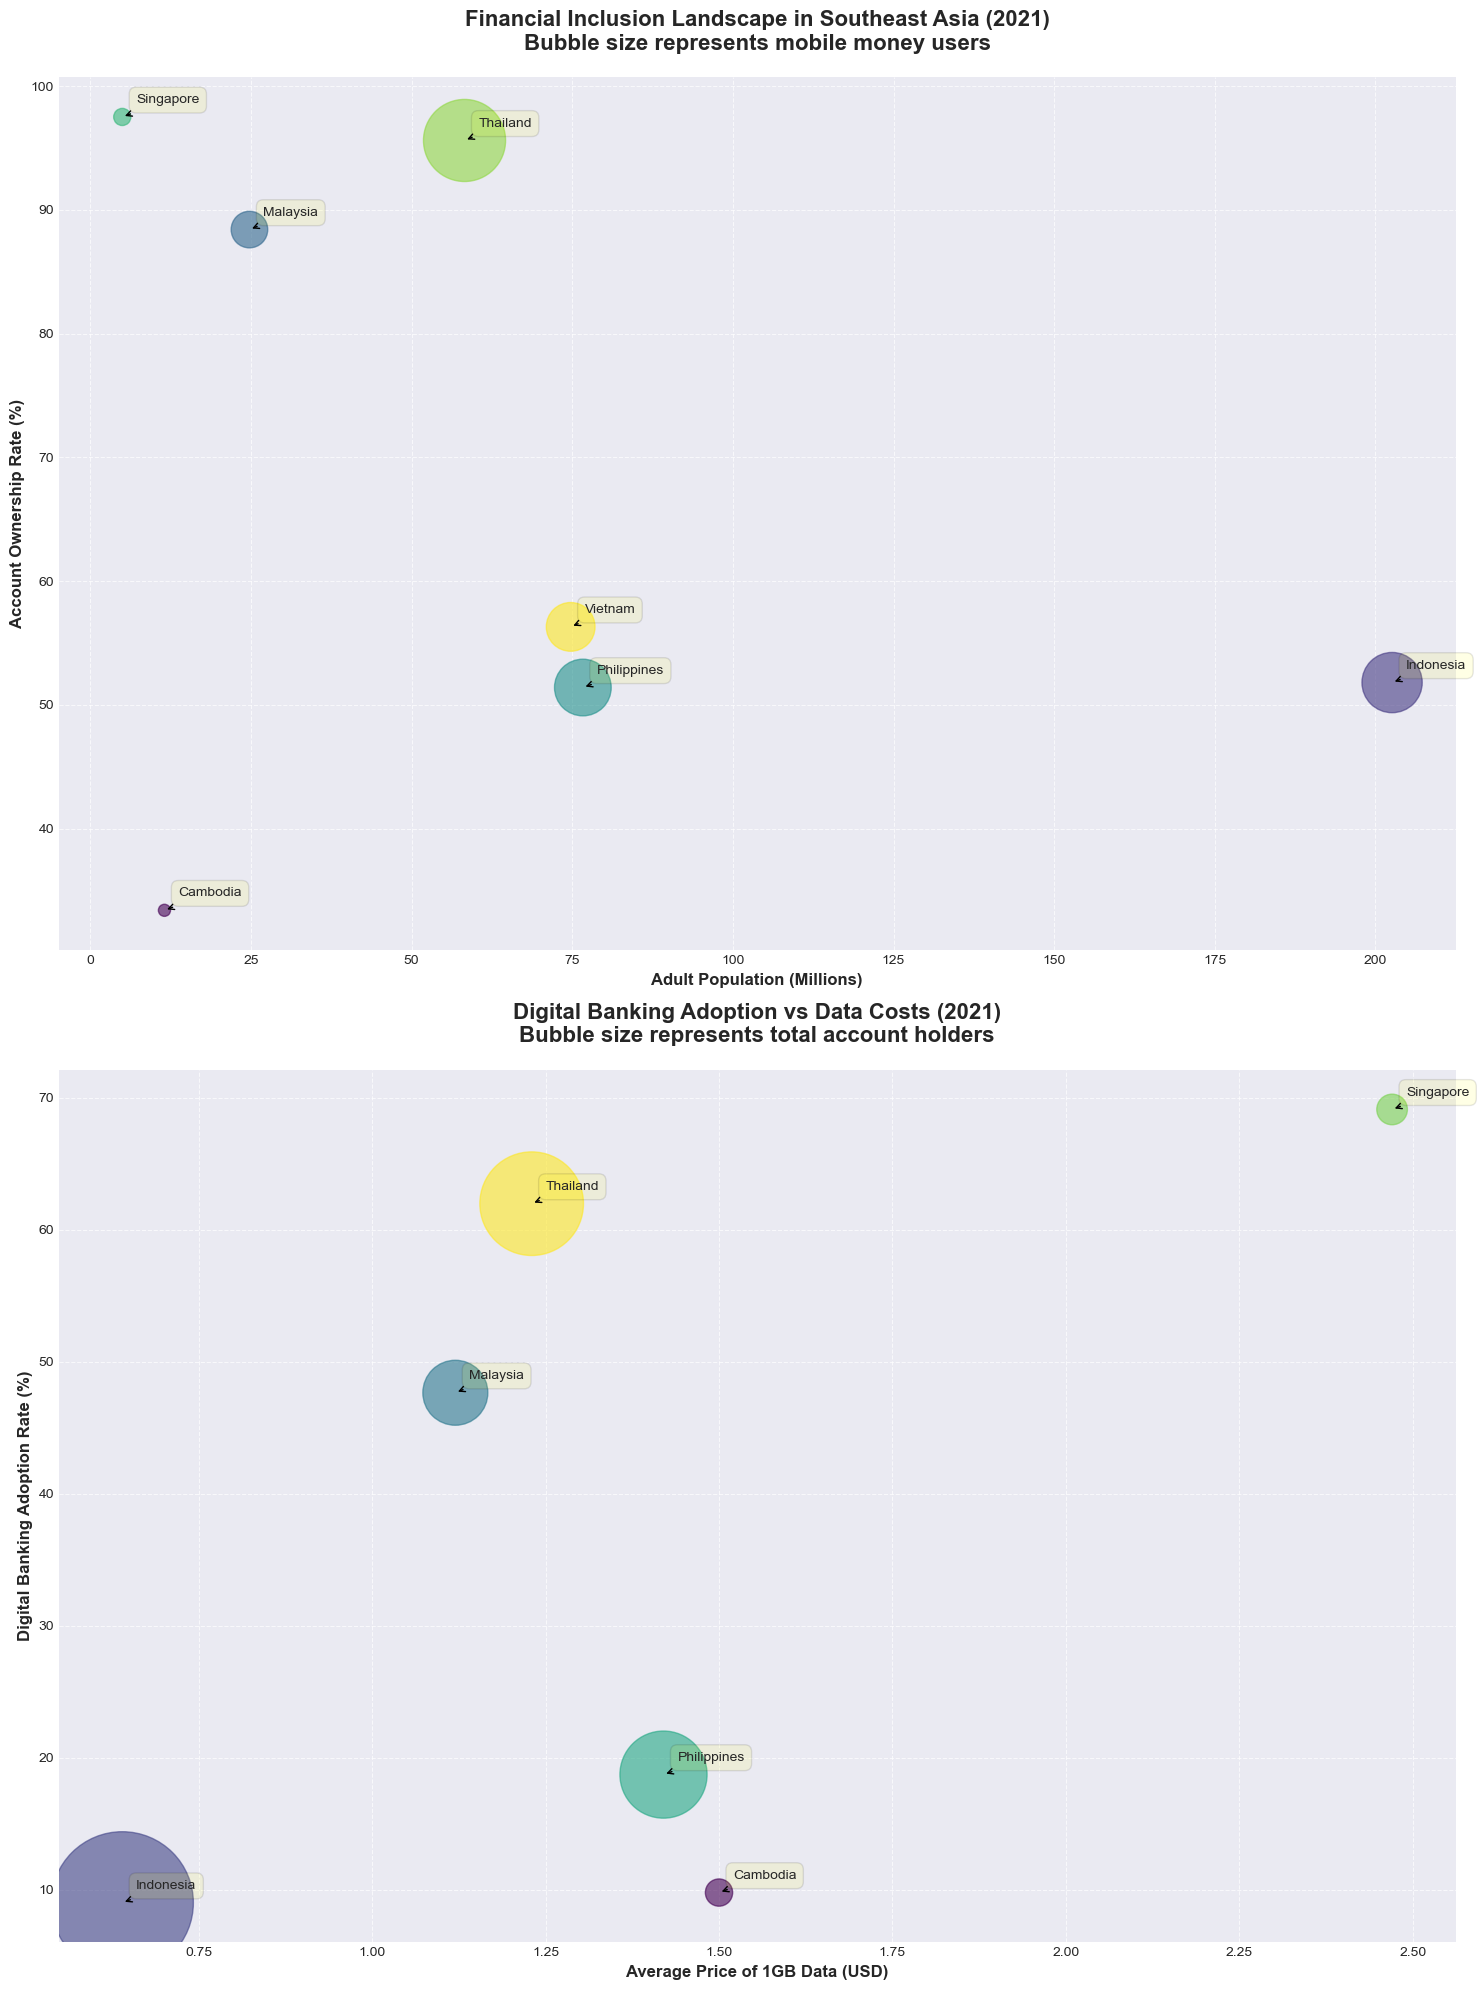

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Get 2021 data
data_2021 = mobile_banking_numbers.xs(2021, level='Year')

# Calculate rates
account_rate = (data_2021['Total Account Holders'] / data_2021['Adult populaiton'] * 100).round(1)
digital_rate = (data_2021['Digital Balance Check Users']/data_2021['Adult populaiton']*100)

# Plot 1: Population vs Financial Inclusion with sized bubbles
scatter1 = ax1.scatter(data_2021['Adult populaiton']/1e6, 
                      account_rate,
                      s=data_2021['Mobile Money Account Users']/1e4, # Size based on mobile money users
                      c=range(len(data_2021)), # Color gradient
                      cmap='viridis',
                      alpha=0.6)

# Add country labels with leader lines
for idx, country in enumerate(data_2021.index):
    ax1.annotate(country, 
                (data_2021['Adult populaiton'].iloc[idx]/1e6, 
                 account_rate.iloc[idx]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax1.set_xlabel('Adult Population (Millions)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Account Ownership Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Financial Inclusion Landscape in Southeast Asia (2021)\nBubble size represents mobile money users', 
              pad=20, fontsize=16, fontweight='bold')

# Plot 2: Data Costs vs Digital Banking with sized bubbles
scatter2 = ax2.scatter(data_2021['Avg Price of 1GB (USD)'],
                      digital_rate,
                      s=data_2021['Total Account Holders']/1e4, # Size based on total accounts
                      c=range(len(data_2021)), # Color gradient
                      cmap='viridis',
                      alpha=0.6)

# Add country labels with leader lines
for idx, country in enumerate(data_2021.index):
    ax2.annotate(country,
                (data_2021['Avg Price of 1GB (USD)'].iloc[idx],
                 digital_rate.iloc[idx]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax2.set_xlabel('Average Price of 1GB Data (USD)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Digital Banking Adoption Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Digital Banking Adoption vs Data Costs (2021)\nBubble size represents total account holders', 
              pad=20, fontsize=16, fontweight='bold')

# Add gridlines
ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

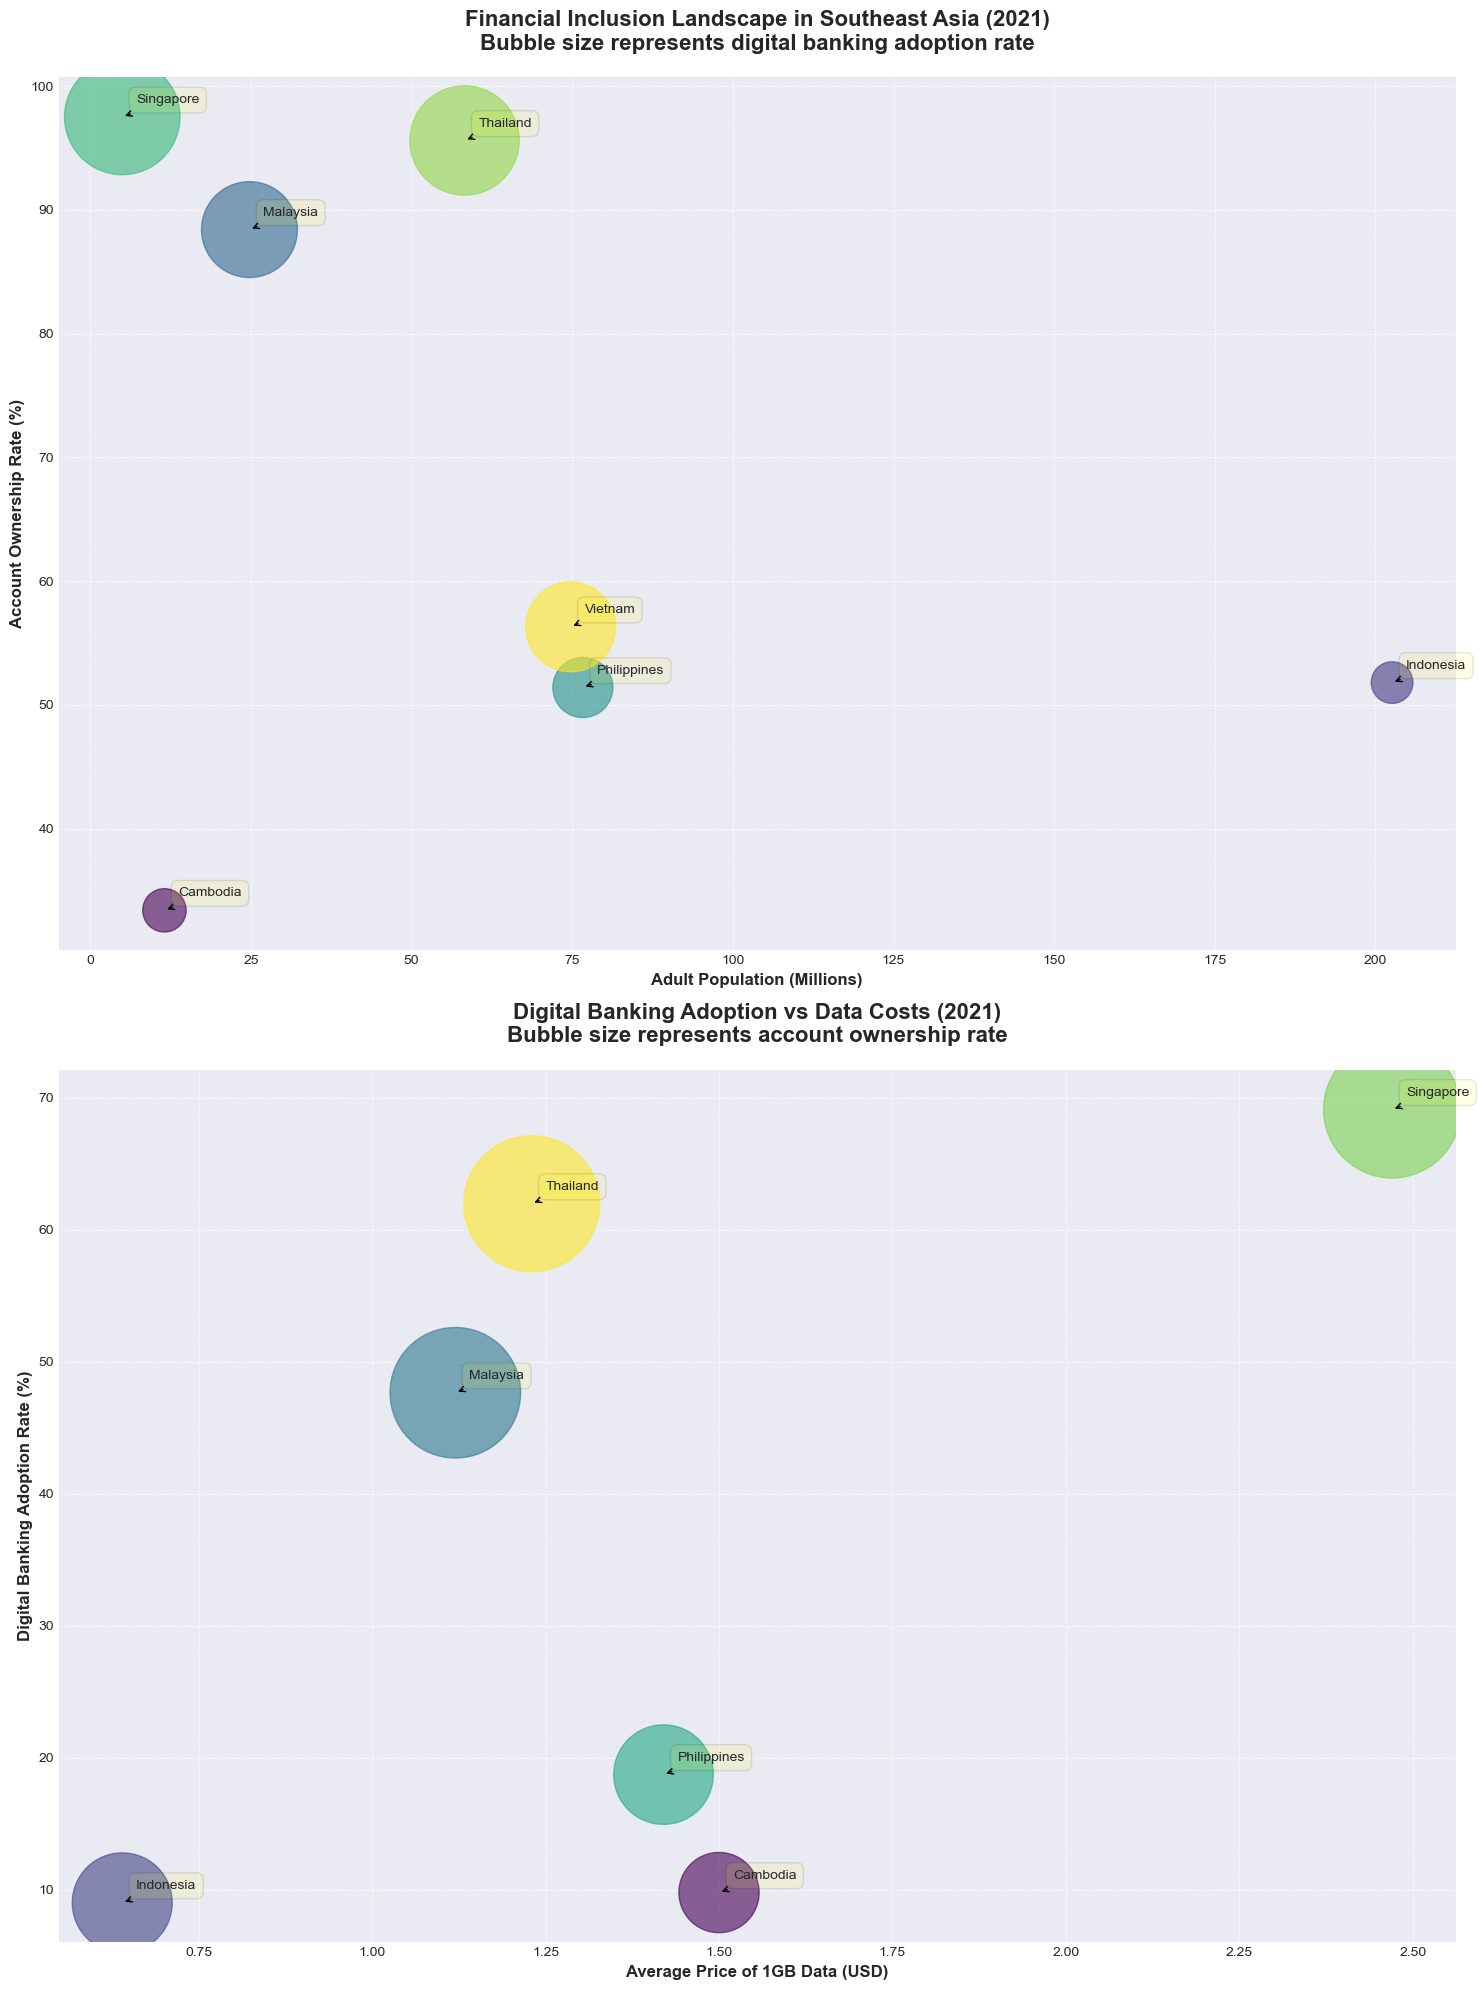

In [36]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Get 2021 data
data_2021 = mobile_banking_numbers.xs(2021, level='Year')

# Calculate rates
account_rate = (data_2021['Total Account Holders'] / data_2021['Adult populaiton'] * 100).round(1)
digital_rate = (data_2021['Digital Balance Check Users']/data_2021['Adult populaiton']*100)

# Plot 1: Population vs Financial Inclusion with sized bubbles
scatter1 = ax1.scatter(data_2021['Adult populaiton']/1e6, 
                      account_rate,
                      s=digital_rate*100, # Size based on digital adoption rate
                      c=range(len(data_2021)),
                      cmap='viridis',
                      alpha=0.6)

# Add country labels with leader lines
for idx, country in enumerate(data_2021.index):
    ax1.annotate(country, 
                (data_2021['Adult populaiton'].iloc[idx]/1e6, 
                 account_rate.iloc[idx]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax1.set_xlabel('Adult Population (Millions)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Account Ownership Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Financial Inclusion Landscape in Southeast Asia (2021)\nBubble size represents digital banking adoption rate', 
              pad=20, fontsize=16, fontweight='bold')

# Plot 2: Data Costs vs Digital Banking with sized bubbles
scatter2 = ax2.scatter(data_2021['Avg Price of 1GB (USD)'],
                      digital_rate,
                      s=account_rate*100, # Size based on account ownership rate
                      c=range(len(data_2021)),
                      cmap='viridis',
                      alpha=0.6)

# Add country labels with leader lines
for idx, country in enumerate(data_2021.index):
    ax2.annotate(country,
                (data_2021['Avg Price of 1GB (USD)'].iloc[idx],
                 digital_rate.iloc[idx]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax2.set_xlabel('Average Price of 1GB Data (USD)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Digital Banking Adoption Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Digital Banking Adoption vs Data Costs (2021)\nBubble size represents account ownership rate', 
              pad=20, fontsize=16, fontweight='bold')

# Add gridlines
ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

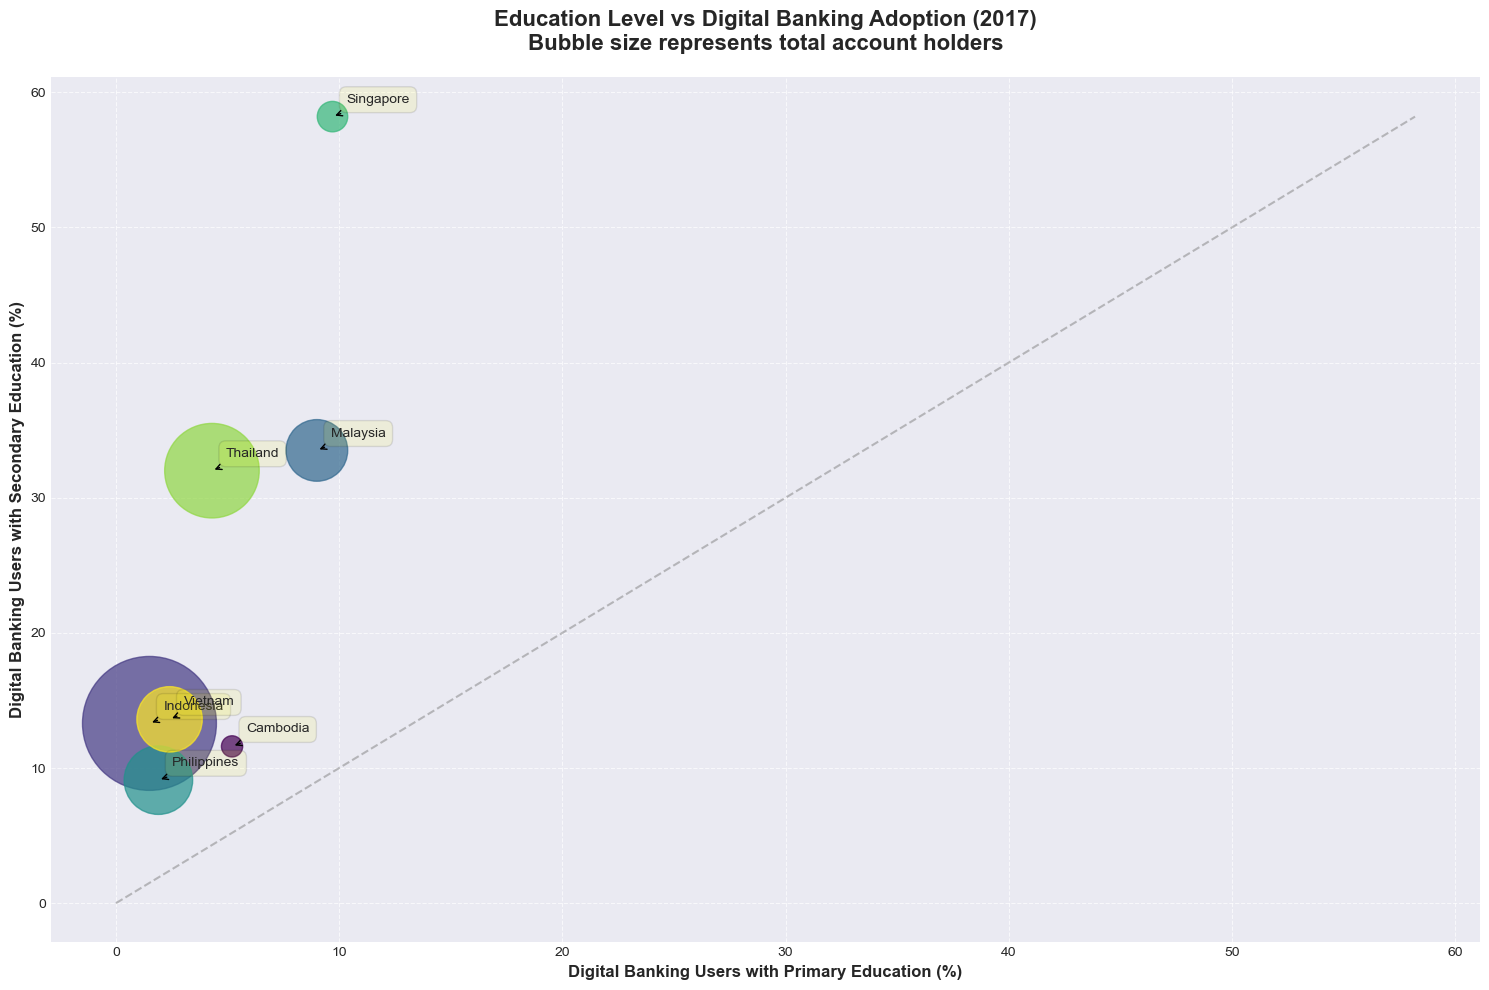

In [37]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.facecolor'] = 'white'

# Create figure
fig, ax = plt.subplots(figsize=(15, 10))

# Get 2017 data (year with education data)
data_2017 = mobile_banking_numbers.xs(2017, level='Year')

# Calculate education rates
primary_rate = (data_2017['Digital Users with Primary Education'] / data_2017['Adult populaiton'] * 100).round(1)
secondary_rate = (data_2017['Digital Users with Secondary Education'] / data_2017['Adult populaiton'] * 100).round(1)

# Create scatter plot
scatter = ax.scatter(primary_rate, secondary_rate,
                    s=data_2017['Total Account Holders']/1e4,
                    c=range(len(data_2017)),
                    cmap='viridis',
                    alpha=0.7)

# Add country labels with leader lines
for idx, country in enumerate(data_2017.index):
    ax.annotate(country, 
                (primary_rate.iloc[idx], secondary_rate.iloc[idx]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add diagonal line for reference
ax.plot([0, max(max(primary_rate), max(secondary_rate))], 
        [0, max(max(primary_rate), max(secondary_rate))], 
        '--', color='gray', alpha=0.5)

ax.set_xlabel('Digital Banking Users with Primary Education (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Digital Banking Users with Secondary Education (%)', fontsize=12, fontweight='bold')
ax.set_title('Education Level vs Digital Banking Adoption (2017)\nBubble size represents total account holders', 
             pad=20, fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

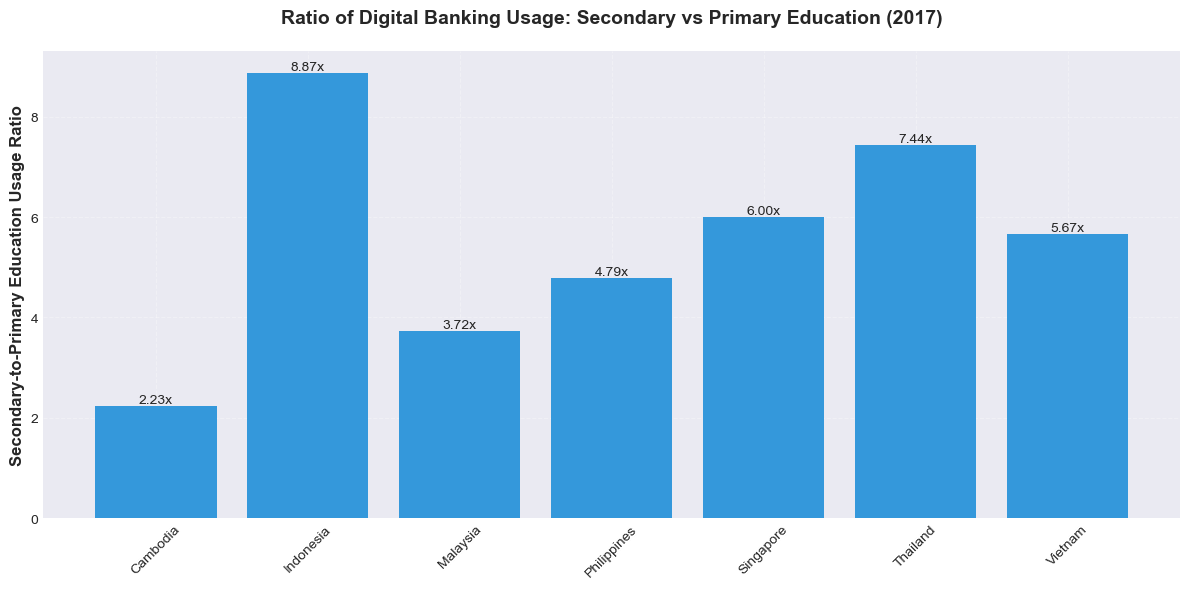


Secondary-to-Primary Education Digital Banking Usage Ratios:
Cambodia: 2.23x higher usage with secondary education
Indonesia: 8.87x higher usage with secondary education
Malaysia: 3.72x higher usage with secondary education
Philippines: 4.79x higher usage with secondary education
Singapore: 6.0x higher usage with secondary education
Thailand: 7.44x higher usage with secondary education
Vietnam: 5.67x higher usage with secondary education


In [38]:
# Calculate ratios of secondary to primary education digital banking usage
education_ratio = (secondary_rate / primary_rate).round(2)

# Create a bar plot showing these ratios
plt.figure(figsize=(12, 6))
bars = plt.bar(data_2017.index, education_ratio, color='#3498db')
plt.title('Ratio of Digital Banking Usage: Secondary vs Primary Education (2017)', 
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Secondary-to-Primary Education Usage Ratio', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}x',
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the exact ratios
print("\nSecondary-to-Primary Education Digital Banking Usage Ratios:")
for country in data_2017.index:
    print(f"{country}: {education_ratio[country]}x higher usage with secondary education")

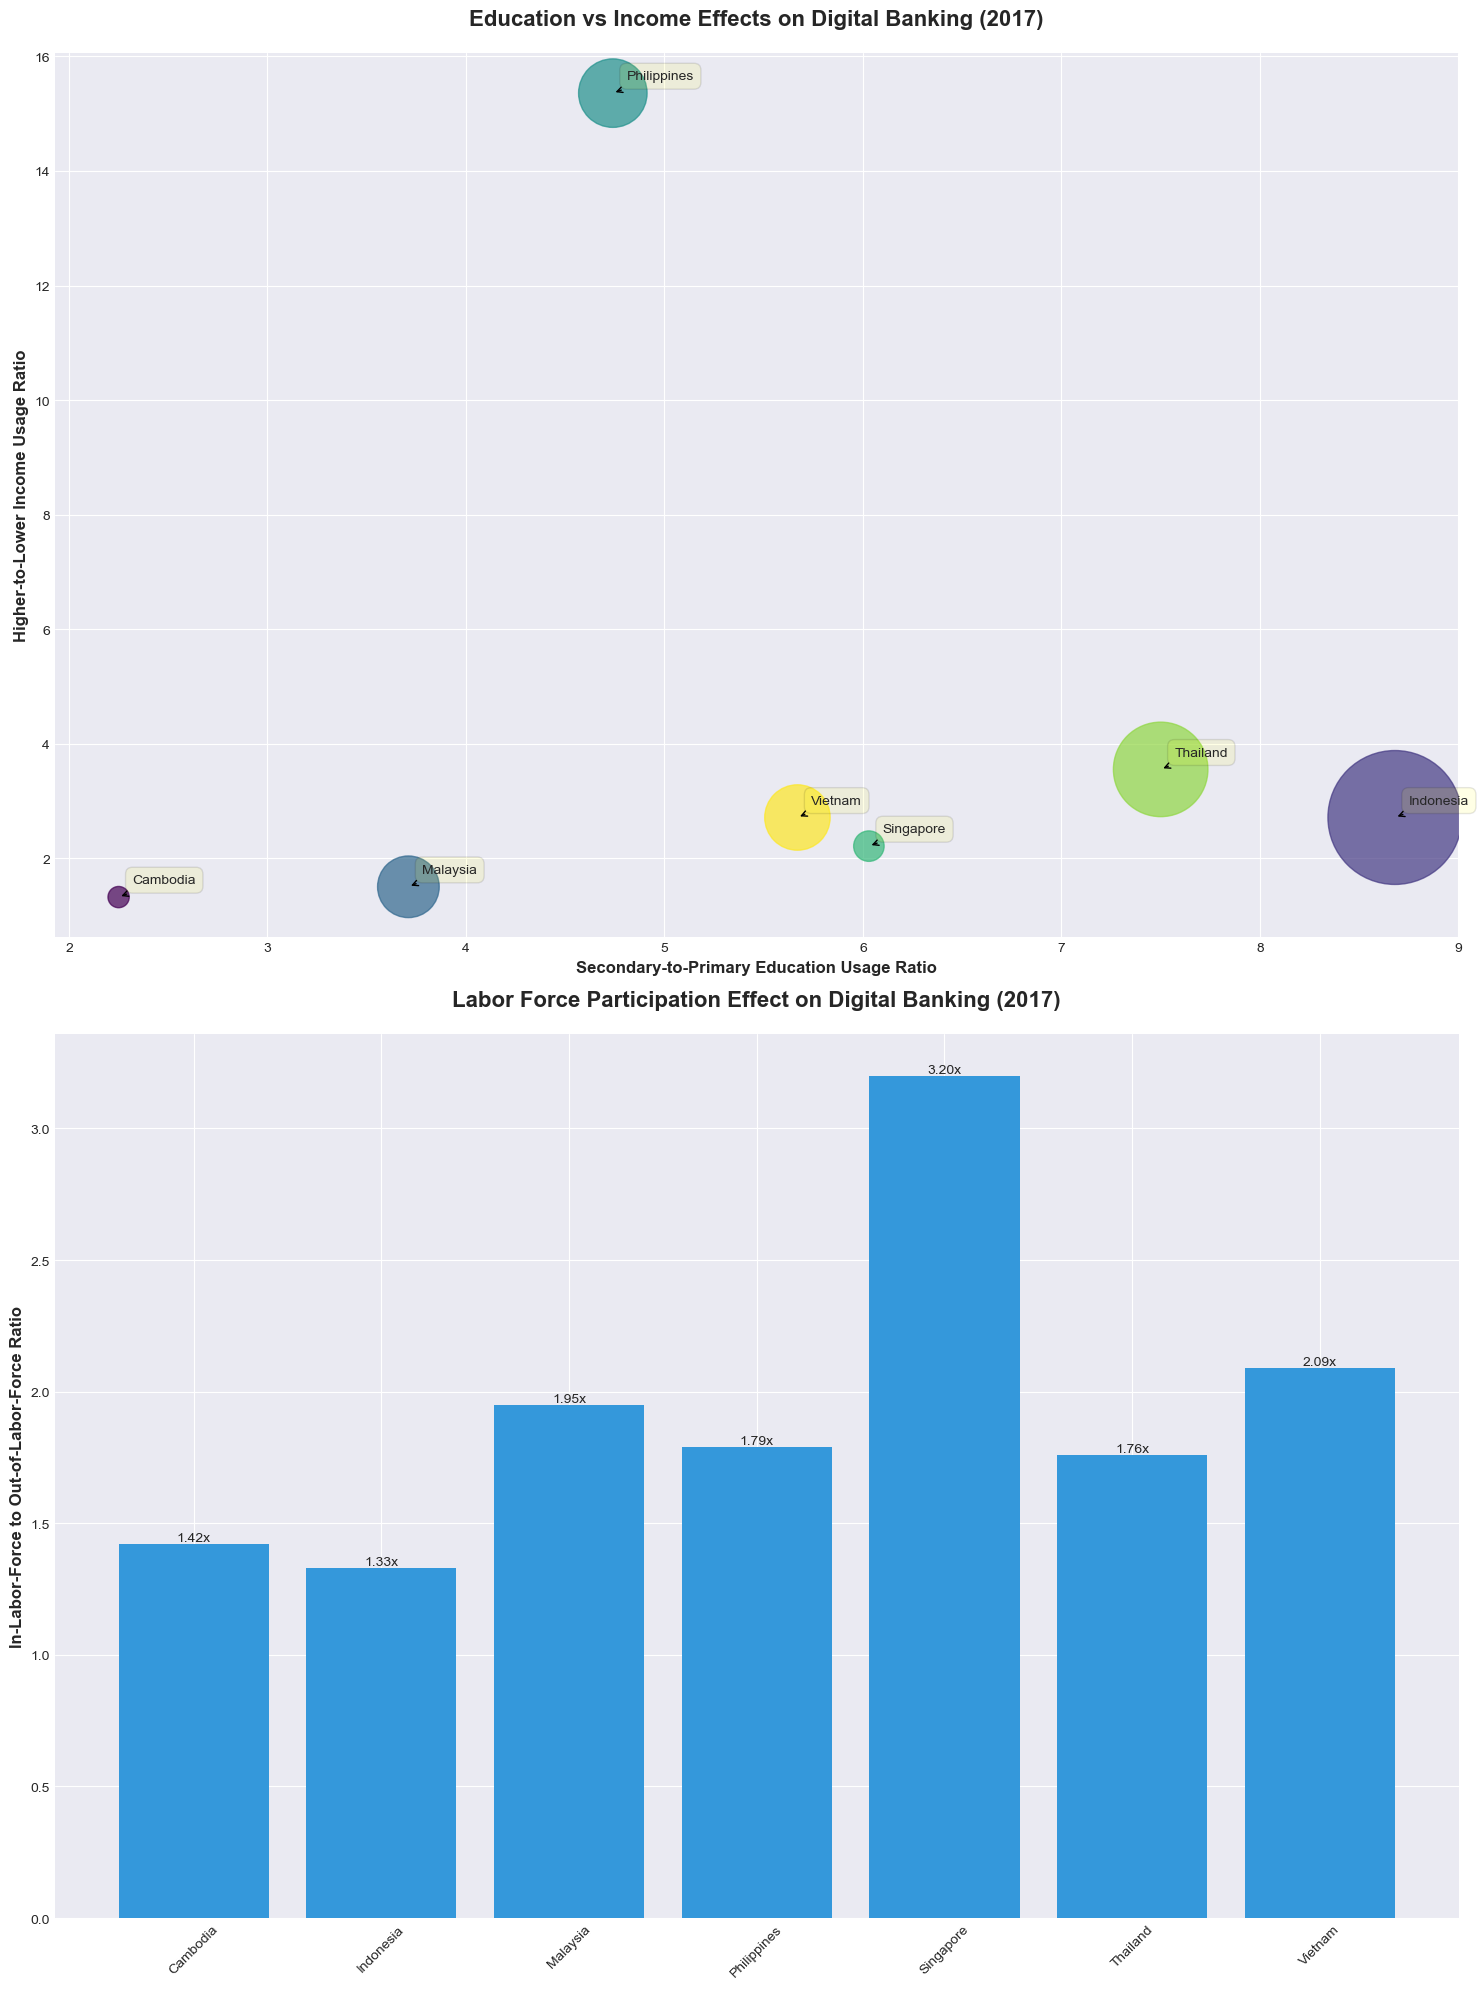

In [39]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Get 2017 data
data_2017 = mobile_banking_numbers.xs(2017, level='Year')

# Calculate rates for different segments
income_ratio = (data_2017['Digital Users from Higher Income'] / 
                data_2017['Digital Users from Lower Income']).round(2)
education_ratio = (data_2017['Digital Users with Secondary Education'] / 
                   data_2017['Digital Users with Primary Education']).round(2)

# Plot 1: Education vs Income Effects
scatter1 = ax1.scatter(education_ratio, income_ratio,
                      s=data_2017['Total Account Holders']/1e4,
                      c=range(len(data_2017)),
                      cmap='viridis',
                      alpha=0.7)

for idx, country in enumerate(data_2017.index):
    ax1.annotate(country, 
                (education_ratio.iloc[idx], income_ratio.iloc[idx]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax1.set_xlabel('Secondary-to-Primary Education Usage Ratio', fontsize=12, fontweight='bold')
ax1.set_ylabel('Higher-to-Lower Income Usage Ratio', fontsize=12, fontweight='bold')
ax1.set_title('Education vs Income Effects on Digital Banking (2017)', 
              pad=20, fontsize=16, fontweight='bold')

# Plot 2: Labor Force Participation Effect
labor_ratio = (data_2017['Digital Users In Labor Force'] / 
               data_2017['Digital Users Outside Labor Force']).round(2)

bars = ax2.bar(data_2017.index, labor_ratio, color='#3498db')
ax2.set_title('Labor Force Participation Effect on Digital Banking (2017)', 
              pad=20, fontsize=16, fontweight='bold')
ax2.set_ylabel('In-Labor-Force to Out-of-Labor-Force Ratio', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}x',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [40]:
# Extract Philippines data for 2017
ph_data = data_2017.loc['Philippines']

# Calculate and display income segment metrics
ph_higher_income = ph_data['Digital Users from Higher Income']
ph_lower_income = ph_data['Digital Users from Lower Income']
ph_ratio = (ph_higher_income / ph_lower_income).round(2)

print("Philippines Digital Banking Analysis (2017):")
print(f"Higher Income Users: {ph_higher_income:,.0f}")
print(f"Lower Income Users: {ph_lower_income:,.0f}")
print(f"Income Usage Ratio: {ph_ratio}x")

# Compare with regional averages
regional_ratio = (data_2017['Digital Users from Higher Income'] / 
                 data_2017['Digital Users from Lower Income']).mean()
print(f"\nRegional Average Income Usage Ratio: {regional_ratio:.2f}x")

Philippines Digital Banking Analysis (2017):
Higher Income Users: 7,841,321
Lower Income Users: 510,396
Income Usage Ratio: 15.36x

Regional Average Income Usage Ratio: 4.20x


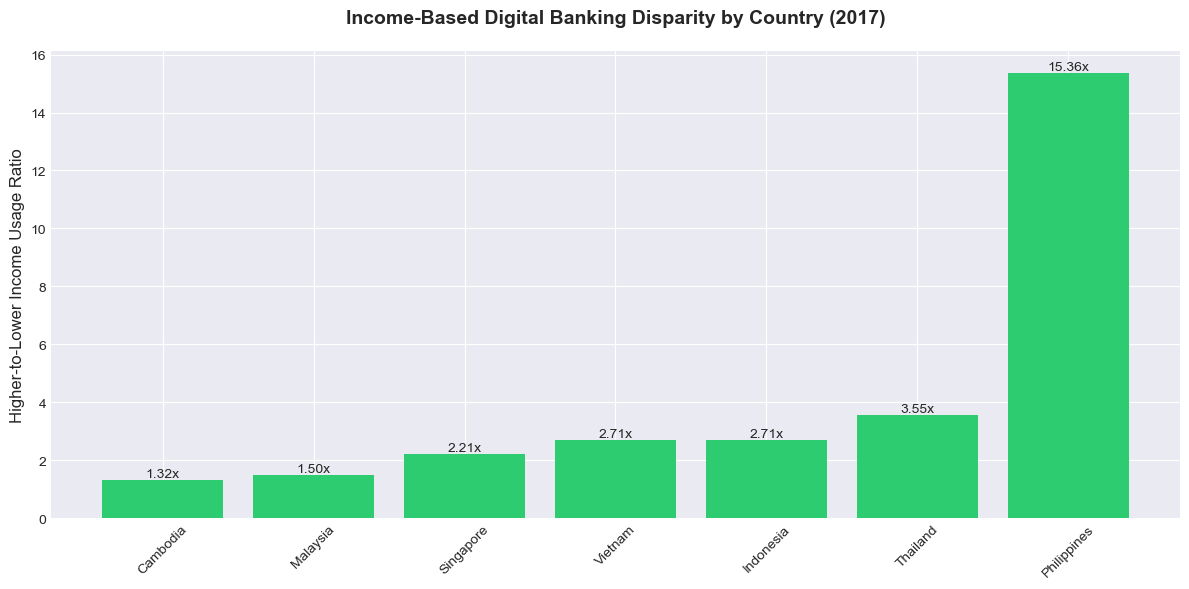


Key strategies from markets with better income inclusion:

Cambodia:
Higher Income Users: 707,510
Lower Income Users: 537,194

Malaysia:
Higher Income Users: 8,685,535
Lower Income Users: 5,772,065

Singapore:
Higher Income Users: 3,066,610
Lower Income Users: 1,384,668


In [41]:
# Compare income ratios across countries in 2017
income_ratios = (data_2017['Digital Users from Higher Income'] / 
                data_2017['Digital Users from Lower Income']).sort_values()

plt.figure(figsize=(12, 6))
bars = plt.bar(income_ratios.index, income_ratios, color='#2ecc71')
plt.title('Income-Based Digital Banking Disparity by Country (2017)', 
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Higher-to-Lower Income Usage Ratio', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}x',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print successful strategies from markets with lower ratios
print("\nKey strategies from markets with better income inclusion:")
for country in income_ratios.head(3).index:
    print(f"\n{country}:")
    print(f"Higher Income Users: {data_2017.loc[country, 'Digital Users from Higher Income']:,.0f}")
    print(f"Lower Income Users: {data_2017.loc[country, 'Digital Users from Lower Income']:,.0f}")

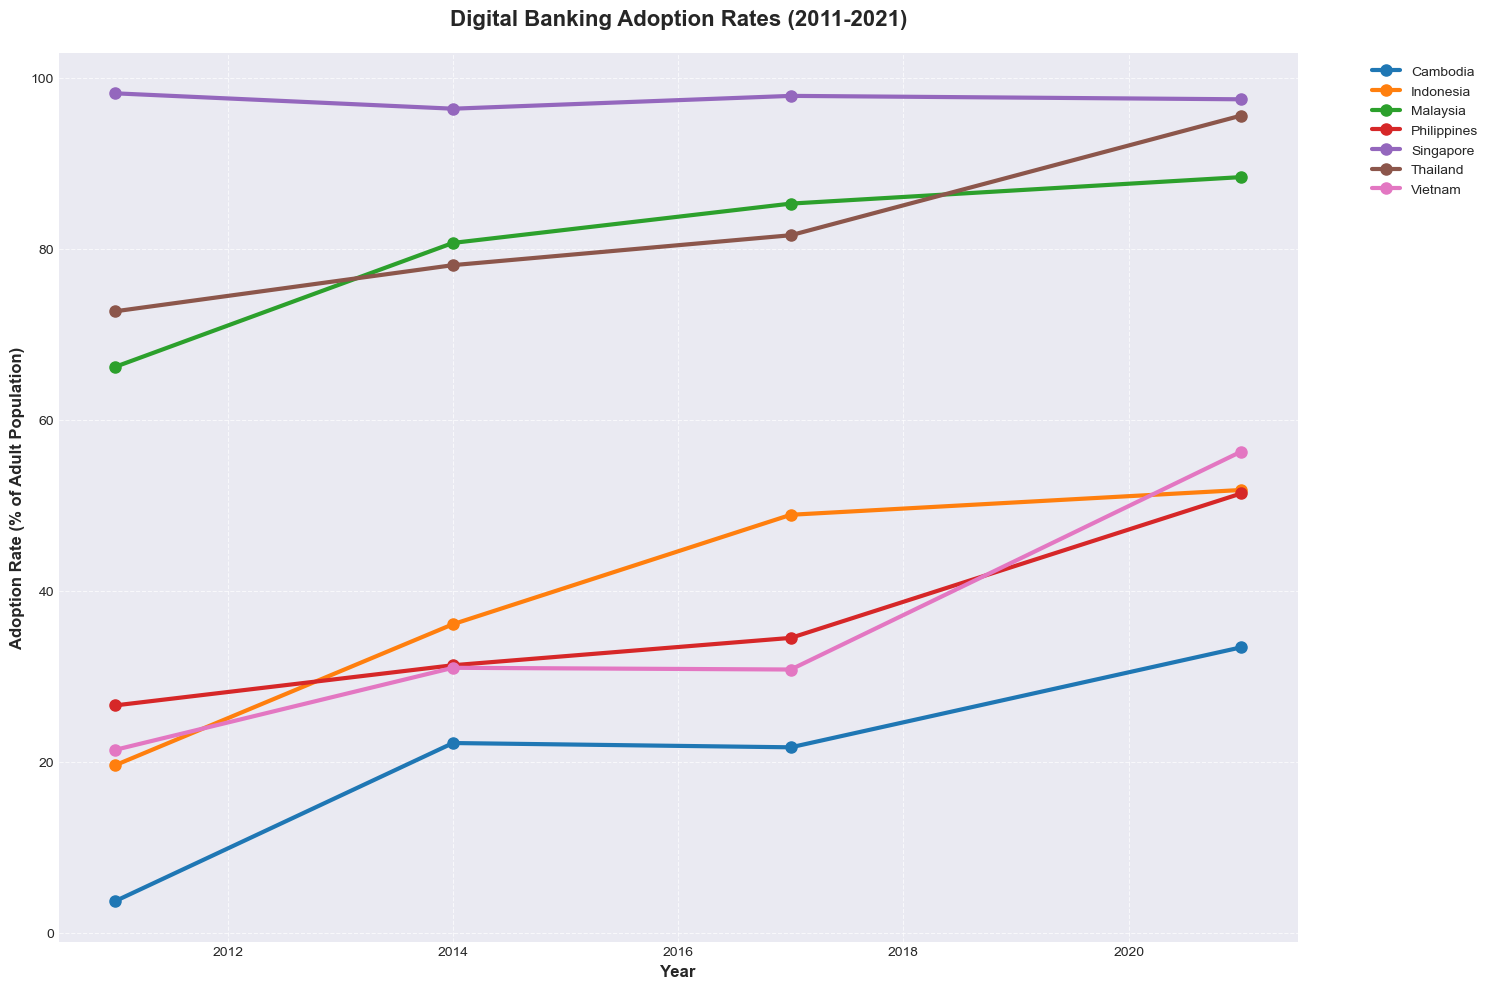


Compound Annual Growth Rate (2011-2021):
Cambodia: 27.1%
Indonesia: 12.0%
Malaysia: 5.0%
Philippines: 9.1%
Singapore: 1.3%
Thailand: 3.5%
Vietnam: 11.3%


In [43]:
# Set up an advanced time series visualization
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot adoption rates for each country over time
for country in mobile_banking_numbers.index.get_level_values('Country name').unique():
    country_data = mobile_banking_numbers.loc[country]
    adoption_rate = (country_data['Total Account Holders'] / country_data['Adult populaiton'] * 100).round(1)
    plt.plot(country_data.index, adoption_rate, marker='o', linewidth=3, markersize=8, label=country)

plt.title('Digital Banking Adoption Rates (2011-2021)', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Adoption Rate (% of Adult Population)', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Calculate and display CAGR for each country
print("\nCompound Annual Growth Rate (2011-2021):")
for country in mobile_banking_numbers.index.get_level_values('Country name').unique():
    start_rate = mobile_banking_numbers.loc[(country, 2011), 'Total Account Holders']
    end_rate = mobile_banking_numbers.loc[(country, 2021), 'Total Account Holders']
    cagr = ((end_rate/start_rate)**(1/10) - 1) * 100
    print(f"{country}: {cagr:.1f}%")

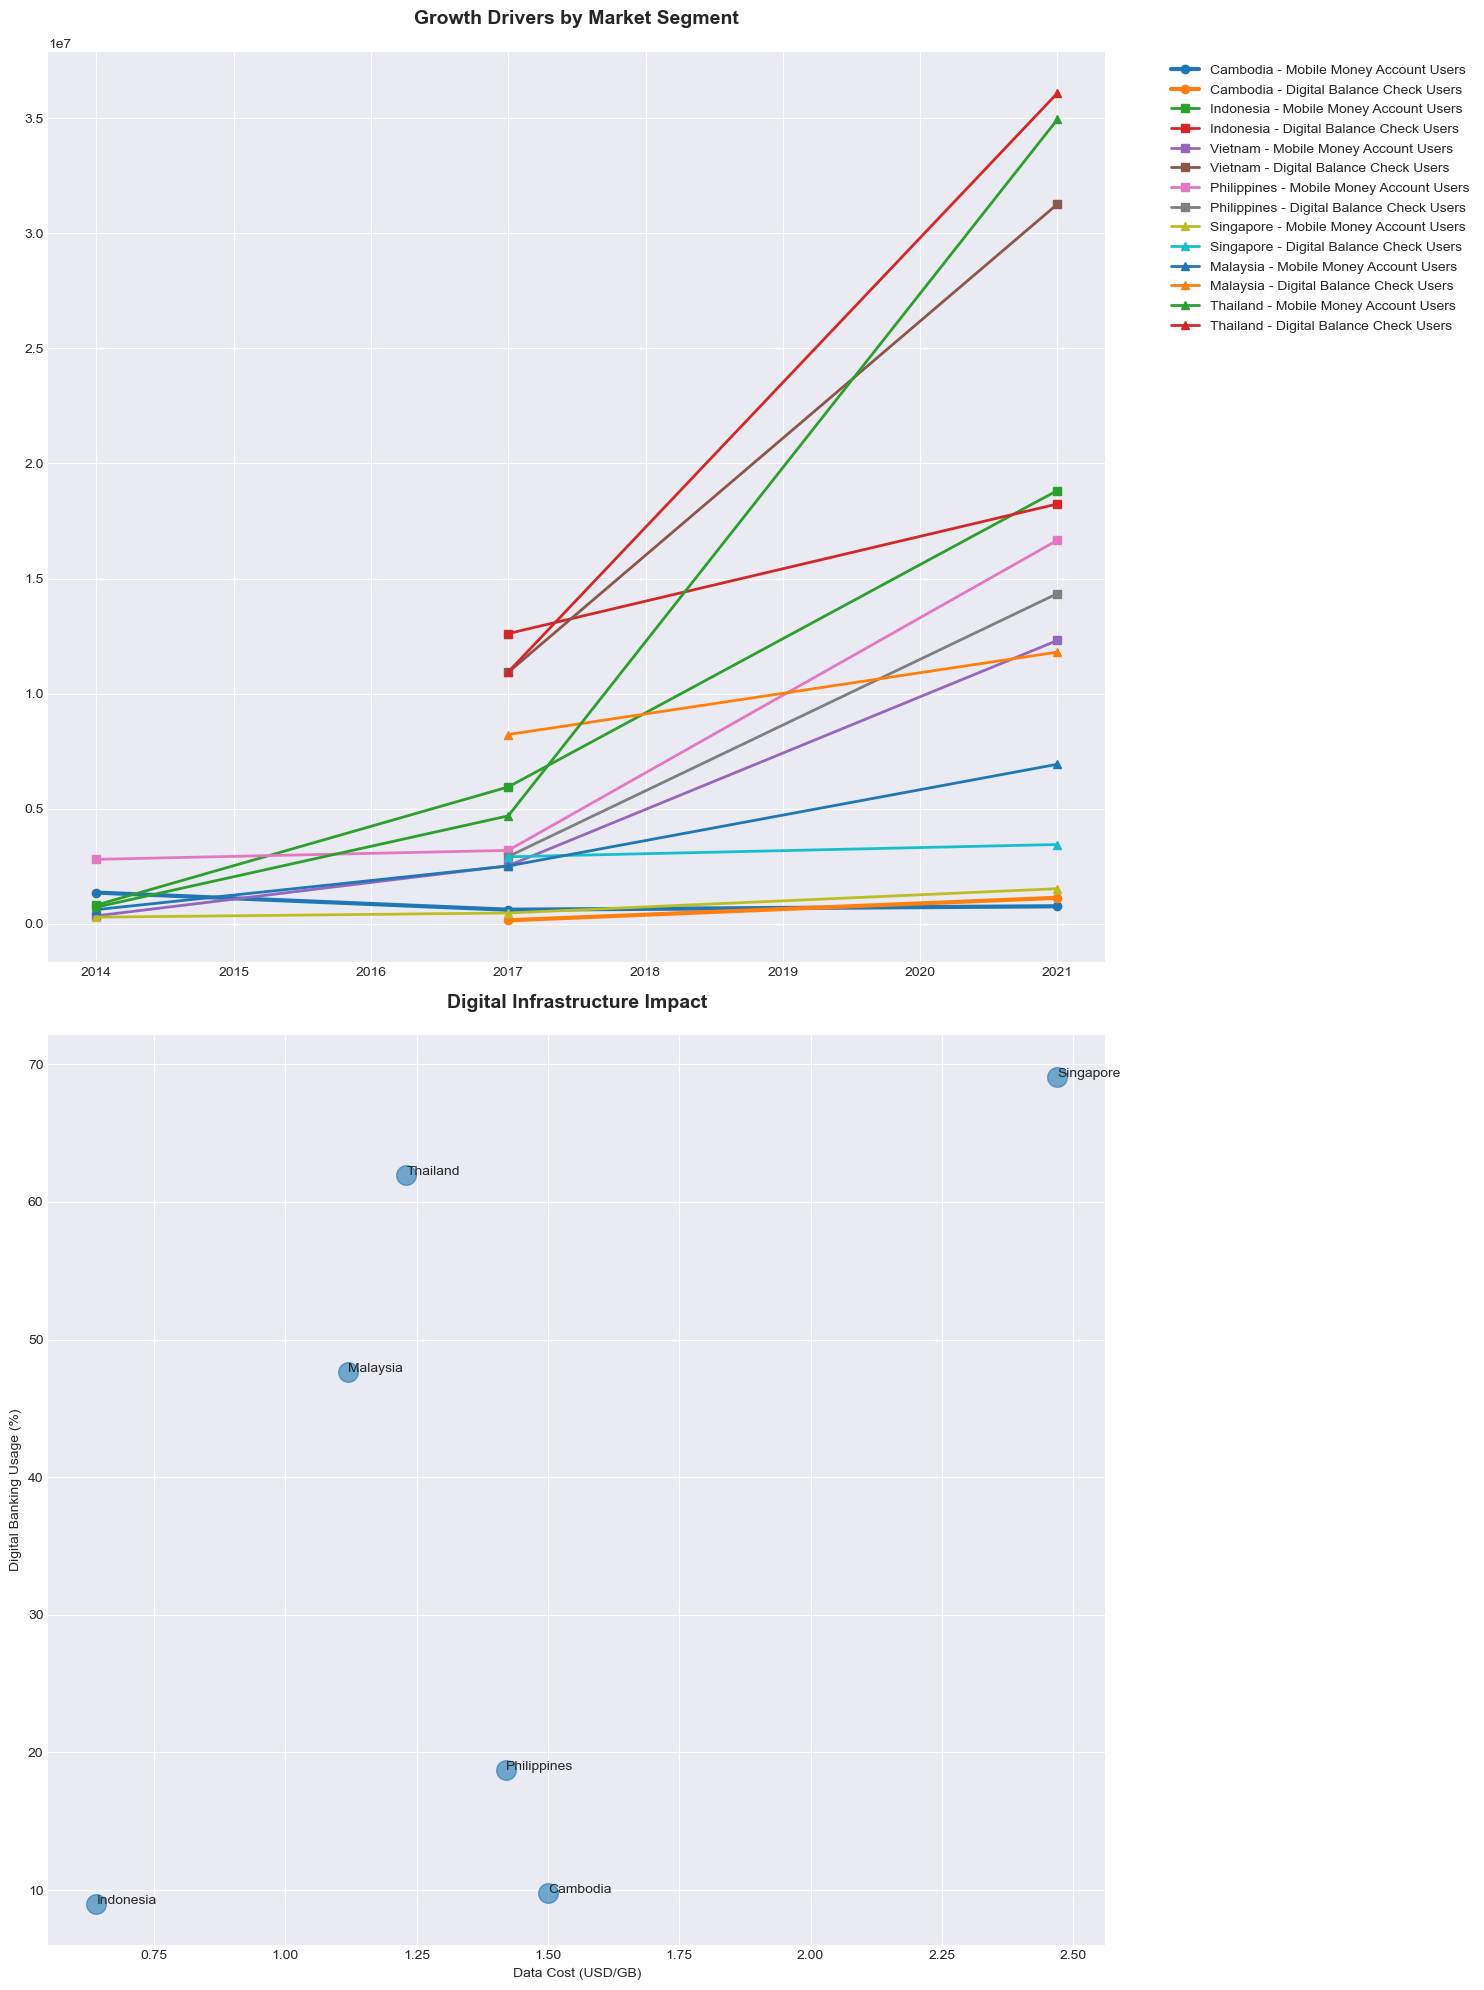

In [44]:
# Create multi-factor analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Plot 1: Growth Drivers Analysis
years = [2011, 2014, 2017, 2021]
metrics = ['Mobile Money Account Users', 'Digital Balance Check Users']

# High-growth markets
for country in ['Cambodia']:
    for metric in metrics:
        data = mobile_banking_numbers.loc[country][metric]
        ax1.plot(years, data, marker='o', linewidth=3, label=f'{country} - {metric}')

# Dynamic middle-tier
for country in ['Indonesia', 'Vietnam', 'Philippines']:
    for metric in metrics:
        data = mobile_banking_numbers.loc[country][metric]
        ax1.plot(years, data, marker='s', linewidth=2, label=f'{country} - {metric}')

# Mature markets
for country in ['Singapore', 'Malaysia', 'Thailand']:
    for metric in metrics:
        data = mobile_banking_numbers.loc[country][metric]
        ax1.plot(years, data, marker='^', linewidth=2, label=f'{country} - {metric}')

ax1.set_title('Growth Drivers by Market Segment', pad=20, fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1))

# Plot 2: Digital Infrastructure Development
data_2021 = mobile_banking_numbers.xs(2021, level='Year')
ax2.scatter(data_2021['Avg Price of 1GB (USD)'], 
           data_2021['Digital Balance Check Users']/data_2021['Adult populaiton']*100,
           s=200, alpha=0.6)

for idx, country in enumerate(data_2021.index):
    ax2.annotate(country, 
                (data_2021['Avg Price of 1GB (USD)'].iloc[idx], 
                 data_2021['Digital Balance Check Users'].iloc[idx]/data_2021['Adult populaiton'].iloc[idx]*100))

ax2.set_xlabel('Data Cost (USD/GB)')
ax2.set_ylabel('Digital Banking Usage (%)')
ax2.set_title('Digital Infrastructure Impact', pad=20, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

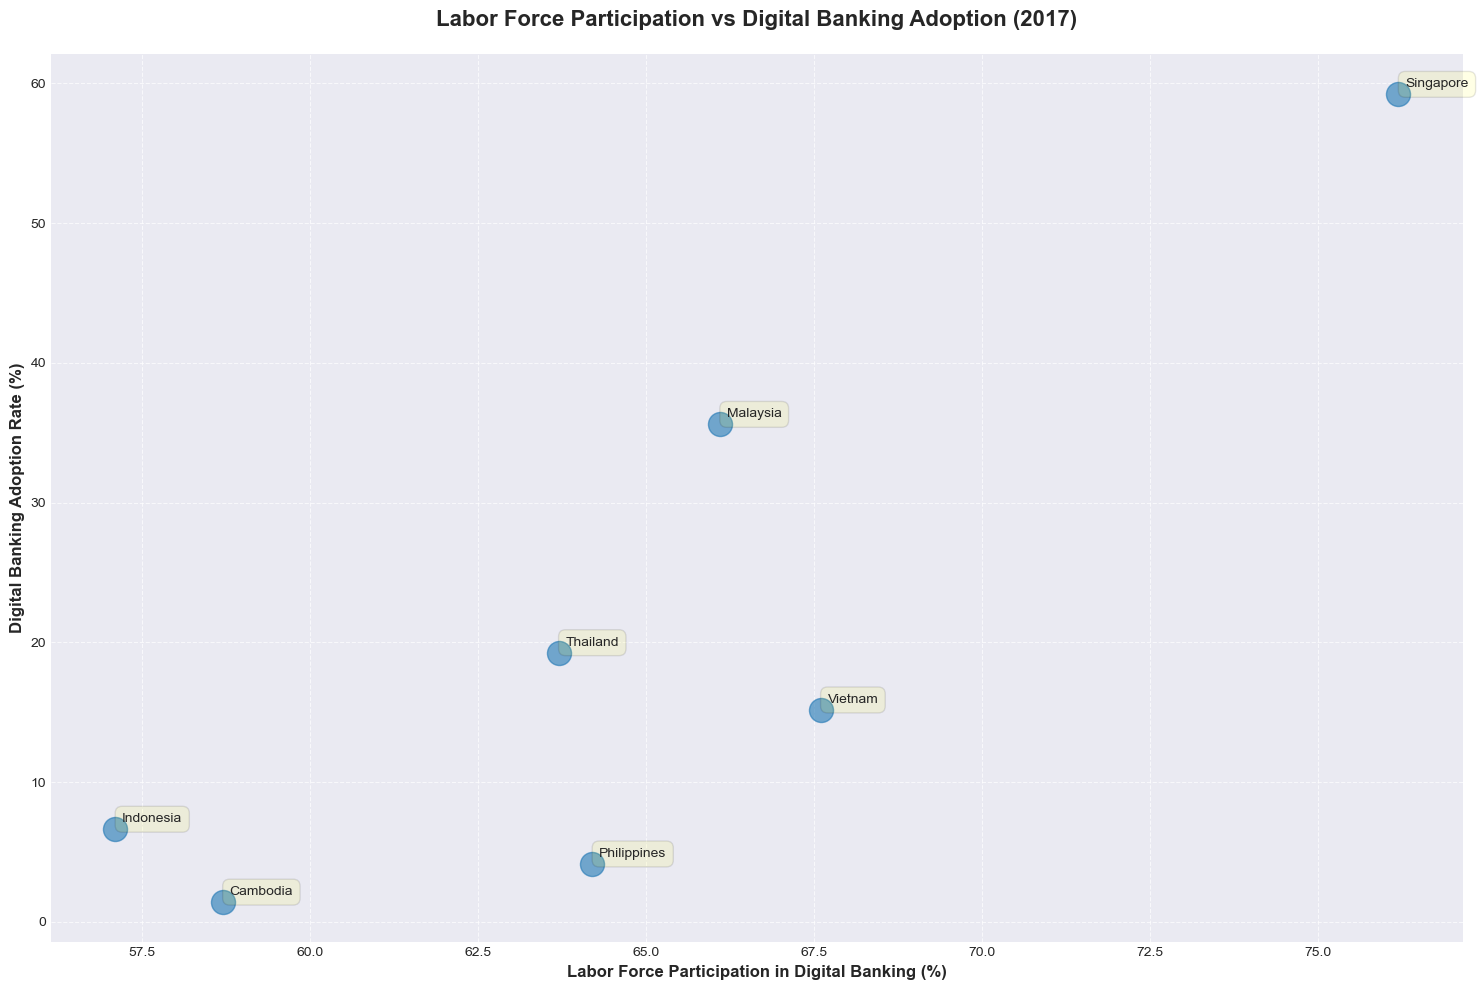


Labor Force Participation in Digital Banking (2017):
Cambodia: 58.7% in labor force
Indonesia: 57.1% in labor force
Malaysia: 66.1% in labor force
Philippines: 64.2% in labor force
Singapore: 76.2% in labor force
Thailand: 63.7% in labor force
Vietnam: 67.6% in labor force


In [45]:
# Set up visualization
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-darkgrid')

# Get 2017 data
data_2017 = mobile_banking_numbers.xs(2017, level='Year')

# Calculate labor force participation rates
labor_in = data_2017['Digital Users In Labor Force']
labor_out = data_2017['Digital Users Outside Labor Force']
total_users = labor_in + labor_out
labor_participation_rate = (labor_in / total_users * 100).round(1)

# Create scatter plot
plt.scatter(labor_participation_rate, 
           data_2017['Digital Balance Check Users']/data_2017['Adult populaiton']*100,
           s=300, alpha=0.6)

# Add country labels
for idx, country in enumerate(data_2017.index):
    plt.annotate(country, 
                (labor_participation_rate.iloc[idx], 
                 data_2017['Digital Balance Check Users'].iloc[idx]/data_2017['Adult populaiton'].iloc[idx]*100),
                xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1))

plt.xlabel('Labor Force Participation in Digital Banking (%)', fontsize=12, fontweight='bold')
plt.ylabel('Digital Banking Adoption Rate (%)', fontsize=12, fontweight='bold')
plt.title('Labor Force Participation vs Digital Banking Adoption (2017)', 
         pad=20, fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print labor force participation statistics
print("\nLabor Force Participation in Digital Banking (2017):")
for country in data_2017.index:
    print(f"{country}: {labor_participation_rate[country]:.1f}% in labor force")

In [47]:
# Display column names
print("Available columns in 2017 data:")
print(data_2017.columns.tolist())

Available columns in 2017 data:
['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Mobile Money Account Users', 'Digital Account Access Users', 'Young Digital Users (15-24)', 'Adult Digital Users (25+)', 'Digital Users with Primary Education', 'Digital Users with Secondary Education', 'Digital Users from Lower Income', 'Digital Users from Higher Income', 'Rural Digital Users', 'Urban Digital Users', 'Digital Users Outside Labor Force', 'Digital Users In Labor Force', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)']


<Figure size 1500x1000 with 0 Axes>

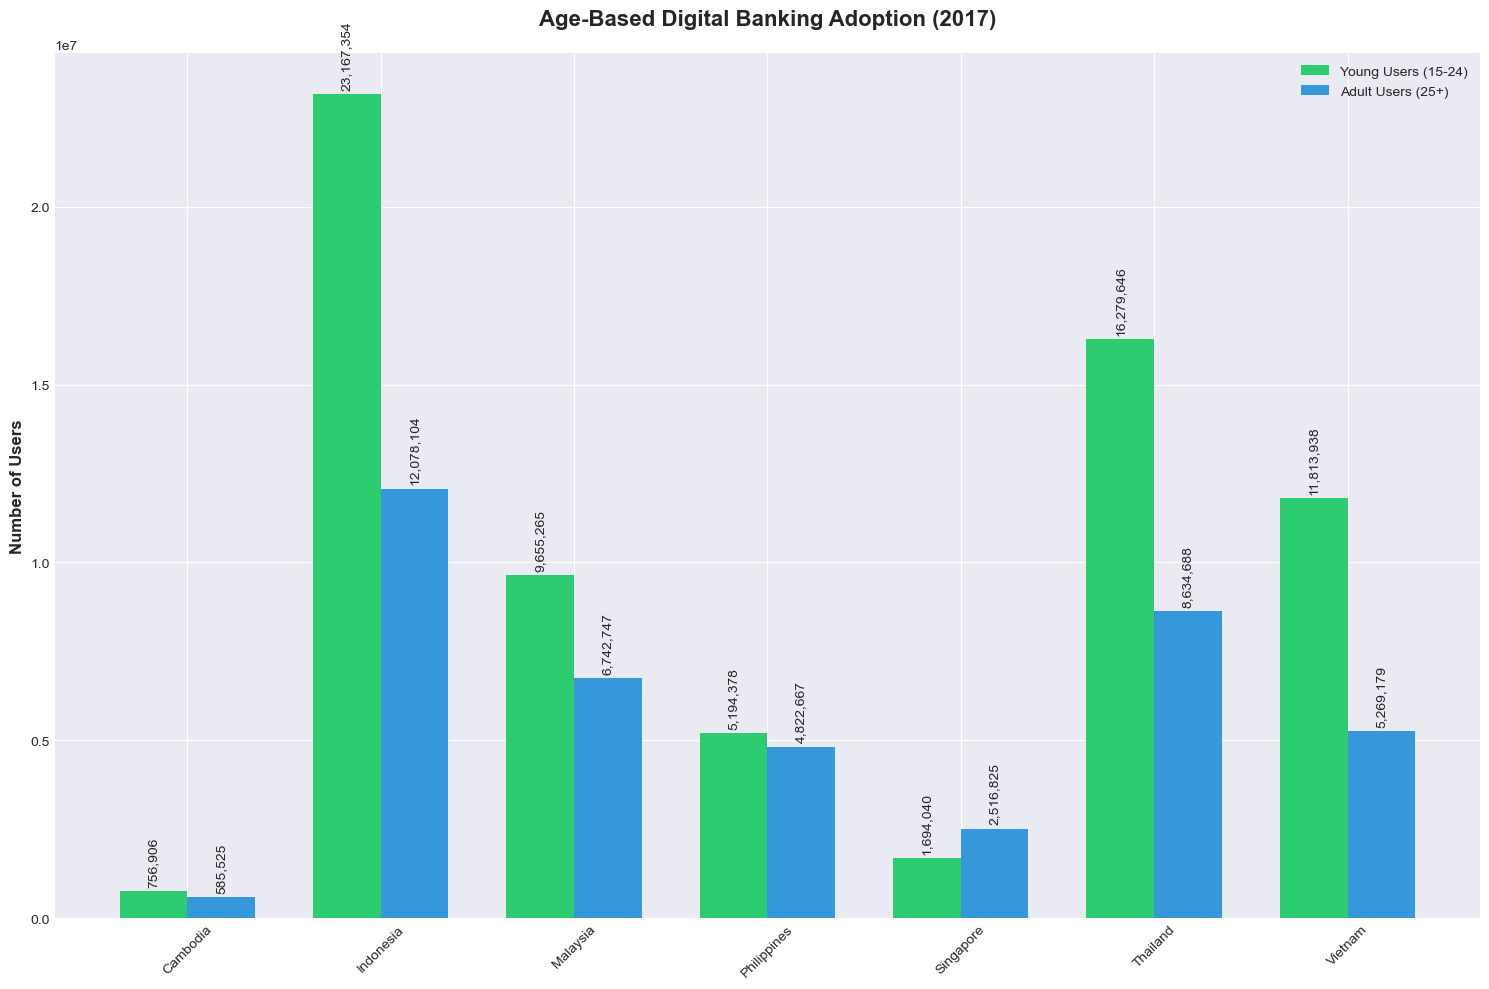

In [50]:
# Set up visualization
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-darkgrid')

# Get 2017 data for age-based analysis
data_2017 = mobile_banking_numbers.xs(2017, level='Year')

# Calculate adoption rates by age group
young_users = data_2017['Young Digital Users (15-24)']
adult_users = data_2017['Adult Digital Users (25+)']

# Create grouped bar plot
x = np.arange(len(data_2017.index))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, young_users, width, label='Young Users (15-24)', color='#2ecc71')
rects2 = ax.bar(x + width/2, adult_users, width, label='Adult Users (25+)', color='#3498db')

# Add labels and styling
ax.set_ylabel('Number of Users', fontsize=12, fontweight='bold')
ax.set_title('Age-Based Digital Banking Adoption (2017)', pad=20, fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(data_2017.index, rotation=45)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.0f}',
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

In [52]:
# Print raw numbers for Singapore
print("Singapore Digital Banking Users (2017):")
print(f"Young Users (15-24): {data_2017.loc['Singapore', 'Young Digital Users (15-24)']:,.0f}")
print(f"Adult Users (25+): {data_2017.loc['Singapore', 'Adult Digital Users (25+)']:,.0f}")

# Calculate the ratio both ways to verify
young_to_adult = data_2017.loc['Singapore', 'Young Digital Users (15-24)'] / data_2017.loc['Singapore', 'Adult Digital Users (25+)']
adult_to_young = data_2017.loc['Singapore', 'Adult Digital Users (25+)'] / data_2017.loc['Singapore', 'Young Digital Users (15-24)']

print("\nRatios:")
print(f"Young-to-Adult Ratio: {young_to_adult:.2f}")
print(f"Adult-to-Young Ratio: {adult_to_young:.2f}")

Singapore Digital Banking Users (2017):
Young Users (15-24): 1,694,040
Adult Users (25+): 2,516,825

Ratios:
Young-to-Adult Ratio: 0.67
Adult-to-Young Ratio: 1.49


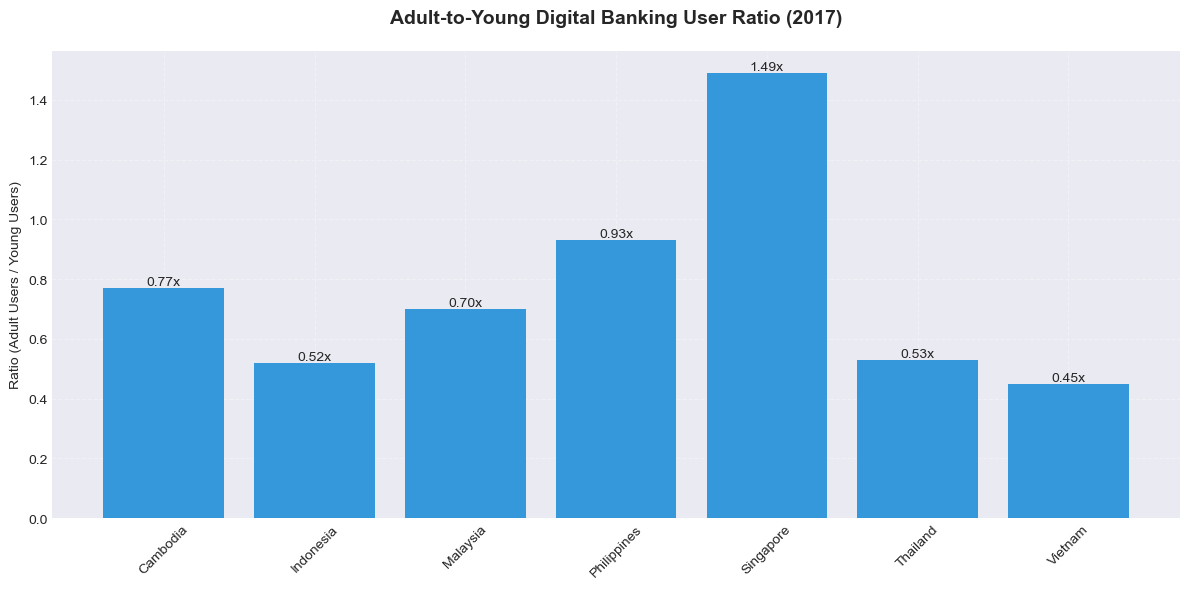


Adult-to-Young Digital Banking User Ratios (2017):
Cambodia: 0.77x ratio of adult to young users
Indonesia: 0.52x ratio of adult to young users
Malaysia: 0.70x ratio of adult to young users
Philippines: 0.93x ratio of adult to young users
Singapore: 1.49x ratio of adult to young users
Thailand: 0.53x ratio of adult to young users
Vietnam: 0.45x ratio of adult to young users


In [53]:
# Calculate adult-to-young ratios (this time correctly)
adult_young_ratio = (data_2017['Adult Digital Users (25+)'] / 
                    data_2017['Young Digital Users (15-24)']).round(2)

# Create visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(data_2017.index, adult_young_ratio, color='#3498db')
plt.title('Adult-to-Young Digital Banking User Ratio (2017)', 
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Ratio (Adult Users / Young Users)')
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}x',
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nAdult-to-Young Digital Banking User Ratios (2017):")
for country in data_2017.index:
    print(f"{country}: {adult_young_ratio[country]:.2f}x ratio of adult to young users")

In [58]:
# Display unique years in our dataset
print("Available years in dataset:")
print(mobile_banking_numbers.index.get_level_values('Year').unique())

# Show data structure
print("\nDataset structure:")
print(mobile_banking_numbers.head())

Available years in dataset:
Index([2011, 2014, 2017, 2021], dtype='int64', name='Year')

Dataset structure:
                   Adult populaiton  Total Account Holders  \
Country name Year                                            
Cambodia     2011         9542433.0               349226.0   
             2014        10201258.0              2261136.0   
             2017        10817360.0              2344315.0   
             2021        11548637.0              3856666.0   
Indonesia    2011       172118016.0             33704135.0   

                   Financial Institution Account Holders  \
Country name Year                                          
Cambodia     2011                               349226.0   
             2014                              1280920.0   
             2017                              1925725.0   
             2021                              3764467.0   
Indonesia    2011                             33704135.0   

                   Mobile Money Acco

<Figure size 1500x800 with 0 Axes>

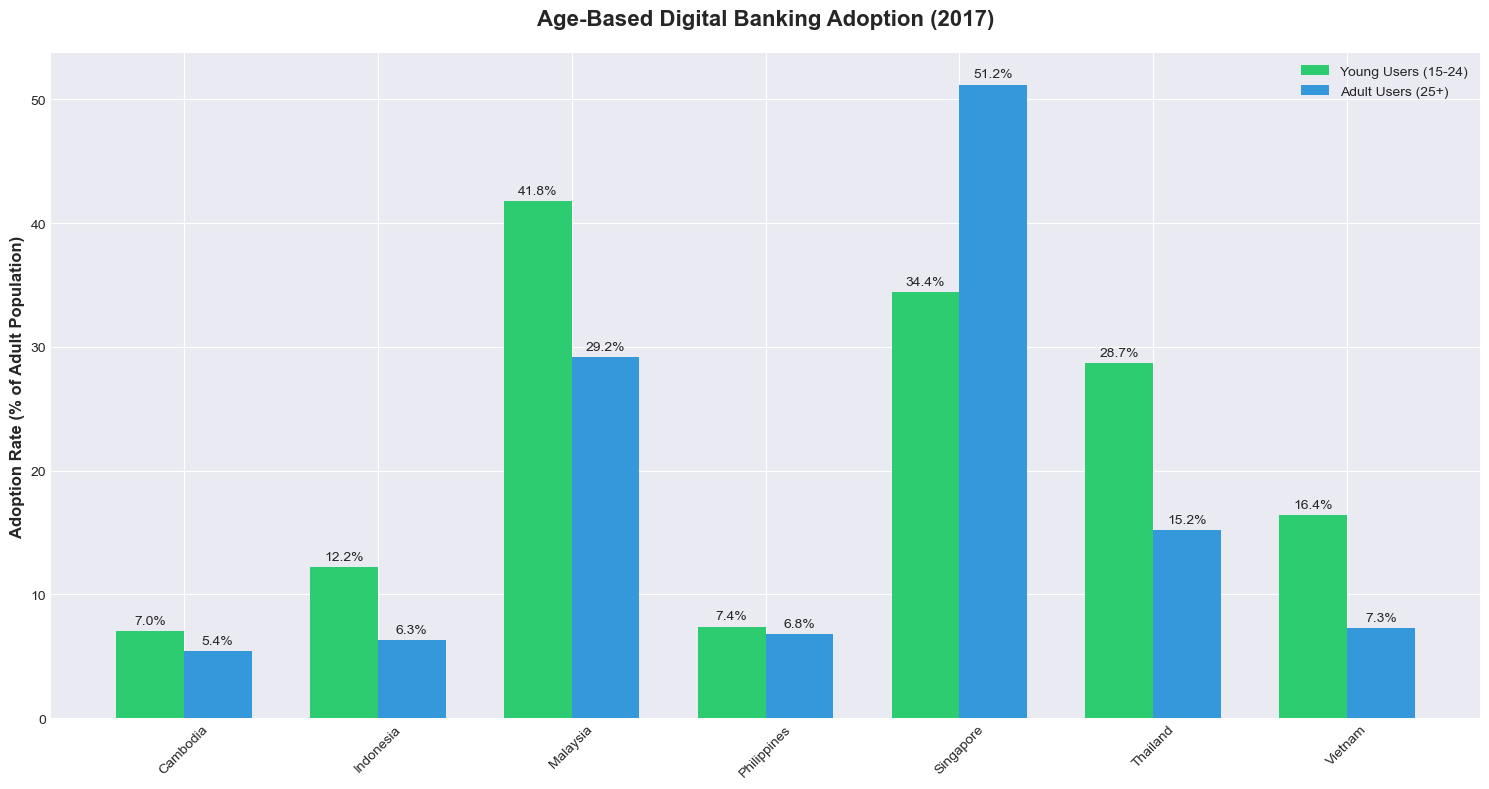

In [59]:
# Create bar plot for 2017 age comparison
plt.figure(figsize=(15, 8))
data_2017 = mobile_banking_numbers.xs(2017, level='Year')

# Calculate rates for 2017
young_rate = (data_2017['Young Digital Users (15-24)'] / data_2017['Adult populaiton'] * 100).round(1)
adult_rate = (data_2017['Adult Digital Users (25+)'] / data_2017['Adult populaiton'] * 100).round(1)

x = np.arange(len(data_2017.index))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, young_rate, width, label='Young Users (15-24)', color='#2ecc71')
rects2 = ax.bar(x + width/2, adult_rate, width, label='Adult Users (25+)', color='#3498db')

ax.set_ylabel('Adoption Rate (% of Adult Population)', fontsize=12, fontweight='bold')
ax.set_title('Age-Based Digital Banking Adoption (2017)', pad=20, fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(data_2017.index, rotation=45)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}%',
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

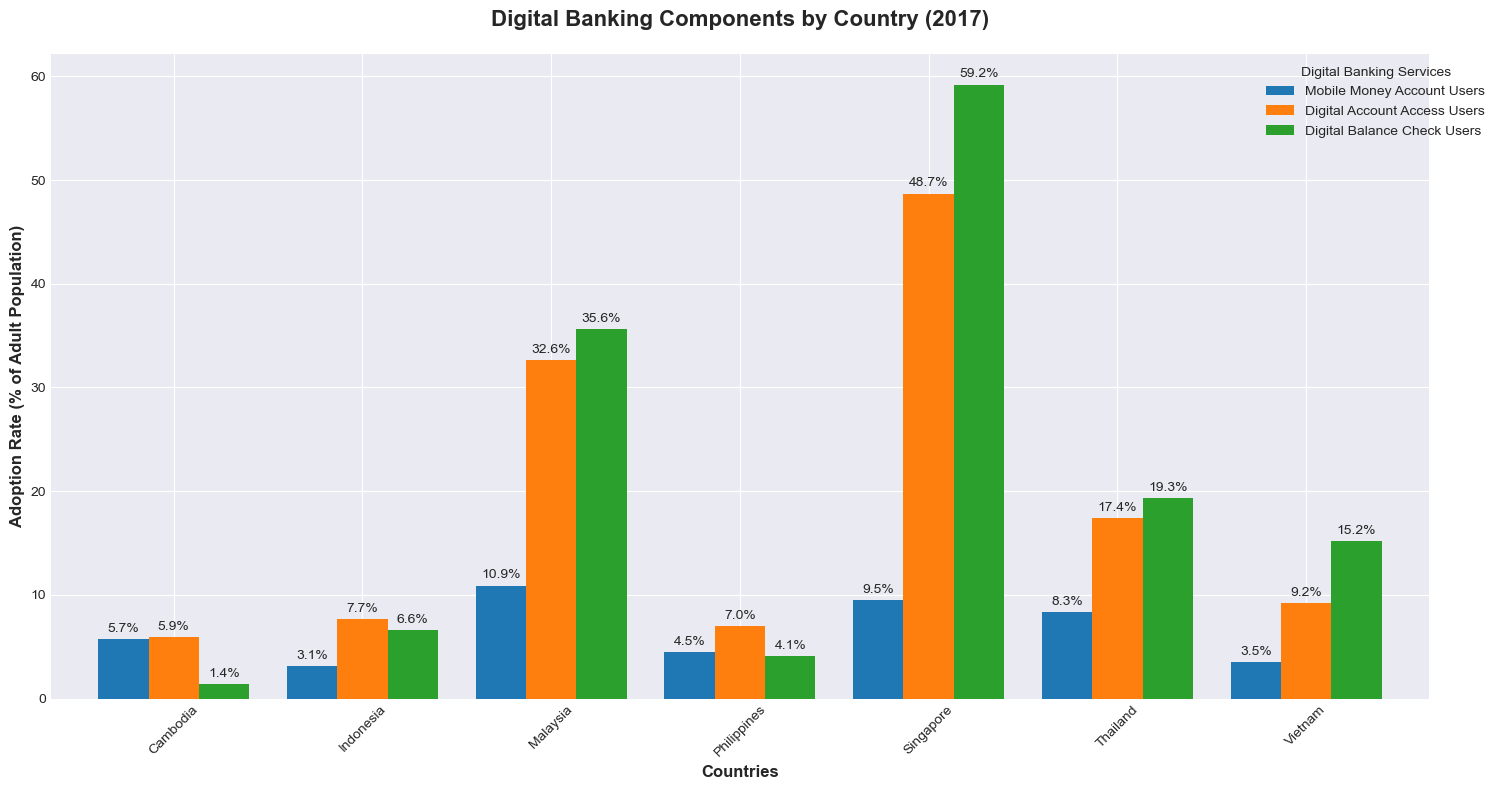

In [60]:
# Create multi-component comparison for 2017
plt.figure(figsize=(15, 10))
data_2017 = mobile_banking_numbers.xs(2017, level='Year')

# Select key digital banking components
components = ['Mobile Money Account Users', 'Digital Account Access Users', 'Digital Balance Check Users']

# Calculate adoption rates for each component
adoption_rates = pd.DataFrame()
for component in components:
    adoption_rates[component] = (data_2017[component] / data_2017['Adult populaiton'] * 100).round(1)

# Create grouped bar plot
ax = adoption_rates.plot(kind='bar', width=0.8, figsize=(15, 8))
plt.title('Digital Banking Components by Country (2017)', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Adoption Rate (% of Adult Population)', fontsize=12, fontweight='bold')
plt.legend(title='Digital Banking Services', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
plt.tight_layout()
plt.show()

In [61]:
# Select features for model
features = [
    'Young Digital Users (15-24)',
    'Adult Digital Users (25+)',
    'Digital Users with Primary Education',
    'Digital Users with Secondary Education',
    'Digital Users from Lower Income',
    'Digital Users from Higher Income',
    'Digital Users In Labor Force',
    'Digital Balance Check Users',
    'Digital Account Access Users',
    'Mobile Money Account Users'
]

# Create feature matrix
X = mobile_banking_numbers[features]
y = mobile_banking_numbers['Total Account Holders']

print("Selected Features Shape:", X.shape)
print("\nFeature List:")
for feature in features:
    print(f"- {feature}")

Selected Features Shape: (28, 10)

Feature List:
- Young Digital Users (15-24)
- Adult Digital Users (25+)
- Digital Users with Primary Education
- Digital Users with Secondary Education
- Digital Users from Lower Income
- Digital Users from Higher Income
- Digital Users In Labor Force
- Digital Balance Check Users
- Digital Account Access Users
- Mobile Money Account Users


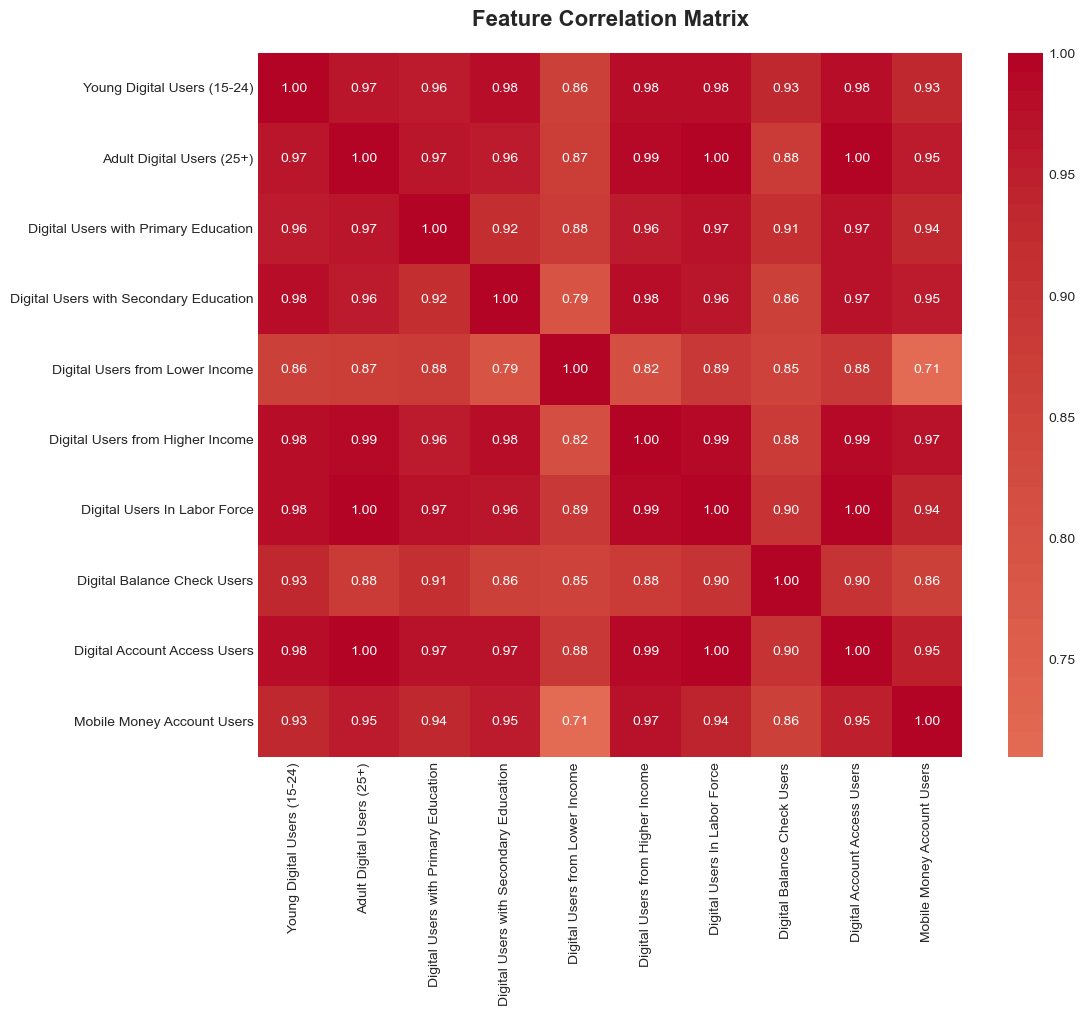


Highly correlated feature pairs:
Adult Digital Users (25+) -- Young Digital Users (15-24): 0.97
Digital Users with Primary Education -- Young Digital Users (15-24): 0.96
Digital Users with Primary Education -- Adult Digital Users (25+): 0.97
Digital Users with Secondary Education -- Young Digital Users (15-24): 0.98
Digital Users with Secondary Education -- Adult Digital Users (25+): 0.96
Digital Users with Secondary Education -- Digital Users with Primary Education: 0.92
Digital Users from Lower Income -- Young Digital Users (15-24): 0.86
Digital Users from Lower Income -- Adult Digital Users (25+): 0.87
Digital Users from Lower Income -- Digital Users with Primary Education: 0.88
Digital Users from Higher Income -- Young Digital Users (15-24): 0.98
Digital Users from Higher Income -- Adult Digital Users (25+): 0.99
Digital Users from Higher Income -- Digital Users with Primary Education: 0.96
Digital Users from Higher Income -- Digital Users with Secondary Education: 0.98
Digital Us

In [62]:
# Create correlation matrix
corr_matrix = X.corr()

# Create heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Feature Correlation Matrix', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print highly correlated feature pairs (correlation > 0.8)
print("\nHighly correlated feature pairs:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(f"{corr_matrix.columns[i]} -- {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")

In [63]:
# Read the DatabankWide Excel file
raw_data = pd.read_excel('DatabankWide.xlsx')

# Display available columns
print("Available columns in DatabankWide dataset:")
print(raw_data.columns.tolist())

Available columns in DatabankWide dataset:
['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)', 'First financial institution ever account was opened to receive money from the government (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)', 'Paid off all credit card balances in full by their due date (% age 15+)', 'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a debit card in-store (% age 15+)', 'Used a debit card: i

In [64]:
# Import and examine DatabankWide data
databank = pd.read_excel('DatabankWide.xlsx')

# Display first few rows and column names
print("DatabankWide Dataset Overview:")
print("\nColumns available:")
print(databank.columns.tolist())

print("\nShape of dataset:", databank.shape)
print("\nFirst few rows:")
print(databank.head())

DatabankWide Dataset Overview:

Columns available:
['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)', 'First financial institution ever account was opened to receive money from the government (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)', 'Paid off all credit card balances in full by their due date (% age 15+)', 'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a debit card in-store (% age 15+)', 'Used a debit

In [66]:
new_features = [
    'Used checks to make payments (% age 15+)',
    'Has access to the internet (% age 15+)',
    'Own a mobile phone (% age 15+)',
    'Made a digital in-store merchant payment (age 15+)',
    'Made a digital online merchant payment for an online purchase (% age 15+)',
    'Made a utility payment: using a mobile phone (% age 15+)',
    'Store money using a mobile money account (% age 15+)',
    'Borrowed any money using a mobile money account (% age 15+)'
]

# Add these columns to our existing dataframe
mobile_banking_df = mobile_banking_df.merge(
    databank[['Country name', 'Year'] + new_features],
    on=['Country name', 'Year'],
    how='left'
)

In [70]:
# Set data cost to NaN for all years except 2021
mobile_banking_df.loc[mobile_banking_df['Year'] != 2021, 'Avg Price of 1GB (USD)'] = np.nan

In [71]:
# Display data cost values by year
print("1GB Data Costs by Year:")
print(mobile_banking_df.groupby('Year')['Avg Price of 1GB (USD)'].describe())

# Show 2021 values specifically
print("\n2021 Data Costs by Country:")
print(mobile_banking_df[mobile_banking_df['Year'] == 2021][['Country name', 'Avg Price of 1GB (USD)']])

# Create correlation matrix for 2021 data only
data_2021 = mobile_banking_df[mobile_banking_df['Year'] == 2021]
corr_matrix = data_2021.corr()

# Display correlations with data cost
print("\nCorrelations with 1GB Data Cost (2021):")
print(corr_matrix['Avg Price of 1GB (USD)'].sort_values(ascending=False))

1GB Data Costs by Year:
      count      mean       std   min     25%    50%   75%   max
Year                                                            
2011    0.0       NaN       NaN   NaN     NaN    NaN   NaN   NaN
2014    0.0       NaN       NaN   NaN     NaN    NaN   NaN   NaN
2017    0.0       NaN       NaN   NaN     NaN    NaN   NaN   NaN
2021    6.0  1.396667  0.606652  0.64  1.1475  1.325  1.48  2.47
2022    0.0       NaN       NaN   NaN     NaN    NaN   NaN   NaN

2021 Data Costs by Country:
   Country name  Avg Price of 1GB (USD)
3      Cambodia                    1.50
7     Indonesia                    0.64
11     Malaysia                    1.12
15  Philippines                    1.42
19    Singapore                    2.47
23     Thailand                    1.23


ValueError: could not convert string to float: 'Cambodia'

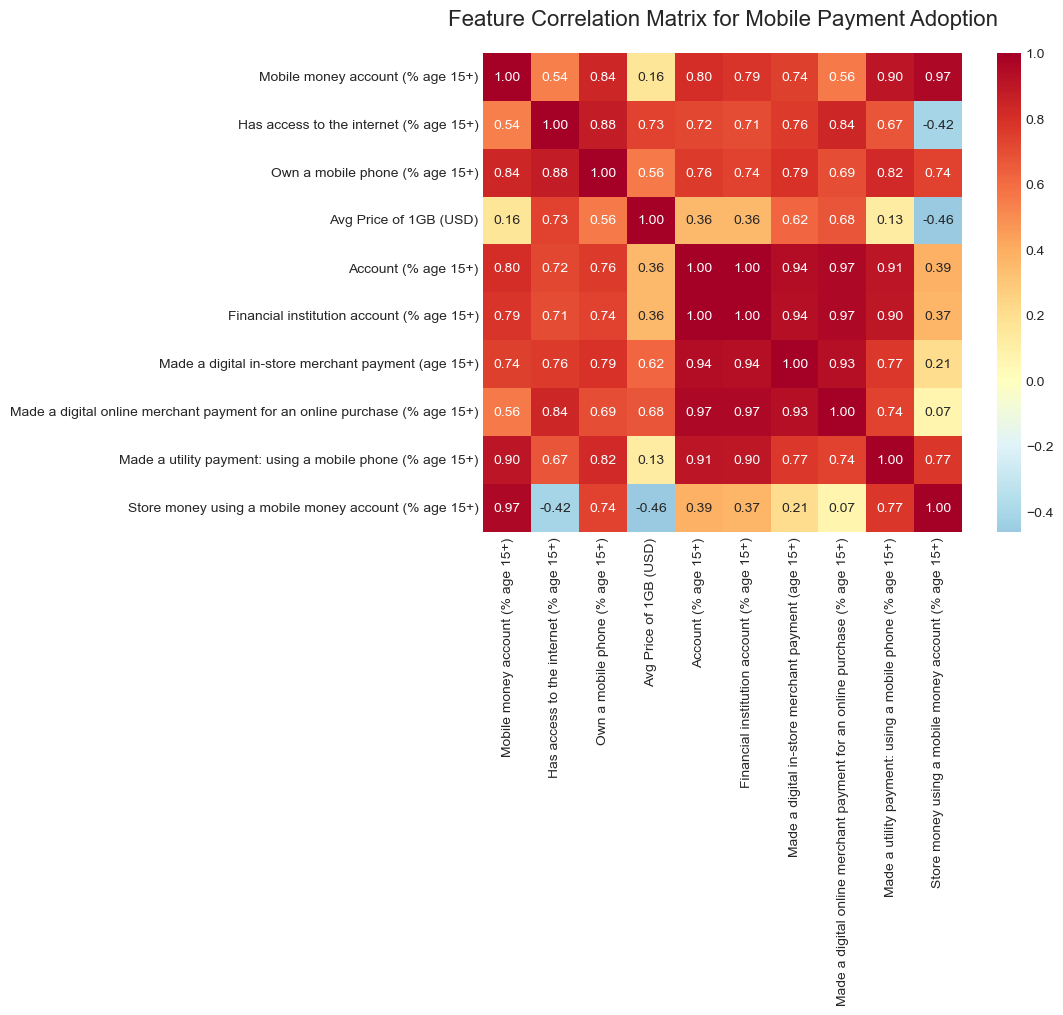

In [73]:
# Select relevant features for mobile payment adoption prediction
features = [
    'Mobile money account (% age 15+)',  # target variable
    'Has access to the internet (% age 15+)',
    'Own a mobile phone (% age 15+)', 
    'Avg Price of 1GB (USD)',
    'Account (% age 15+)',
    'Financial institution account (% age 15+)',
    'Made a digital in-store merchant payment (age 15+)',
    'Made a digital online merchant payment for an online purchase (% age 15+)',
    'Made a utility payment: using a mobile phone (% age 15+)',
    'Store money using a mobile money account (% age 15+)'
]

# Create correlation matrix
data_2021 = mobile_banking_df[mobile_banking_df['Year'] == 2021]
corr_matrix = data_2021[features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Feature Correlation Matrix for Mobile Payment Adoption', pad=20, fontsize=16)
plt.tight_layout()
plt.show()

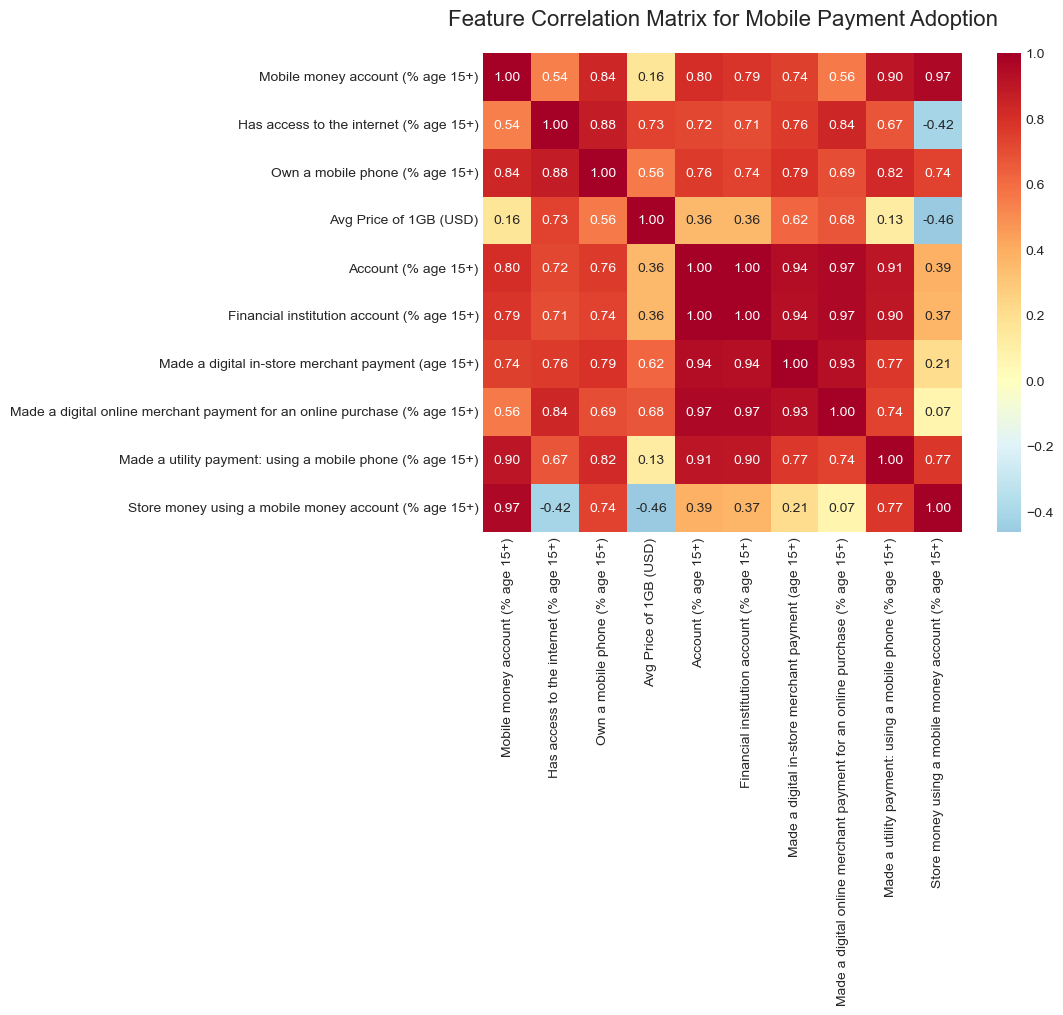


Correlations with Mobile Money Account adoption:
Mobile money account (% age 15+): 1.000
Store money using a mobile money account (% age 15+): 0.966
Made a utility payment: using a mobile phone (% age 15+): 0.903
Own a mobile phone (% age 15+): 0.839
Account (% age 15+): 0.804
Financial institution account (% age 15+): 0.786
Made a digital in-store merchant payment (age 15+): 0.744
Made a digital online merchant payment for an online purchase (% age 15+): 0.556
Has access to the internet (% age 15+): 0.541
Avg Price of 1GB (USD): 0.159

High correlations between features (>0.7):
Own a mobile phone (% age 15+) -- Mobile money account (% age 15+): 0.839
Own a mobile phone (% age 15+) -- Has access to the internet (% age 15+): 0.876
Avg Price of 1GB (USD) -- Has access to the internet (% age 15+): 0.733
Account (% age 15+) -- Mobile money account (% age 15+): 0.804
Account (% age 15+) -- Has access to the internet (% age 15+): 0.716
Account (% age 15+) -- Own a mobile phone (% age 15+): 

In [74]:
# Create correlation matrix and heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Feature Correlation Matrix for Mobile Payment Adoption', pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# Print correlation values with target variable
print("\nCorrelations with Mobile Money Account adoption:")
correlations = corr_matrix['Mobile money account (% age 15+)'].sort_values(ascending=False)
for feature, value in correlations.items():
    print(f"{feature}: {value:.3f}")

# Print high correlations between features (>0.7)
print("\nHigh correlations between features (>0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"{corr_matrix.columns[i]} -- {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

In [75]:
# Get list of percentage columns (columns with % in their name)
percentage_columns = [col for col in mobile_banking_df.columns if '%' in col]

# Convert percentages to absolute numbers
for col in percentage_columns:
    mobile_banking_df[col] = mobile_banking_df[col] * mobile_banking_df['Adult populaiton']

# Verify the conversion
print("Sample of converted values:")
print(mobile_banking_df[['Country name', 'Year'] + percentage_columns].head())

Sample of converted values:
  Country name  Year  Account (% age 15+)  \
0     Cambodia  2011         3.492255e+05   
1     Cambodia  2014         2.261136e+06   
2     Cambodia  2017         2.344315e+06   
3     Cambodia  2021         3.856666e+06   
4    Indonesia  2011         3.370414e+07   

   Financial institution account (% age 15+)  \
0                               3.492255e+05   
1                               1.280920e+06   
2                               1.925725e+06   
3                               3.764467e+06   
4                               3.370414e+07   

   Mobile money account (% age 15+)  \
0                               NaN   
1                      1.356212e+06   
2                      6.122094e+05   
3                      7.620060e+05   
4                               NaN   

   Used a mobile phone or the internet to access an account (% age 15+)  \
0                                                NaN                      
1                          

In [76]:
# Display missing values count
print("Missing values before cleaning:")
print(mobile_banking_df[features + ['Mobile money account (% age 15+)']].isnull().sum())

# Fill NaN values with 0 since missing values likely indicate no adoption/usage
mobile_banking_clean = mobile_banking_df.fillna(0)

# Verify cleaning worked
print("\nMissing values after cleaning:")
print(mobile_banking_clean[features + ['Mobile money account (% age 15+)']].isnull().sum())

# Display cleaned data sample
print("\nSample of cleaned data:")
print(mobile_banking_clean[features + ['Mobile money account (% age 15+)']].head())

Missing values before cleaning:
Mobile money account (% age 15+)                                              7
Has access to the internet (% age 15+)                                       21
Own a mobile phone (% age 15+)                                               21
Avg Price of 1GB (USD)                                                       22
Account (% age 15+)                                                           0
Financial institution account (% age 15+)                                     0
Made a digital in-store merchant payment (age 15+)                           21
Made a digital online merchant payment for an online purchase (% age 15+)    18
Made a utility payment: using a mobile phone (% age 15+)                      7
Store money using a mobile money account (% age 15+)                         23
Mobile money account (% age 15+)                                              7
dtype: int64

Missing values after cleaning:
Mobile money account (% age 15+)           

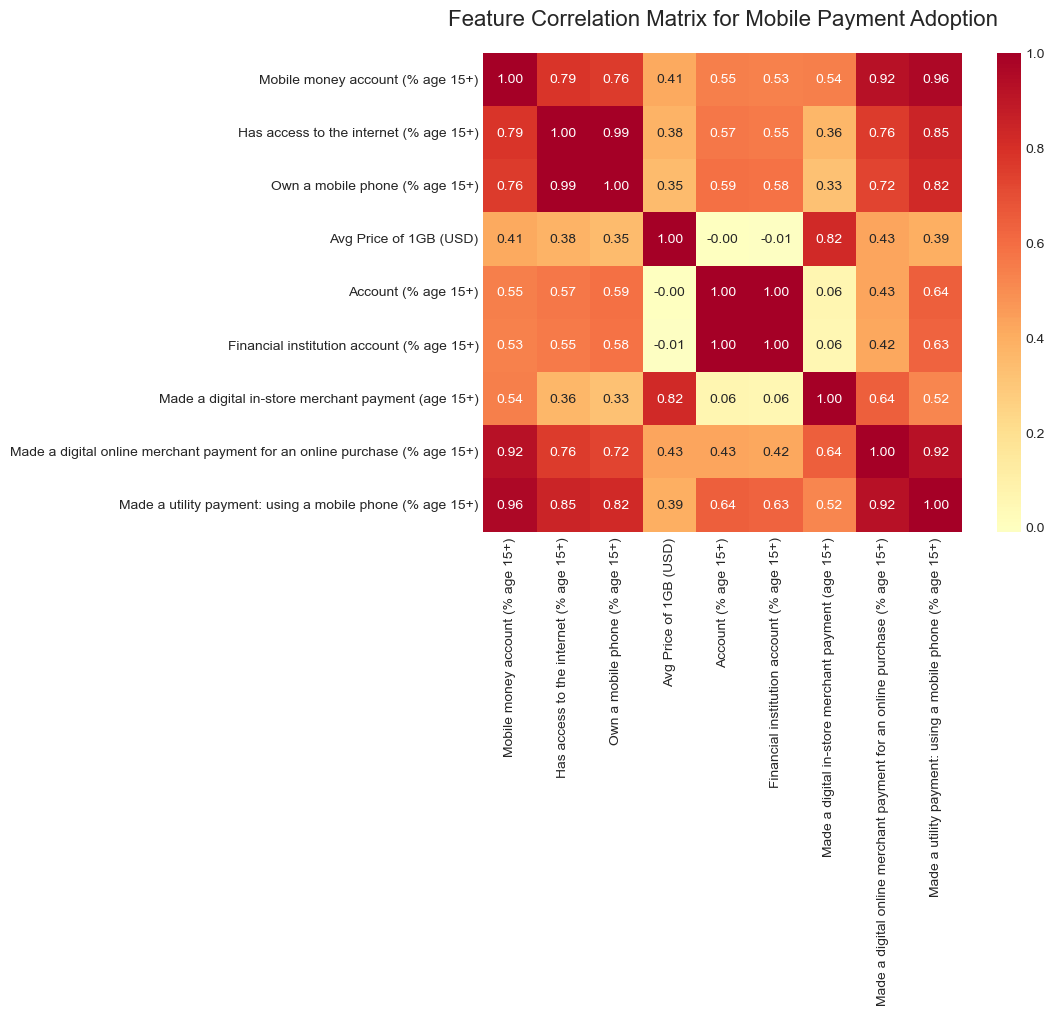


Correlations with Mobile Money Account adoption:
Mobile money account (% age 15+): 1.000
Made a utility payment: using a mobile phone (% age 15+): 0.963
Made a digital online merchant payment for an online purchase (% age 15+): 0.924
Has access to the internet (% age 15+): 0.786
Own a mobile phone (% age 15+): 0.762
Account (% age 15+): 0.545
Made a digital in-store merchant payment (age 15+): 0.542
Financial institution account (% age 15+): 0.534
Avg Price of 1GB (USD): 0.414


In [77]:
# Select relevant features for correlation analysis
features = [
    'Mobile money account (% age 15+)',  # target variable
    'Has access to the internet (% age 15+)',
    'Own a mobile phone (% age 15+)', 
    'Avg Price of 1GB (USD)',
    'Account (% age 15+)',
    'Financial institution account (% age 15+)',
    'Made a digital in-store merchant payment (age 15+)',
    'Made a digital online merchant payment for an online purchase (% age 15+)',
    'Made a utility payment: using a mobile phone (% age 15+)'
]

# Create correlation matrix with cleaned data
corr_matrix = mobile_banking_clean[features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Feature Correlation Matrix for Mobile Payment Adoption', pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# Print correlations with target variable
print("\nCorrelations with Mobile Money Account adoption:")
correlations = corr_matrix['Mobile money account (% age 15+)'].sort_values(ascending=False)
for feature, value in correlations.items():
    print(f"{feature}: {value:.3f}")

In [82]:
import wbdata
import datetime

# Define indicators
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'EN.POP.DNST': 'Population_Density',
    'SP.URB.TOTL.IN.ZS': 'Urban_Population_Pct',
    'NY.GNP.PCAP.CD': 'GNI_Per_Capita',
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
    'SE.ADT.LITR.ZS': 'Literacy_Rate',
    'IT.NET.BBND.P2': 'Broadband_Subscriptions',
    'IT.NET.SECR.P6': 'Secure_Internet_Servers',
    'SI.POV.NAHC': 'Poverty_Headcount',
    'BX.KLT.DINV.WD.GD.ZS': 'FDI_Inflows',
    'FS.AST.PRVT.GD.ZS': 'Domestic_Credit'
}

# Get data for our countries and years
countries = ['KHM', 'IDN', 'MYS', 'PHL', 'SGP', 'THA', 'VNM']
date = (datetime.datetime(2011, 1, 1), datetime.datetime(2021, 12, 31))

# Fetch data from World Bank
wb_data = wbdata.get_dataframe(indicators, country=countries, date=date)

# Clean and prepare data
wb_data = wb_data.reset_index()
wb_data['year'] = pd.DatetimeIndex(wb_data['date']).year

# Filter for only our years of interest
wb_data = wb_data[wb_data['year'].isin([2011, 2014, 2017, 2021])]

# Merge with our existing dataset
mobile_banking_clean = mobile_banking_clean.merge(
    wb_data,
    left_on=['Country name', 'Year'],
    right_on=['country', 'year'],
    how='left'
)

print("Dataset with World Bank indicators:")
print(mobile_banking_clean.head())

Dataset with World Bank indicators:
  Country name  Year  Adult populaiton  Account (% age 15+)  \
0     Cambodia  2011         9542433.0         3.492255e+05   
1     Cambodia  2014        10201258.0         2.261136e+06   
2     Cambodia  2017        10817360.0         2.344315e+06   
3     Cambodia  2021        11548637.0         3.856666e+06   
4    Indonesia  2011       172118016.0         3.370414e+07   

   Financial institution account (% age 15+)  \
0                               3.492255e+05   
1                               1.280920e+06   
2                               1.925725e+06   
3                               3.764467e+06   
4                               3.370414e+07   

   Mobile money account (% age 15+)  \
0                      0.000000e+00   
1                      1.356212e+06   
2                      6.122094e+05   
3                      7.620060e+05   
4                      0.000000e+00   

   Used a mobile phone or the internet to access an account (

In [83]:
# Reset index if it exists, then set Country name as index
mobile_banking_clean = mobile_banking_clean.set_index('Country name')

# Display the data
print("Dataset with World Bank indicators:")
print(mobile_banking_clean)

Dataset with World Bank indicators:
              Year  Adult populaiton  Account (% age 15+)  \
Country name                                                
Cambodia      2011         9542433.0         3.492255e+05   
Cambodia      2014        10201258.0         2.261136e+06   
Cambodia      2017        10817360.0         2.344315e+06   
Cambodia      2021        11548637.0         3.856666e+06   
Indonesia     2011       172118016.0         3.370414e+07   
Indonesia     2014       181204480.0         6.534050e+07   
Indonesia     2017       190327568.0         9.298920e+07   
Indonesia     2021       202582512.0         1.048472e+08   
Malaysia      2011        20320748.0         1.344701e+07   
Malaysia      2014        21767478.0         1.756083e+07   
Malaysia      2017        23100548.0         1.971487e+07   
Malaysia      2021        24776780.0         2.189645e+07   
Philippines   2011        62026176.0         1.647163e+07   
Philippines   2014        66269816.0         2.07

In [84]:
# First reset the index to modify the Year value
mobile_banking_clean = mobile_banking_clean.reset_index()
mobile_banking_clean.loc[mobile_banking_clean['Country name'] == 'Vietnam', 'Year'] = mobile_banking_clean.loc[mobile_banking_clean['Country name'] == 'Vietnam', 'Year'].replace(2022, 2021)

# Set the index back to Country name and Year
mobile_banking_clean = mobile_banking_clean.set_index(['Country name', 'Year'])

# Sort the index to ensure consistent ordering
mobile_banking_clean = mobile_banking_clean.sort_index()

print("Dataset with corrected years:")
print(mobile_banking_clean)

Dataset with corrected years:
                   Adult populaiton  Account (% age 15+)  \
Country name Year                                          
Cambodia     2011         9542433.0         3.492255e+05   
             2014        10201258.0         2.261136e+06   
             2017        10817360.0         2.344315e+06   
             2021        11548637.0         3.856666e+06   
Indonesia    2011       172118016.0         3.370414e+07   
             2014       181204480.0         6.534050e+07   
             2017       190327568.0         9.298920e+07   
             2021       202582512.0         1.048472e+08   
Malaysia     2011        20320748.0         1.344701e+07   
             2014        21767478.0         1.756083e+07   
             2017        23100548.0         1.971487e+07   
             2021        24776780.0         2.189645e+07   
Philippines  2011        62026176.0         1.647163e+07   
             2014        66269816.0         2.073306e+07   
          

In [85]:
# Display all columns in the dataset
print("All available columns in the dataset:")
print(mobile_banking_clean.columns.tolist())

All available columns in the dataset:
['Adult populaiton', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'Mobile money account (% age 15+)', 'Used a mobile phone or the internet to access an account (% age 15+)', 'Used a mobile phone or the internet to access an account, young (% ages 15-24)', 'Used a mobile phone or the internet to access an account, older (% age 25+)', 'Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)', 'Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)', 'Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)', 'Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)', 'Used a mobile phone or the internet to access an account, rural (% age 15+)', 'Used a mobile phone or the internet to access an account, urban (% age 15+)', 'Used a mobile phone or the internet to access an accoun

In [90]:
# Melt the year columns into a single Year column
year_cols = ['YR2011', 'YR2014', 'YR2017', 'YR2021']
new_wb_data = pd.melt(new_wb_data, 
                      id_vars=['economy', 'series', 'Country', 'Series', 'Country name'],
                      value_vars=year_cols,
                      var_name='Year',
                      value_name='Value')

# Clean up Year column by removing 'YR' prefix
new_wb_data['Year'] = new_wb_data['Year'].str.replace('YR', '').astype(int)

# Pivot the series to columns
new_wb_data = new_wb_data.pivot_table(index=['Country name', 'Year'], 
                                     columns='Series',
                                     values='Value')

# Rename columns to match our indicators
new_wb_data = new_wb_data.rename(columns=new_indicators)

# Merge with original dataset
mobile_banking_numbers = mobile_banking_numbers.merge(new_wb_data,
                                                    left_index=True,
                                                    right_index=True)

print("New columns added to dataset:")
print(list(new_indicators.values()))

New columns added to dataset:
['Mobile_Subscriptions', 'Digital_Payments', 'Internet_Users', 'Mobile_Coverage', 'Remittance_Inflows', 'Bank_Branches', 'ATMs', 'Financial_System_Deposits']


In [ ]:
# Full feature set including all available columns
features = [
    'Adult populaiton',
    'Account (% age 15+)',
    'Financial institution account (% age 15+)',
    'Mobile money account (% age 15+)',
    'Used a mobile phone or the internet to access an account (% age 15+)',
    'Used a mobile phone or the internet to access an account, young (% ages 15-24)',
    'Used a mobile phone or the internet to access an account, older (% age 25+)',
    'Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)',
    'Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)',
    'Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)',
    'Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)',
    'Used a mobile phone or the internet to access an account, rural (% age 15+)',
    'Used a mobile phone or the internet to access an account, urban (% age 15+)',
    'Used a mobile phone or the internet to access an account, out of labor force (% age 15+)',
    'Used a mobile phone or the internet to access an account, in labor force (% age 15+)',
    'Used a mobile phone or the internet to check account balance (% age 15+)',
    'Avg Price of 1GB (USD)',
    'Used checks to make payments (% age 15+)',
    'Has access to the internet (% age 15+)',
    'Own a mobile phone (% age 15+)',
    'Made a digital in-store merchant payment (age 15+)',
    'Made a digital online merchant payment for an online purchase (% age 15+)',
    'Made a utility payment: using a mobile phone (% age 15+)',
    'Store money using a mobile money account (% age 15+)',
    'Borrowed any money using a mobile money account (% age 15+)',
    'GDP',
    'Population_Density',
    'Urban_Population_Pct',
    'GNI_Per_Capita',
    'Unemployment_Rate',
    'Literacy_Rate',
    'Broadband_Subscriptions',
    'Secure_Internet_Servers',
    'Poverty_Headcount',
    'FDI_Inflows',
    'Domestic_Credit'
]

# Define target variable
y = mobile_banking_numbers['Mobile money account (% age 15+)']

# Create feature matrix excluding non-numeric columns and year
X = mobile_banking_numbers[features]

# Generate correlation matrix and heatmap
plt.figure(figsize=(30, 24))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Feature Correlation Matrix - Complete Dataset', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print highly correlated feature pairs (correlation < 0.9)
print("\nFeature correlations (|correlation| < 0.9):")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) < 0.9:
            print(f"{corr_matrix.columns[i]} -- {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")


In [91]:
# Create correlation matrix with all variables
corr_matrix = mobile_banking_numbers.corr()

# Get correlations with target variable
target_correlations = corr_matrix['Mobile money account (% age 15+)'].sort_values(ascending=False)

print("Correlations with Mobile Money Account Adoption:")
print(target_correlations)

# Visualize top correlations
plt.figure(figsize=(15, 10))
target_correlations.plot(kind='bar')
plt.title('Feature Correlations with Mobile Money Account Adoption', pad=20, fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create focused heatmap of top correlated features
top_features = target_correlations.head(15).index
plt.figure(figsize=(12, 10))
sns.heatmap(mobile_banking_numbers[top_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Top Features Correlation Heatmap', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

KeyError: 'Mobile money account (% age 15+)'

In [92]:
# Display all column names
print("Available columns in dataset:")
print(mobile_banking_numbers.columns.tolist())

Available columns in dataset:
['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Mobile Money Account Users', 'Digital Account Access Users', 'Young Digital Users (15-24)', 'Adult Digital Users (25+)', 'Digital Users with Primary Education', 'Digital Users with Secondary Education', 'Digital Users from Lower Income', 'Digital Users from Higher Income', 'Rural Digital Users', 'Urban Digital Users', 'Digital Users Outside Labor Force', 'Digital Users In Labor Force', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Bank capital to assets ratio (%)', 'Commercial bank branches (per 100,000 adults)', 'Individuals using the Internet (% of population)', 'Mobile cellular subscriptions (per 100 people)', 'Personal remittances, received (% of GDP)']


Correlations with Mobile Money Account Users:
Mobile Money Account Users                               1.000000
Digital Users from Higher Income                         0.974871
Digital Users with Secondary Education                   0.953040
Adult Digital Users (25+)                                0.952834
Digital Account Access Users                             0.947588
Digital Users In Labor Force                             0.942655
Digital Users Outside Labor Force                        0.937807
Digital Users with Primary Education                     0.936407
Young Digital Users (15-24)                              0.933293
Digital Balance Check Users                              0.863956
Digital Users from Lower Income                          0.709582
Total Account Holders                                    0.529562
Financial Institution Account Holders                    0.519309
Mobile cellular subscriptions (per 100 people)           0.385819
Individuals using the Internet

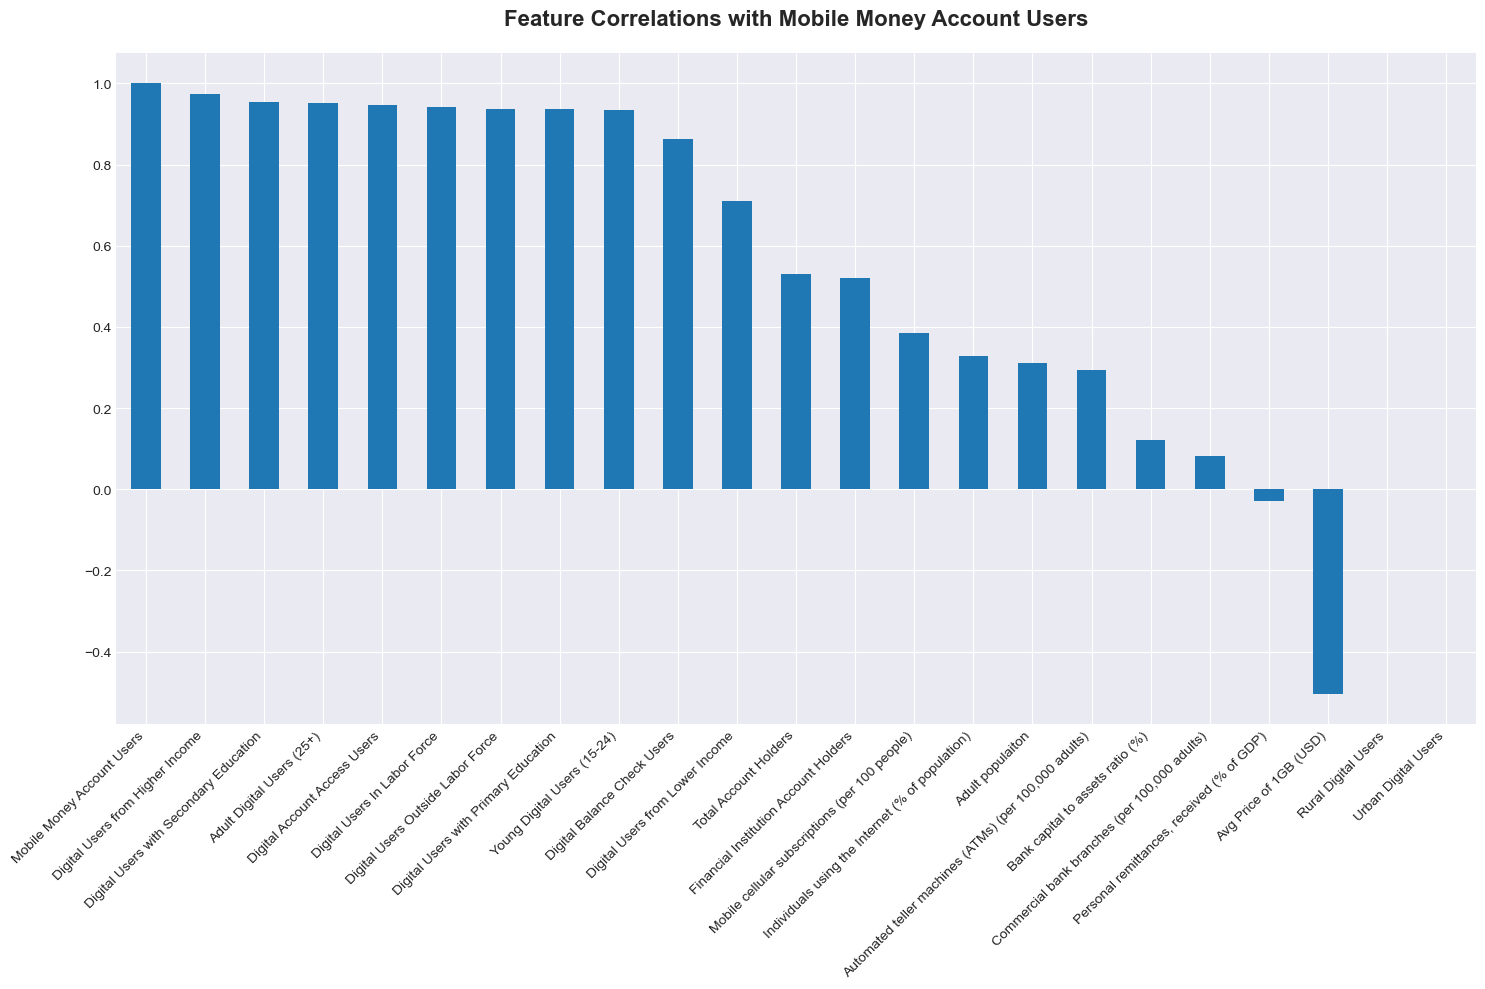

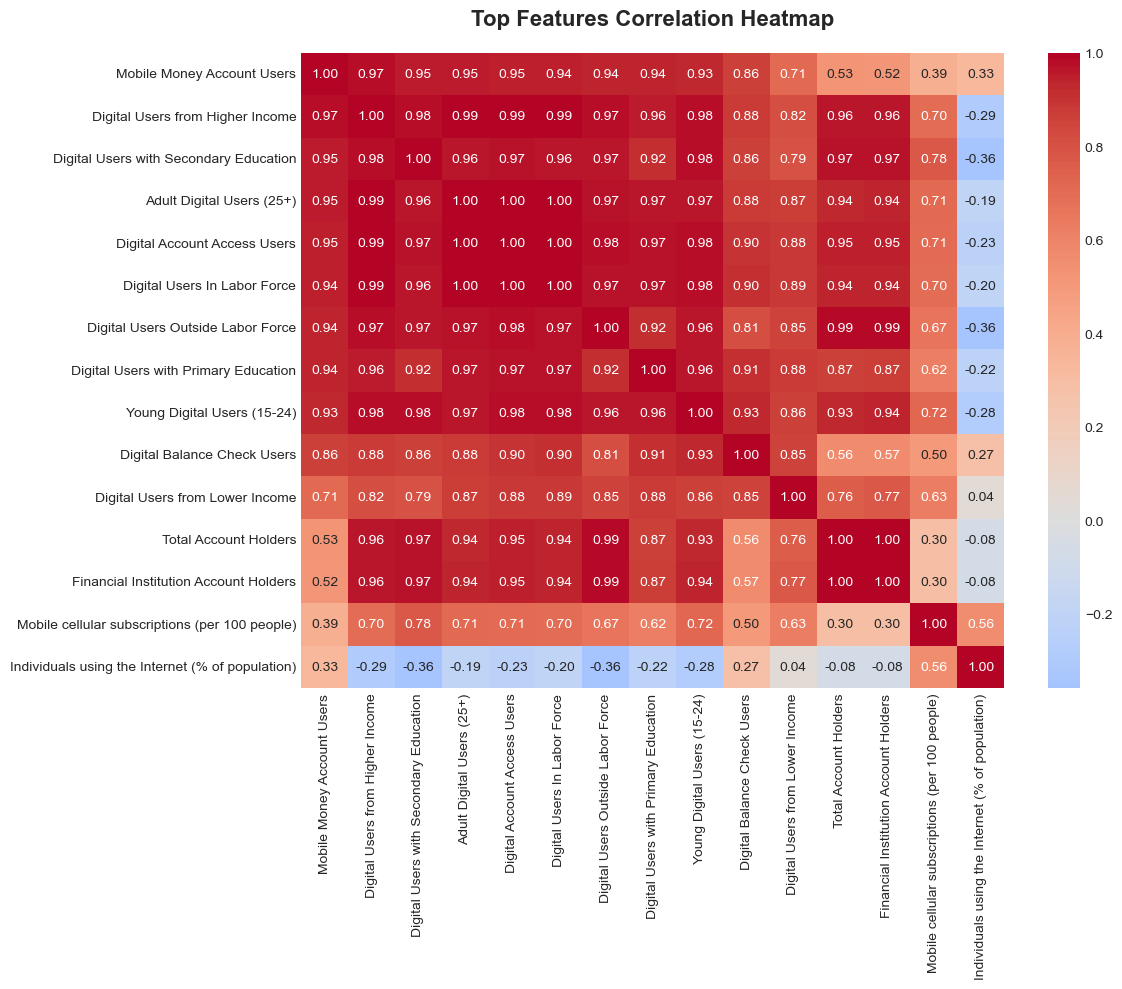

In [93]:
# Create correlation matrix with all variables
corr_matrix = mobile_banking_numbers.corr()

# Get correlations with target variable
target_correlations = corr_matrix['Mobile Money Account Users'].sort_values(ascending=False)

print("Correlations with Mobile Money Account Users:")
print(target_correlations)

# Visualize top correlations
plt.figure(figsize=(15, 10))
target_correlations.plot(kind='bar')
plt.title('Feature Correlations with Mobile Money Account Users', pad=20, fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create focused heatmap of top correlated features
top_features = target_correlations.head(15).index
plt.figure(figsize=(12, 10))
sns.heatmap(mobile_banking_numbers[top_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Top Features Correlation Heatmap', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [94]:
# Create correlation matrix
corr_matrix = mobile_banking_numbers.corr()

# Print feature pairs with correlation < 0.9
print("Feature pairs with correlation < 0.9:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) < 0.9:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            correlation = corr_matrix.iloc[i, j]
            print(f"{feature1} -- {feature2}: {correlation:.3f}")

Feature pairs with correlation < 0.9:
Total Account Holders -- Adult populaiton: 0.858
Financial Institution Account Holders -- Adult populaiton: 0.857
Mobile Money Account Users -- Adult populaiton: 0.310
Mobile Money Account Users -- Total Account Holders: 0.530
Mobile Money Account Users -- Financial Institution Account Holders: 0.519
Digital Account Access Users -- Adult populaiton: 0.848
Young Digital Users (15-24) -- Adult populaiton: 0.843
Adult Digital Users (25+) -- Adult populaiton: 0.823
Digital Users with Primary Education -- Adult populaiton: 0.754
Digital Users with Primary Education -- Total Account Holders: 0.867
Digital Users with Primary Education -- Financial Institution Account Holders: 0.869
Digital Users with Secondary Education -- Adult populaiton: 0.865
Digital Users from Lower Income -- Adult populaiton: 0.636
Digital Users from Lower Income -- Total Account Holders: 0.763
Digital Users from Lower Income -- Financial Institution Account Holders: 0.772
Digital U

In [96]:
# Get correlations with target variable
target_correlations = mobile_banking_numbers.corr()['Mobile Money Account Users']

# Select all features with correlation < 0.9 with target
selected_features = target_correlations[abs(target_correlations) < 0.9].index.tolist()

# Prepare X and y for model training
X = mobile_banking_numbers[selected_features]
y = mobile_banking_numbers['Mobile Money Account Users']

# Save to parquet files
X.to_parquet('mobile_banking_features.parquet')
y.to_frame('target').to_parquet('mobile_banking_target.parquet')

print("Number of selected features:", len(selected_features))
print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Number of selected features: 12

Feature matrix shape: (28, 12)
Target vector shape: (28,)


In [97]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load and clean data
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')['target']

# Fill NaN values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train initial model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                                              feature  importance
4                         Digital Balance Check Users    0.690778
5                              Avg Price of 1GB (USD)    0.089904
10     Mobile cellular subscriptions (per 100 people)    0.054278
9    Individuals using the Internet (% of population)    0.035230
0                                    Adult populaiton    0.033923
6   Automated teller machines (ATMs) (per 100,000 ...    0.022524
1                               Total Account Holders    0.015731
8       Commercial bank branches (per 100,000 adults)    0.015044
2               Financial Institution Account Holders    0.014798
7                    Bank capital to assets ratio (%)    0.014606
11          Personal remittances, received (% of GDP)    0.011550
3                     Digital Users from Lower Income    0.001634


In [98]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())